# Analysing Union Budget Speeches (2010-2020)   

***Capstone Project*** <br/>
***Company : Thompson Reuters*** <br/>
***Mentor: Abhirupa Lodh*** <br/>



**Objectives**: We run complete analysis of the Union Budget speeches towards the folloiwng nested objectives:
1. To identify key sentiment of the speeches and their relationship with economic situation preceding and following the budget speech.

2. To characterise speeches based on the key topics or recurring themes discussed in them.

3. To use classification models to predict sentiment of new budget speech.


**Data set Info**:<br/>
*Information:* For our project we use texts of budget speeches over the past decade and data on key economic variabes including annual growth rate figures for GDP, fiscal deficit (as % of GDP), inflation rate, IIP (over all, manufacturing & food) - for the same duration   <br/>

**NOTE**: Keeping in mind the classification exercise that we need to run later, we divide our budget speeches in two sets test and train
1. Test Set: Budget speech for 2020 will be our test set
2. Train Set: Budget speech from 2010 to 2019 form our train set. 

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import re
import os
from os import listdir
from nltk.tokenize import sent_tokenize
from datetime import datetime

import re
from nltk.tokenize import word_tokenize
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

import re, nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
path = "./Text/"

In [3]:
listFiles = os.listdir(path)

# Creating Speech DataFrame
### Train Set: Includes Budget Speeches from 2010-19. 

We will extract Name of Finance Minister, Date and speech text as separate features for our dataframe

In [4]:
datePattern = '\w+\s+\d+,\s+\d\d\d\d'
namePattern = 'Speech\s+of\s+\w*\.*\s+\w+'

enc = 'iso-8859-15'

listFiles = sorted(os.listdir(path))

speech_df = pd.DataFrame(columns=['SpeechDate', 'FinanceMinister', 'SpeechText'])


for  file in listFiles:
    
    # Open the file that you want to search 
    f = open(path + file, "r", encoding=enc)
    # Will contain the entire content of the file as a string
    content = f.read()    
    budgetDateStrs = re.findall(datePattern, content)
    speechNameTxts = re.findall(namePattern, content)
    
    if ((len(budgetDateStrs) != 0) and ( len(speechNameTxts) != 0 ) ) : 
    
        budgetDateStr = budgetDateStrs[0]
        budgetDate = datetime.strptime(budgetDateStr, '%B %d, %Y')

        speechNameTxt = speechNameTxts[0]
            
        #speechNameTxt = speechNameTxt.replace('Speech\s+of', '')
        finMin = re.sub('Speech\s+of',  '',    speechNameTxt).strip()
        finMin = re.sub('\s+',' ', finMin)

        speakerIndex = content.find('Speaker')

        commaIndex = content.find(",", speakerIndex)
        text = content[commaIndex+1:]
        
        ##Substitute multiple white space with a space
        text = re.sub('\s+', ' ', text)
        
        ##Remove hex characters which seem to be other language?
        ##Split by sentence endings
        re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
        text = re.sub(r'[^\x00-\x7f]',r' ', text).lower()

        
        print( finMin)

        speech_df = speech_df.append({'SpeechDate': budgetDate, 'FinanceMinister': finMin, 'SpeechText': text}, ignore_index=True)
        
        

Pranab Mukherjee
Pranab Mukherjee
Pranab Mukherjee
P. Chidambaram
P. Chidambaram
Arun Jaitley
Arun Jaitley
Arun Jaitley
Arun Jaitley
Arun Jaitley
Piyush Goyal
Nirmala Sitharaman


In [5]:
speech_df['SpeechText'][11]

' i rise to present the budget for the year 2019-20. part a 2. the recent election which brought us to this august house today, was charged with brimming hope and desire for a bright and stable new india. like never before, india celebrated its democracy by coming out to vote in large numbers, like never before. voter turnout was the highest at 67.9%. every section   young, old, first time voters, voters since the first general election, women   all turned up to stamp their approval of a performing government. through their unambiguous and firm mandate they have reaffirmed  putting the nation first . the people of india have validated the two goals for our country s future: that of national society and economic growth. 3. the first term of hon\'ble pm narendra modi-led-nda-government stood out as a performing government, a government whose signature was in the last mile delivery. between 2014-19, we provided a rejuvenated centre-state dynamic, cooperative federalism, gst council, and a

# Creating Speech DataFrame - 
### Test Set: Includes Budget Speech from 2020. 

We will extract Name of Finance Minister, Date and speech text as separate features for our dataframe


In [11]:
path= "./latest_budget/"
listFiles = os.listdir(path)

datePattern = '\w+\s+\d+,\s+\d\d\d\d'
namePattern = 'Speech\s+of\s+\w*\.*\s+\w+'

enc = 'iso-8859-15'

listFiles = sorted(os.listdir(path))

test_df = pd.DataFrame(columns=['SpeechDate', 'FinanceMinister', 'SpeechText'])


for  file in listFiles:
    
    # Open the file that you want to search 
    f = open(path + file, "r", encoding=enc)
    # Will contain the entire content of the file as a string
    content = f.read()    
    budgetDateStrs = re.findall(datePattern, content)
    speechNameTxts = re.findall(namePattern, content)
    
    if ((len(budgetDateStrs) != 0) and ( len(speechNameTxts) != 0 ) ) : 
    
        budgetDateStr = budgetDateStrs[0]
        budgetDate = datetime.strptime(budgetDateStr, '%B %d, %Y')

        speechNameTxt = speechNameTxts[0]
            
        #speechNameTxt = speechNameTxt.replace('Speech\s+of', '')
        finMin = re.sub('Speech\s+of',  '',    speechNameTxt).strip()
        finMin = re.sub('\s+',' ', finMin)

        speakerIndex = content.find('Speaker')

        commaIndex = content.find(",", speakerIndex)
        text = content[commaIndex+1:]
        
        ##Substitute multiple white space with a space
        text = re.sub('\s+', ' ', text)
        
        ##Remove hex characters which seem to be other language
        re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
        text = re.sub(r'[^\x00-\x7f]',r' ', text).lower()

        
        print( finMin)

        test_df = test_df.append({'SpeechDate': budgetDate, 'FinanceMinister': finMin, 'SpeechText': text}, ignore_index=True)

Nirmala Sitharaman


In [12]:
test_df['SpeechText'][0]

' i rise to present the budget for the year 2020-2021. introduction in may 2019, prime minister modi received a massive mandate to form the government again. with renewed vigour, under his leadership, we commit ourselves to serve the people of india, with all humility and dedication. 2. people of india have unequivocally given their jan-aadesh for not just political stability and also reposed faith in our economic policies. this is the budget to boost their incomes and enhance their purchasing power. only through higher growth we can achieve that and have our youth gainfully and meaningfully employed. let our businesses be innovative, healthy and solvent with use of technology. 3. for today   s youth born at the turn of the century, for every member of scheduled castes and scheduled tribes who seeks a better life, for every woman wishing to stand up and get counted, for every individual from the minority sections of our society     this budget aims to have your aspirations and hopes ad

# Text Preprocessing

## Remove Contractions

In [13]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

## Cleaning the text 
Removing extra spaces, line breaks 

In [14]:
def clean_text(text):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?://[^\s<>"]+|www\.[^\s<>"]+', " ", text)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', ' ', text) 
    text = re.sub(r'[_"\-;%|+&=*%,:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'\`', ' ', text)
    text = re.sub(r'\,\s+,', ' ', text)
    text = re.sub(r'\\s+',' ', text)
    text = re.sub(r"\'","'", text)
    text = re.sub(r'\,+',' ', text)
    text = re.sub(r'\d+.', ' ', text)
    text = re.sub(r'\-', ' ', text)
    text = re.sub(r'\s+',' ', text)
    text = re.sub(r"[\(\[].*?[\)\]]", "", text)
    
    return text

In [15]:
cleaned_speech = []
for speech in speech_df.SpeechText:
    cleaned_speech.append(clean_text(speech))
print("Training Speech data cleaning is complete.")

cleaned_test = []
for speech in test_df.SpeechText:
    cleaned_test.append(clean_text(speech))
print("test Speech data cleaning is complete.")


Training Speech data cleaning is complete.
test Speech data cleaning is complete.


In [16]:
df1 = pd.DataFrame(cleaned_speech)
df2 = pd.DataFrame(cleaned_test)

speech_df['Cleaned_speech'] = df1
test_df['Cleaned_speech'] = df2
#print(speech_df)
#print(test_df)

In [17]:
speech_df

SpeechDate     FinanceMinister  \
0  2010-02-26    Pranab Mukherjee   
1  2011-02-28    Pranab Mukherjee   
2  2012-03-16    Pranab Mukherjee   
3  2013-02-28      P. Chidambaram   
4  2014-02-17      P. Chidambaram   
5  2014-07-10        Arun Jaitley   
6  2015-02-28        Arun Jaitley   
7  2016-02-29        Arun Jaitley   
8  2017-02-01        Arun Jaitley   
9  2018-02-01        Arun Jaitley   
10 2019-02-01        Piyush Goyal   
11 2019-07-05  Nirmala Sitharaman   

                                           SpeechText  \
0    i rise to present the union budget for 2010-1...   
1    i rise to present the union budget for 2011-1...   
2    i rise to present the union budget for 2012-1...   
3    i rise to present the budget for the year 201...   
4    introduction i rise to present the interim bu...   
5    i rise to present the budget for the year 201...   
6    i rise to present the budget of the union for...   
7    i rise to present the budget for the year 201...   
8    on this auspicious day of vasant panchami, i ...   
9    1. i rise to present the budget for 2018-19. ...   
10   i rise to present the interim budget for the ...   
11   i rise to present the budget for the year 201...   

                                       Cleaned_speech  
0   i rise to present the union budget for in when...  
1   i rise to present the union budget for we are ...  
2   i rise to present the union budget for for the...  
3   i rise to present the budget for the year i re...  
4   introduction i rise to present the interim bud...  
5   i rise to present the budget for the year i. s...  
6   i rise to present the budget of the union for ...  
7   i rise to present the budget for the year i am...  
8   on this auspicious day of vasant panchami i ri...  
9    i rise to present the budget for madam four y...  
10  i rise to present the interim budget for the y...  
11  i rise to present the budget for the year part...

In [18]:
test_df

SpeechDate     FinanceMinister  \
0 2020-02-01  Nirmala Sitharaman   

                                          SpeechText  \
0   i rise to present the budget for the year 202...   

                                      Cleaned_speech  
0  i rise to present the budget for the year intr...

In [19]:
speech_df.Cleaned_speech = speech_df.Cleaned_speech.str.replace('\s+', ' ')
speech_df.Cleaned_speech = speech_df.Cleaned_speech.str.replace("(", " ").replace(")"," ")

test_df.Cleaned_speech = test_df.Cleaned_speech.str.replace('\s+', ' ')
test_df.Cleaned_speech = test_df.Cleaned_speech.str.replace("(", " ").replace(")"," ")


In [20]:
speech_df['Cleaned_speech'][11]

'i rise to present the budget for the year part a the recent election which brought us to this august house today was charged with brimming hope and desire for a bright and stable new india. like never before india celebrated its democracy by coming out to vote in large numbers like never before. voter turnout was the highest at . every section young old first time voters voters since the first general election women all turned up to stamp their approval of a performing government. through their unambiguous and firm mandate they have reaffirmed putting the nation first . the people of india have validated the two goals for our country s future that of national society and economic growth. the first term of hon ble pm narendra modi led nda government stood out as a performing government a government whose signature was in the last mile delivery. between we provided a rejuvenated centre state dynamic cooperative federalism gst council and a strident commitment to fiscal discipline. we ha

In [21]:
test_df['Cleaned_speech'][0]

'i rise to present the budget for the year introduction in may prime minister modi received a massive mandate to form the government again. with renewed vigour under his leadership we commit ourselves to serve the people of india with all humility and dedication. people of india have unequivocally given their jan aadesh for not just political stability and also reposed faith in our economic policies. this is the budget to boost their incomes and enhance their purchasing power. only through higher growth we can achieve that and have our youth gainfully and meaningfully employed. let our businesses be innovative healthy and solvent with use of technology. for today s youth born at the turn of the century for every member of scheduled castes and scheduled tribes who seeks a better life for every woman wishing to stand up and get counted for every individual from the minority sections of our society this budget aims to have your aspirations and hopes addressed. we wish to open up vistas fo

## Removing Unnecessary long words

In [22]:
long_word = re.compile(r'\W*\b\w{20,200}\b')
speech_df.Cleaned_speech[11] = long_word.sub(' ',speech_df.Cleaned_speech[11])

test_df.Cleaned_speech[0] = long_word.sub(' ',test_df.Cleaned_speech[0])
#print(shortword.sub('', text))

C:\Users\syerramilli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\syerramilli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
speech_df.Cleaned_speech = speech_df.Cleaned_speech.str.replace('[.]+', '.')
test_df.Cleaned_speech = test_df.Cleaned_speech.str.replace('[.]+', '.')

## Removing words having length less than 3

In [24]:
speech_df['Cleaned_speech'] = speech_df['Cleaned_speech'].apply(lambda i: ' '.join(filter(lambda j: len(j) > 3, i.split())))
test_df['Cleaned_speech'] = test_df['Cleaned_speech'].apply(lambda i: ' '.join(filter(lambda j: len(j) > 3, i.split())))

In [25]:
speech_df['Cleaned_speech'][11]

'rise present budget year part recent election which brought this august house today charged with brimming hope desire bright stable india. like never before india celebrated democracy coming vote large numbers like never before. voter turnout highest every section young first time voters voters since first general election women turned stamp their approval performing government. through their unambiguous firm mandate they have reaffirmed putting nation first people india have validated goals country future that national society economic growth. first term narendra modi government stood performing government government whose signature last mile delivery. between provided rejuvenated centre state dynamic cooperative federalism council strident commitment fiscal discipline. ball rolling india planned assisted niti aayog broad based think tank. have showed deeds that principle reform perform transform succeed. many programmes initiatives worked unprecedented scale. average amount spent fo

In [26]:
test_df['Cleaned_speech'][0]

'rise present budget year introduction prime minister modi received massive mandate form government again. with renewed vigour under leadership commit ourselves serve people india with humility dedication. people india have unequivocally given their aadesh just political stability also reposed faith economic policies. this budget boost their incomes enhance their purchasing power. only through higher growth achieve that have youth gainfully meaningfully employed. businesses innovative healthy solvent with technology. today youth born turn century every member scheduled castes scheduled tribes seeks better life every woman wishing stand counted every individual from minority sections society this budget aims have your aspirations hopes addressed. wish open vistas vibrant dynamic economy with gentle breeze technology. this vibrant india shall caring society which shall attend weak vulnerable among citizens. during government brought paradigm shift governance. this shift characterised twi

In [27]:
speech_df

SpeechDate     FinanceMinister  \
0  2010-02-26    Pranab Mukherjee   
1  2011-02-28    Pranab Mukherjee   
2  2012-03-16    Pranab Mukherjee   
3  2013-02-28      P. Chidambaram   
4  2014-02-17      P. Chidambaram   
5  2014-07-10        Arun Jaitley   
6  2015-02-28        Arun Jaitley   
7  2016-02-29        Arun Jaitley   
8  2017-02-01        Arun Jaitley   
9  2018-02-01        Arun Jaitley   
10 2019-02-01        Piyush Goyal   
11 2019-07-05  Nirmala Sitharaman   

                                           SpeechText  \
0    i rise to present the union budget for 2010-1...   
1    i rise to present the union budget for 2011-1...   
2    i rise to present the union budget for 2012-1...   
3    i rise to present the budget for the year 201...   
4    introduction i rise to present the interim bu...   
5    i rise to present the budget for the year 201...   
6    i rise to present the budget of the union for...   
7    i rise to present the budget for the year 201...   
8    on this auspicious day of vasant panchami, i ...   
9    1. i rise to present the budget for 2018-19. ...   
10   i rise to present the interim budget for the ...   
11   i rise to present the budget for the year 201...   

                                       Cleaned_speech  
0   rise present union budget when presented inter...  
1   rise present union budget reaching remarkable ...  
2   rise present union budget indian economy this ...  
3   rise present budget year recall last tenure fi...  
4   introduction rise present interim budget curre...  
5   rise present budget year state economy people ...  
6   rise present budget union year present this bu...  
7   rise present budget year presenting this budge...  
8   this auspicious vasant panchami rise present b...  
9   rise present budget madam four years pledged p...  
10  rise present interim budget year part deeply c...  
11  rise present budget year part recent election ...

In [28]:
test_df

SpeechDate     FinanceMinister  \
0 2020-02-01  Nirmala Sitharaman   

                                          SpeechText  \
0   i rise to present the budget for the year 202...   

                                      Cleaned_speech  
0  rise present budget year introduction prime mi...

# Creating Sentence DataFrame for Training and Test Speech Data

In [29]:
Sentence_df = pd.DataFrame(columns=['SpeechDate', 'FinanceMinister','Sentences'])
for i in range(len(speech_df)) :
    sentences = re.split("[.!?]", speech_df.Cleaned_speech[i])
    SpeechDate = speech_df.SpeechDate[i]
    FinanceMinister = speech_df.FinanceMinister[i]
    #SpeechText = speech_df.SpeechText[i]
    for  sntc in sentences :
        if len(sntc) > 3 :
            Sentence_df = Sentence_df.append({'SpeechDate': SpeechDate, 'FinanceMinister': FinanceMinister, 
                                                       'Sentences': sntc}, ignore_index=True)
            
            

test_sent_df = pd.DataFrame(columns=['SpeechDate', 'FinanceMinister','Sentences'])
for i in range(len(test_df)) :
    sentences = re.split("[.!?]", test_df.Cleaned_speech[i])
    SpeechDate = test_df.SpeechDate[i]
    FinanceMinister = test_df.FinanceMinister[i]
    #SpeechText = speech_df.SpeechText[i]
    for  sntc in sentences :
        if len(sntc) > 3 :
            test_sent_df = test_sent_df.append({'SpeechDate': SpeechDate, 'FinanceMinister': FinanceMinister, 
                                                       'Sentences': sntc}, ignore_index=True)

In [30]:
Sentence_df

SpeechDate     FinanceMinister  \
0    2010-02-26    Pranab Mukherjee   
1    2010-02-26    Pranab Mukherjee   
2    2010-02-26    Pranab Mukherjee   
3    2010-02-26    Pranab Mukherjee   
4    2010-02-26    Pranab Mukherjee   
...         ...                 ...   
6803 2019-07-05  Nirmala Sitharaman   
6804 2019-07-05  Nirmala Sitharaman   
6805 2019-07-05  Nirmala Sitharaman   
6806 2019-07-05  Nirmala Sitharaman   
6807 2019-07-05  Nirmala Sitharaman   

                                              Sentences  
0     rise present union budget when presented inter...  
1      growth started decelerating business sentimen...  
2      economy capacity sustain high growth under se...  
3      clear also policy makers many other countries...  
4      what would impact growth momentum indian economy  
...                                                 ...  
6803   services fumigation warehouse agricultural pr...  
6804          services warehousing minor forest produce  
6805   services provided resident welfare associatio...  
6806   services home central government state govern...  
6807   rehabilitation therapy counselling services r...  

[6808 rows x 3 columns]

In [31]:
test_sent_df

SpeechDate     FinanceMinister  \
0   2020-02-01  Nirmala Sitharaman   
1   2020-02-01  Nirmala Sitharaman   
2   2020-02-01  Nirmala Sitharaman   
3   2020-02-01  Nirmala Sitharaman   
4   2020-02-01  Nirmala Sitharaman   
..         ...                 ...   
590 2020-02-01  Nirmala Sitharaman   
591 2020-02-01  Nirmala Sitharaman   
592 2020-02-01  Nirmala Sitharaman   
593 2020-02-01  Nirmala Sitharaman   
594 2020-02-01  Nirmala Sitharaman   

                                             Sentences  
0    rise present budget year introduction prime mi...  
1     with renewed vigour under leadership commit o...  
2     people india have unequivocally given their a...  
3     this budget boost their incomes enhance their...  
4     only through higher growth achieve that have ...  
..                                                 ...  
590   retrospective amendments give effect recommen...  
591   concessional rate integrated central union te...  
592   refund accumulated credit compensation cess t...  
593   accordingly refund account inverted duty stru...  
594   further details budget proposals explanatory ...  

[595 rows x 3 columns]

# Remove Punctuations

In [32]:
speech_df['Complete_speech'] = speech_df.Cleaned_speech.str.replace('[.!?]', '')
test_df['Complete_speech'] = test_df.Cleaned_speech.str.replace('[.!?]', '')

In [33]:
speech_df['Complete_speech'][0]

'rise present union budget when presented interim budget february regular budget july this august house indian economy facing grave uncertainties growth started decelerating business sentiment weak economy capacity sustain high growth under serious threat from widespread economic slowdown developed world clear also policy makers many other countries this crisis would eventually unfold what would impact growth momentum indian economy soon will able turnaround fortunes economy short term global outlook bleak consensus that year would face brunt this crisis across world home there added uncertainty account delayed normal south west monsoon which undermined kharif crop country there were concerns about production prices food items possible repercussions growth rural demand today stand before with confidence that have weathered these crises well indian economy better position than year ago that that challenges today less than what they were nine months when under leadership sonia gandhi ele

In [34]:
test_df['Complete_speech'][0]

'rise present budget year introduction prime minister modi received massive mandate form government again with renewed vigour under leadership commit ourselves serve people india with humility dedication people india have unequivocally given their aadesh just political stability also reposed faith economic policies this budget boost their incomes enhance their purchasing power only through higher growth achieve that have youth gainfully meaningfully employed businesses innovative healthy solvent with technology today youth born turn century every member scheduled castes scheduled tribes seeks better life every woman wishing stand counted every individual from minority sections society this budget aims have your aspirations hopes addressed wish open vistas vibrant dynamic economy with gentle breeze technology this vibrant india shall caring society which shall attend weak vulnerable among citizens during government brought paradigm shift governance this shift characterised twin focus fu

In [35]:
Sentence_df['Sentences'][3]

' clear also policy makers many other countries this crisis would eventually unfold'

In [36]:
test_sent_df['Sentences'][3]

' this budget boost their incomes enhance their purchasing power'

In [37]:
Sentence_df['Sentences'] = Sentence_df['Sentences'].str.strip()
test_sent_df['Sentences'] = test_sent_df['Sentences'].str.strip()

In [38]:
Sentence_df['Sentences'][3]

'clear also policy makers many other countries this crisis would eventually unfold'

In [39]:
test_sent_df['Sentences'][3]

'this budget boost their incomes enhance their purchasing power'

# # Punctuation checking

In [40]:
import nltk 
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\syerramilli\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [41]:
speech_df['Complete_speech'] =speech_df.Complete_speech.apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))
Sentence_df['Cleaned_sent'] = Sentence_df.Sentences.apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))


test_df['Complete_speech'] =test_df.Complete_speech.apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))
test_sent_df['Cleaned_sent'] = test_sent_df.Sentences.apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))

In [42]:
speech_df['Complete_speech'][11]

'rise present budget year part recent election which brought this august house today with brimming hope desire bright stable like never before celebrated democracy coming vote large like never before voter turnout highest every section young first time since first general election turned stamp their approval government through their unambiguous firm mandate they have nation first people have country future that national society economic growth first term government stood government government whose signature last mile delivery between provided state dynamic federalism council strident commitment fiscal discipline ball rolling broad based think tank have that principle reform perform transform succeed many worked unprecedented scale average amount spent food security year approximately doubled during preceding five number more than against number last mile delivery stood unknown citizen every nook corner country felt difference objective which during those will further accelerated shall

In [43]:
Sentence_df['Cleaned_sent'][100]

'another major initiative been complete liberalization payment technology transfer brand name royalty'

In [44]:
test_df['Complete_speech'][0]

'rise present budget year introduction prime minister received massive mandate form government again with under leadership commit ourselves serve people with humility dedication people have unequivocally given their just political stability also reposed faith economic this budget boost their enhance their power only through higher growth achieve that have youth gainfully meaningfully employed innovative healthy solvent with technology today youth born turn century every member better life every woman wishing stand every individual from minority society this budget have your wish open vibrant dynamic economy with gentle breeze technology this vibrant shall society which shall attend weak vulnerable among during government brought paradigm shift governance this shift twin focus fundamental structural reform inclusive growth economy strong that stability inflation been well thorough cleaning past decade then they were were provided exit through several economy were taken structural goods 

In [45]:
test_sent_df['Cleaned_sent'][100]

'felt that education system needs greater inflow finance attract talented innovate build better'

# Tokenization

In [46]:
speech_df['tokenized'] = speech_df['Complete_speech'].apply(nltk.word_tokenize)
Sentence_df['tokenized'] = Sentence_df['Cleaned_sent'].apply(nltk.word_tokenize)


test_df['tokenized'] = test_df['Complete_speech'].apply(nltk.word_tokenize)
test_sent_df['tokenized'] = test_sent_df['Cleaned_sent'].apply(nltk.word_tokenize)

In [47]:
Sentence_df

SpeechDate     FinanceMinister  \
0    2010-02-26    Pranab Mukherjee   
1    2010-02-26    Pranab Mukherjee   
2    2010-02-26    Pranab Mukherjee   
3    2010-02-26    Pranab Mukherjee   
4    2010-02-26    Pranab Mukherjee   
...         ...                 ...   
6803 2019-07-05  Nirmala Sitharaman   
6804 2019-07-05  Nirmala Sitharaman   
6805 2019-07-05  Nirmala Sitharaman   
6806 2019-07-05  Nirmala Sitharaman   
6807 2019-07-05  Nirmala Sitharaman   

                                              Sentences  \
0     rise present union budget when presented inter...   
1     growth started decelerating business sentiment...   
2     economy capacity sustain high growth under ser...   
3     clear also policy makers many other countries ...   
4      what would impact growth momentum indian economy   
...                                                 ...   
6803  services fumigation warehouse agricultural pro...   
6804          services warehousing minor forest produce   
6805  services provided resident welfare association...   
6806  services home central government state governm...   
6807  rehabilitation therapy counselling services re...   

                                           Cleaned_sent  \
0     rise present union budget when interim budget ...   
1                        growth business sentiment weak   
2     economy capacity sustain high growth under ser...   
3     clear also policy many other this crisis would...   
4             what would impact growth momentum economy   
...                                                 ...   
6803          fumigation warehouse agricultural produce   
6804                               minor forest produce   
6805  provided resident welfare where contribution a...   
6806  home central government state government entit...   
6807  rehabilitation therapy rehabilitation under re...   

                                              tokenized  
0     [rise, present, union, budget, when, interim, ...  
1                   [growth, business, sentiment, weak]  
2     [economy, capacity, sustain, high, growth, und...  
3     [clear, also, policy, many, other, this, crisi...  
4      [what, would, impact, growth, momentum, economy]  
...                                                 ...  
6803     [fumigation, warehouse, agricultural, produce]  
6804                           [minor, forest, produce]  
6805  [provided, resident, welfare, where, contribut...  
6806  [home, central, government, state, government,...  
6807  [rehabilitation, therapy, rehabilitation, unde...  

[6808 rows x 5 columns]

In [48]:
test_sent_df

SpeechDate     FinanceMinister  \
0   2020-02-01  Nirmala Sitharaman   
1   2020-02-01  Nirmala Sitharaman   
2   2020-02-01  Nirmala Sitharaman   
3   2020-02-01  Nirmala Sitharaman   
4   2020-02-01  Nirmala Sitharaman   
..         ...                 ...   
590 2020-02-01  Nirmala Sitharaman   
591 2020-02-01  Nirmala Sitharaman   
592 2020-02-01  Nirmala Sitharaman   
593 2020-02-01  Nirmala Sitharaman   
594 2020-02-01  Nirmala Sitharaman   

                                             Sentences  \
0    rise present budget year introduction prime mi...   
1    with renewed vigour under leadership commit ou...   
2    people india have unequivocally given their aa...   
3    this budget boost their incomes enhance their ...   
4    only through higher growth achieve that have y...   
..                                                 ...   
590  retrospective amendments give effect recommend...   
591  concessional rate integrated central union ter...   
592  refund accumulated credit compensation cess to...   
593  accordingly refund account inverted duty struc...   
594  further details budget proposals explanatory m...   

                                          Cleaned_sent  \
0    rise present budget year introduction prime mi...   
1    with under leadership commit ourselves serve p...   
2    people have unequivocally given their just pol...   
3          this budget boost their enhance their power   
4    only through higher growth achieve that have y...   
..                                                 ...   
590  retrospective give effect council retrospectiv...   
591  concessional rate central union territory duri...   
592  refund credit compensation cess tobacco invert...   
593  accordingly refund account inverted duty struc...   
594  further budget explanatory memorandum other re...   

                                             tokenized  
0    [rise, present, budget, year, introduction, pr...  
1    [with, under, leadership, commit, ourselves, s...  
2    [people, have, unequivocally, given, their, ju...  
3    [this, budget, boost, their, enhance, their, p...  
4    [only, through, higher, growth, achieve, that,...  
..                                                 ...  
590  [retrospective, give, effect, council, retrosp...  
591  [concessional, rate, central, union, territory...  
592  [refund, credit, compensation, cess, tobacco, ...  
593  [accordingly, refund, account, inverted, duty,...  
594  [further, budget, explanatory, memorandum, oth...  

[595 rows x 5 columns]

# Remove Stop Words

In [50]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(len(stop_words))
print(stop_words)

179
{'their', 'whom', 'does', 'over', 'o', 'yours', 'while', 'here', "should've", 'her', 'once', 'few', 'each', 'i', 'we', "you're", 'he', 'there', "won't", 'were', "wasn't", 'that', 'couldn', 'you', 'between', 've', 'which', 'don', 'hasn', "shouldn't", 'further', 'if', 'again', 't', 'a', 'they', "don't", 'own', 'some', 'himself', 'should', 're', 'about', 'mustn', 'how', 'yourselves', 'wasn', 'be', 'was', 'after', 'mightn', 'can', 'these', 'haven', "didn't", 'with', 'no', 'why', 'more', "mightn't", 'below', 'itself', 'had', 'for', 's', 'herself', 'both', 'needn', "you'd", 'ain', "wouldn't", "haven't", 'weren', 'his', "it's", 'didn', 'up', 'are', "mustn't", 'where', 'do', 'in', 'what', 'd', 'have', 'at', 'having', 'or', 'too', 'the', 'them', 'now', 'll', 'themselves', 'other', 'from', 'has', 'down', 'been', 'by', "couldn't", 'off', "you'll", 'wouldn', 'but', 'to', 'aren', 'theirs', 'shouldn', 'y', 'our', "aren't", 'is', 'same', 'very', "you've", 'an', 'because', 'isn', 'hadn', 'under', 

In [51]:
speech_df['speech_without_stopwords'] =speech_df['tokenized'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
Sentence_df['sent_without_stopwords'] =Sentence_df['tokenized'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))


test_df['speech_without_stopwords'] =test_df['tokenized'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
test_sent_df['sent_without_stopwords'] =test_sent_df['tokenized'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))

In [52]:
speech_df

SpeechDate     FinanceMinister  \
0  2010-02-26    Pranab Mukherjee   
1  2011-02-28    Pranab Mukherjee   
2  2012-03-16    Pranab Mukherjee   
3  2013-02-28      P. Chidambaram   
4  2014-02-17      P. Chidambaram   
5  2014-07-10        Arun Jaitley   
6  2015-02-28        Arun Jaitley   
7  2016-02-29        Arun Jaitley   
8  2017-02-01        Arun Jaitley   
9  2018-02-01        Arun Jaitley   
10 2019-02-01        Piyush Goyal   
11 2019-07-05  Nirmala Sitharaman   

                                           SpeechText  \
0    i rise to present the union budget for 2010-1...   
1    i rise to present the union budget for 2011-1...   
2    i rise to present the union budget for 2012-1...   
3    i rise to present the budget for the year 201...   
4    introduction i rise to present the interim bu...   
5    i rise to present the budget for the year 201...   
6    i rise to present the budget of the union for...   
7    i rise to present the budget for the year 201...   
8    on this auspicious day of vasant panchami, i ...   
9    1. i rise to present the budget for 2018-19. ...   
10   i rise to present the interim budget for the ...   
11   i rise to present the budget for the year 201...   

                                       Cleaned_speech  \
0   rise present union budget when presented inter...   
1   rise present union budget reaching remarkable ...   
2   rise present union budget indian economy this ...   
3   rise present budget year recall last tenure fi...   
4   introduction rise present interim budget curre...   
5   rise present budget year state economy people ...   
6   rise present budget union year present this bu...   
7   rise present budget year presenting this budge...   
8   this auspicious vasant panchami rise present b...   
9   rise present budget madam four years pledged p...   
10  rise present interim budget year part deeply c...   
11  rise present budget year part recent election ...   

                                      Complete_speech  \
0   rise present union budget when interim budget ...   
1   rise present union budget reaching remarkable ...   
2   rise present union budget economy this year re...   
3   rise present budget year recall last tenure fi...   
4   introduction rise present interim budget curre...   
5   rise present budget year state economy people ...   
6   rise present budget union year present this bu...   
7   rise present budget year this budget when glob...   
8   this auspicious rise present budget spring sea...   
9   rise present budget madam four people give thi...   
10  rise present interim budget year part deeply c...   
11  rise present budget year part recent election ...   

                                            tokenized  \
0   [rise, present, union, budget, when, interim, ...   
1   [rise, present, union, budget, reaching, remar...   
2   [rise, present, union, budget, economy, this, ...   
3   [rise, present, budget, year, recall, last, te...   
4   [introduction, rise, present, interim, budget,...   
5   [rise, present, budget, year, state, economy, ...   
6   [rise, present, budget, union, year, present, ...   
7   [rise, present, budget, year, this, budget, wh...   
8   [this, auspicious, rise, present, budget, spri...   
9   [rise, present, budget, madam, four, people, g...   
10  [rise, present, interim, budget, year, part, d...   
11  [rise, present, budget, year, part, recent, el...   

                             speech_without_stopwords  
0   rise present union budget interim budget regul...  
1   rise present union budget reaching remarkable ...  
2   rise present union budget economy year recover...  
3   rise present budget year recall last tenure fi...  
4   introduction rise present interim budget curre...  
5   rise present budget year state economy people ...  
6   rise present budget union year present budget ...  
7   rise present budget year budget global economy...  
8   auspicious rise present budget spring season 

In [53]:
Sentence_df

SpeechDate     FinanceMinister  \
0    2010-02-26    Pranab Mukherjee   
1    2010-02-26    Pranab Mukherjee   
2    2010-02-26    Pranab Mukherjee   
3    2010-02-26    Pranab Mukherjee   
4    2010-02-26    Pranab Mukherjee   
...         ...                 ...   
6803 2019-07-05  Nirmala Sitharaman   
6804 2019-07-05  Nirmala Sitharaman   
6805 2019-07-05  Nirmala Sitharaman   
6806 2019-07-05  Nirmala Sitharaman   
6807 2019-07-05  Nirmala Sitharaman   

                                              Sentences  \
0     rise present union budget when presented inter...   
1     growth started decelerating business sentiment...   
2     economy capacity sustain high growth under ser...   
3     clear also policy makers many other countries ...   
4      what would impact growth momentum indian economy   
...                                                 ...   
6803  services fumigation warehouse agricultural pro...   
6804          services warehousing minor forest produce   
6805  services provided resident welfare association...   
6806  services home central government state governm...   
6807  rehabilitation therapy counselling services re...   

                                           Cleaned_sent  \
0     rise present union budget when interim budget ...   
1                        growth business sentiment weak   
2     economy capacity sustain high growth under ser...   
3     clear also policy many other this crisis would...   
4             what would impact growth momentum economy   
...                                                 ...   
6803          fumigation warehouse agricultural produce   
6804                               minor forest produce   
6805  provided resident welfare where contribution a...   
6806  home central government state government entit...   
6807  rehabilitation therapy rehabilitation under re...   

                                              tokenized  \
0     [rise, present, union, budget, when, interim, ...   
1                   [growth, business, sentiment, weak]   
2     [economy, capacity, sustain, high, growth, und...   
3     [clear, also, policy, many, other, this, crisi...   
4      [what, would, impact, growth, momentum, economy]   
...                                                 ...   
6803     [fumigation, warehouse, agricultural, produce]   
6804                           [minor, forest, produce]   
6805  [provided, resident, welfare, where, contribut...   
6806  [home, central, government, state, government,...   
6807  [rehabilitation, therapy, rehabilitation, unde...   

                                 sent_without_stopwords  
0     rise present union budget interim budget regul...  
1                        growth business sentiment weak  
2     economy capacity sustain high growth serious t...  
3     clear also policy many crisis would eventually...  
4                  would impact growth momentum economy  
...                                                 ...  
6803          fumigation warehouse agricultural produce  
6804                               minor forest produce  
6805  provided resident welfare contribution amount ...  
6806  home central government state government entit...  
6807  rehabilitation therapy rehabilitation rehabili...  

[6808 rows x 6 columns]

In [54]:
test_df

SpeechDate     FinanceMinister  \
0 2020-02-01  Nirmala Sitharaman   

                                          SpeechText  \
0   i rise to present the budget for the year 202...   

                                      Cleaned_speech  \
0  rise present budget year introduction prime mi...   

                                     Complete_speech  \
0  rise present budget year introduction prime mi...   

                                           tokenized  \
0  [rise, present, budget, year, introduction, pr...   

                            speech_without_stopwords  
0  rise present budget year introduction prime mi...

In [55]:
test_sent_df

SpeechDate     FinanceMinister  \
0   2020-02-01  Nirmala Sitharaman   
1   2020-02-01  Nirmala Sitharaman   
2   2020-02-01  Nirmala Sitharaman   
3   2020-02-01  Nirmala Sitharaman   
4   2020-02-01  Nirmala Sitharaman   
..         ...                 ...   
590 2020-02-01  Nirmala Sitharaman   
591 2020-02-01  Nirmala Sitharaman   
592 2020-02-01  Nirmala Sitharaman   
593 2020-02-01  Nirmala Sitharaman   
594 2020-02-01  Nirmala Sitharaman   

                                             Sentences  \
0    rise present budget year introduction prime mi...   
1    with renewed vigour under leadership commit ou...   
2    people india have unequivocally given their aa...   
3    this budget boost their incomes enhance their ...   
4    only through higher growth achieve that have y...   
..                                                 ...   
590  retrospective amendments give effect recommend...   
591  concessional rate integrated central union ter...   
592  refund accumulated credit compensation cess to...   
593  accordingly refund account inverted duty struc...   
594  further details budget proposals explanatory m...   

                                          Cleaned_sent  \
0    rise present budget year introduction prime mi...   
1    with under leadership commit ourselves serve p...   
2    people have unequivocally given their just pol...   
3          this budget boost their enhance their power   
4    only through higher growth achieve that have y...   
..                                                 ...   
590  retrospective give effect council retrospectiv...   
591  concessional rate central union territory duri...   
592  refund credit compensation cess tobacco invert...   
593  accordingly refund account inverted duty struc...   
594  further budget explanatory memorandum other re...   

                                             tokenized  \
0    [rise, present, budget, year, introduction, pr...   
1    [with, under, leadership, commit, ourselves, s...   
2    [people, have, unequivocally, given, their, ju...   
3    [this, budget, boost, their, enhance, their, p...   
4    [only, through, higher, growth, achieve, that,...   
..                                                 ...   
590  [retrospective, give, effect, council, retrosp...   
591  [concessional, rate, central, union, territory...   
592  [refund, credit, compensation, cess, tobacco, ...   
593  [accordingly, refund, account, inverted, duty,...   
594  [further, budget, explanatory, memorandum, oth...   

                                sent_without_stopwords  
0    rise present budget year introduction prime mi...  
1    leadership commit serve people humility dedica...  
2    people unequivocally given political stability...  
3                           budget boost enhance power  
4    higher growth achieve youth gainfully meaningf...  
..                                                 ...  
590  retrospective give effect council retrospectiv...  
591  concessional rate central union territory peri...  
592  refund credit compensation cess tobacco invert...  
593  accordingly refund account inverted duty struc...  
594      budget explanatory memorandum relevant budget  

[595 rows x 6 columns]

# Lemmatization

In [56]:
import nltk
from nltk.corpus import wordnet
from collections import Counter

def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
  
    pos_counts = Counter()

    pos_counts["n"] = len([ item for item in probable_part_of_speech if item.pos()=="n"])
    pos_counts["v"] = len([ item for item in probable_part_of_speech if item.pos()=="v"])
    pos_counts["a"] = len([ item for item in probable_part_of_speech if item.pos()=="a"])
    pos_counts["r"] = len([ item for item in probable_part_of_speech if item.pos()=="r"])
  
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

In [57]:
lemmatizer = WordNetLemmatizer()

In [58]:
speech_df['lemmatized'] = speech_df['speech_without_stopwords'].apply(lambda x : " ".join(lemmatizer.lemmatize(token,get_part_of_speech(token)) for token in x.split(" ") ))
Sentence_df['lemmatized'] = Sentence_df['sent_without_stopwords'].apply(lambda x : " ".join(lemmatizer.lemmatize(token,get_part_of_speech(token)) for token in x.split(" ") ))


test_df['lemmatized'] = test_df['speech_without_stopwords'].apply(lambda x : " ".join(lemmatizer.lemmatize(token,get_part_of_speech(token)) for token in x.split(" ") ))
test_sent_df['lemmatized'] = test_sent_df['sent_without_stopwords'].apply(lambda x : " ".join(lemmatizer.lemmatize(token,get_part_of_speech(token)) for token in x.split(" ") ))

In [59]:
Sentence_df

SpeechDate     FinanceMinister  \
0    2010-02-26    Pranab Mukherjee   
1    2010-02-26    Pranab Mukherjee   
2    2010-02-26    Pranab Mukherjee   
3    2010-02-26    Pranab Mukherjee   
4    2010-02-26    Pranab Mukherjee   
...         ...                 ...   
6803 2019-07-05  Nirmala Sitharaman   
6804 2019-07-05  Nirmala Sitharaman   
6805 2019-07-05  Nirmala Sitharaman   
6806 2019-07-05  Nirmala Sitharaman   
6807 2019-07-05  Nirmala Sitharaman   

                                              Sentences  \
0     rise present union budget when presented inter...   
1     growth started decelerating business sentiment...   
2     economy capacity sustain high growth under ser...   
3     clear also policy makers many other countries ...   
4      what would impact growth momentum indian economy   
...                                                 ...   
6803  services fumigation warehouse agricultural pro...   
6804          services warehousing minor forest produce   
6805  services provided resident welfare association...   
6806  services home central government state governm...   
6807  rehabilitation therapy counselling services re...   

                                           Cleaned_sent  \
0     rise present union budget when interim budget ...   
1                        growth business sentiment weak   
2     economy capacity sustain high growth under ser...   
3     clear also policy many other this crisis would...   
4             what would impact growth momentum economy   
...                                                 ...   
6803          fumigation warehouse agricultural produce   
6804                               minor forest produce   
6805  provided resident welfare where contribution a...   
6806  home central government state government entit...   
6807  rehabilitation therapy rehabilitation under re...   

                                              tokenized  \
0     [rise, present, union, budget, when, interim, ...   
1                   [growth, business, sentiment, weak]   
2     [economy, capacity, sustain, high, growth, und...   
3     [clear, also, policy, many, other, this, crisi...   
4      [what, would, impact, growth, momentum, economy]   
...                                                 ...   
6803     [fumigation, warehouse, agricultural, produce]   
6804                           [minor, forest, produce]   
6805  [provided, resident, welfare, where, contribut...   
6806  [home, central, government, state, government,...   
6807  [rehabilitation, therapy, rehabilitation, unde...   

                                 sent_without_stopwords  \
0     rise present union budget interim budget regul...   
1                        growth business sentiment weak   
2     economy capacity sustain high growth serious t...   
3     clear also policy many crisis would eventually...   
4                  would impact growth momentum economy   
...                                                 ...   
6803          fumigation warehouse agricultural produce   
6804                               minor forest produce   
6805  provided resident welfare contribution amount ...   
6806  home central government state government entit...   
6807  rehabilitation therapy rehabilitation rehabili...   

                                             lemmatized  
0     rise present union budget interim budget regul...  
1                        growth business sentiment weak  
2     economy capacity sustain high growth serious t...  
3     clear also policy many crisis would eventually...  
4                  would impact growth momentum economy  
...                                                 ...  
6803          fumigation warehouse agricultural produce  
6804                               minor forest produce  
6805  provide resident welfare contribution amount m...  
6806  home central government state government entit...  
6807  rehabilitation therapy rehabilitation rehabili...  

[68

In [60]:
test_sent_df

SpeechDate     FinanceMinister  \
0   2020-02-01  Nirmala Sitharaman   
1   2020-02-01  Nirmala Sitharaman   
2   2020-02-01  Nirmala Sitharaman   
3   2020-02-01  Nirmala Sitharaman   
4   2020-02-01  Nirmala Sitharaman   
..         ...                 ...   
590 2020-02-01  Nirmala Sitharaman   
591 2020-02-01  Nirmala Sitharaman   
592 2020-02-01  Nirmala Sitharaman   
593 2020-02-01  Nirmala Sitharaman   
594 2020-02-01  Nirmala Sitharaman   

                                             Sentences  \
0    rise present budget year introduction prime mi...   
1    with renewed vigour under leadership commit ou...   
2    people india have unequivocally given their aa...   
3    this budget boost their incomes enhance their ...   
4    only through higher growth achieve that have y...   
..                                                 ...   
590  retrospective amendments give effect recommend...   
591  concessional rate integrated central union ter...   
592  refund accumulated credit compensation cess to...   
593  accordingly refund account inverted duty struc...   
594  further details budget proposals explanatory m...   

                                          Cleaned_sent  \
0    rise present budget year introduction prime mi...   
1    with under leadership commit ourselves serve p...   
2    people have unequivocally given their just pol...   
3          this budget boost their enhance their power   
4    only through higher growth achieve that have y...   
..                                                 ...   
590  retrospective give effect council retrospectiv...   
591  concessional rate central union territory duri...   
592  refund credit compensation cess tobacco invert...   
593  accordingly refund account inverted duty struc...   
594  further budget explanatory memorandum other re...   

                                             tokenized  \
0    [rise, present, budget, year, introduction, pr...   
1    [with, under, leadership, commit, ourselves, s...   
2    [people, have, unequivocally, given, their, ju...   
3    [this, budget, boost, their, enhance, their, p...   
4    [only, through, higher, growth, achieve, that,...   
..                                                 ...   
590  [retrospective, give, effect, council, retrosp...   
591  [concessional, rate, central, union, territory...   
592  [refund, credit, compensation, cess, tobacco, ...   
593  [accordingly, refund, account, inverted, duty,...   
594  [further, budget, explanatory, memorandum, oth...   

                                sent_without_stopwords  \
0    rise present budget year introduction prime mi...   
1    leadership commit serve people humility dedica...   
2    people unequivocally given political stability...   
3                           budget boost enhance power   
4    higher growth achieve youth gainfully meaningf...   
..                                                 ...   
590  retrospective give effect council retrospectiv...   
591  concessional rate central union territory peri...   
592  refund credit compensation cess tobacco invert...   
593  accordingly refund account inverted duty struc...   
594      budget explanatory memorandum relevant budget   

                                            lemmatized  
0    rise present budget year introduction prime mi...  
1    leadership commit serve people humility dedica...  
2    people unequivocally give political stability ...  
3                           budget boost enhance power  
4    high growth achieve youth gainfully meaningful...  
..                                                 ...  
590  retrospective give effect council retrospectiv...  
591  concessional rate central union territory peri...  
592  refund credit compensation ce tobacco invert d...  
593  accordingly refund account invert duty structu...  
594      budget explanatory memorandum relevant budget  

[595 rows x 7 columns]

In [61]:
Sentence_df['sent_without_stopwords'][650]

'government considering place appropriate framework protect small'

In [62]:
Sentence_df['lemmatized'][650]

'government consider place appropriate framework protect small'

In [63]:
test_sent_df['sent_without_stopwords'][100]

'felt education system needs greater inflow finance attract talented innovate build better'

In [356]:
test_sent_df['lemmatized'][100]

'felt education system need great inflow finance attract talented innovate build well'

# Parts of Speech Tagging

In [64]:
import nltk
from nltk import pos_tag
import spacy
nlp = spacy.load("en_core_web_sm")

In [65]:
pos = []

# create a for loop through each word tokenized sentence in word_tokenized_oz here
for sentence in Sentence_df['lemmatized']:
    word_tokenized_sent1 = word_tokenize(sentence)
    #for word_tokenized in word_tokenized_sent:
    pos.append(pos_tag(word_tokenized_sent1))
    
    
test_pos = []
for sentence in test_sent_df['lemmatized']:
    word_tokenized_sent2 = word_tokenize(sentence)
    #for word_tokenized in word_tokenized_sent:
    test_pos.append(pos_tag(word_tokenized_sent2))


In [66]:
pos

[[('rise', 'NN'),
  ('present', 'JJ'),
  ('union', 'NN'),
  ('budget', 'NN'),
  ('interim', 'JJ'),
  ('budget', 'NN'),
  ('regular', 'JJ'),
  ('budget', 'NN'),
  ('august', 'NN'),
  ('house', 'NN'),
  ('economy', 'NN'),
  ('face', 'NN'),
  ('grave', 'VBP')],
 [('growth', 'NN'), ('business', 'NN'), ('sentiment', 'NN'), ('weak', 'JJ')],
 [('economy', 'NN'),
  ('capacity', 'NN'),
  ('sustain', 'VBP'),
  ('high', 'JJ'),
  ('growth', 'NN'),
  ('serious', 'JJ'),
  ('threat', 'NN'),
  ('widespread', 'JJ'),
  ('economic', 'JJ'),
  ('slowdown', 'NN'),
  ('world', 'NN')],
 [('clear', 'JJ'),
  ('also', 'RB'),
  ('policy', 'NN'),
  ('many', 'JJ'),
  ('crisis', 'NN'),
  ('would', 'MD'),
  ('eventually', 'RB'),
  ('unfold', 'VB')],
 [('would', 'MD'),
  ('impact', 'VB'),
  ('growth', 'NN'),
  ('momentum', 'NN'),
  ('economy', 'NN')],
 [('soon', 'RB'), ('able', 'JJ'), ('turnaround', 'NN'), ('economy', 'NN')],
 [('short', 'JJ'),
  ('term', 'NN'),
  ('global', 'JJ'),
  ('outlook', 'NN'),
  ('bleak', 'NN

In [67]:
test_pos

[[('rise', 'NN'),
  ('present', 'NN'),
  ('budget', 'NN'),
  ('year', 'NN'),
  ('introduction', 'NN'),
  ('prime', 'JJ'),
  ('minister', 'NN'),
  ('receive', 'VBP'),
  ('massive', 'JJ'),
  ('mandate', 'NN'),
  ('form', 'NN'),
  ('government', 'NN')],
 [('leadership', 'NN'),
  ('commit', 'NN'),
  ('serve', 'VBP'),
  ('people', 'NNS'),
  ('humility', 'NN'),
  ('dedication', 'NN')],
 [('people', 'NNS'),
  ('unequivocally', 'RB'),
  ('give', 'VBP'),
  ('political', 'JJ'),
  ('stability', 'NN'),
  ('also', 'RB'),
  ('repose', 'VBD'),
  ('faith', 'JJ'),
  ('economic', 'JJ')],
 [('budget', 'NN'), ('boost', 'NN'), ('enhance', 'NN'), ('power', 'NN')],
 [('high', 'JJ'),
  ('growth', 'NN'),
  ('achieve', 'VBP'),
  ('youth', 'NN'),
  ('gainfully', 'RB'),
  ('meaningfully', 'RB'),
  ('employ', 'VB')],
 [('innovative', 'JJ'),
  ('healthy', 'JJ'),
  ('solvent', 'NN'),
  ('technology', 'NN')],
 [('today', 'NN'),
  ('youth', 'CD'),
  ('bear', 'JJ'),
  ('turn', 'JJ'),
  ('century', 'NN'),
  ('every', 'D

In [68]:
Sentence_df['pos'] = pos
test_sent_df['pos'] = test_pos

In [69]:
Sentence_df

SpeechDate     FinanceMinister  \
0    2010-02-26    Pranab Mukherjee   
1    2010-02-26    Pranab Mukherjee   
2    2010-02-26    Pranab Mukherjee   
3    2010-02-26    Pranab Mukherjee   
4    2010-02-26    Pranab Mukherjee   
...         ...                 ...   
6803 2019-07-05  Nirmala Sitharaman   
6804 2019-07-05  Nirmala Sitharaman   
6805 2019-07-05  Nirmala Sitharaman   
6806 2019-07-05  Nirmala Sitharaman   
6807 2019-07-05  Nirmala Sitharaman   

                                              Sentences  \
0     rise present union budget when presented inter...   
1     growth started decelerating business sentiment...   
2     economy capacity sustain high growth under ser...   
3     clear also policy makers many other countries ...   
4      what would impact growth momentum indian economy   
...                                                 ...   
6803  services fumigation warehouse agricultural pro...   
6804          services warehousing minor forest produce   
6805  services provided resident welfare association...   
6806  services home central government state governm...   
6807  rehabilitation therapy counselling services re...   

                                           Cleaned_sent  \
0     rise present union budget when interim budget ...   
1                        growth business sentiment weak   
2     economy capacity sustain high growth under ser...   
3     clear also policy many other this crisis would...   
4             what would impact growth momentum economy   
...                                                 ...   
6803          fumigation warehouse agricultural produce   
6804                               minor forest produce   
6805  provided resident welfare where contribution a...   
6806  home central government state government entit...   
6807  rehabilitation therapy rehabilitation under re...   

                                              tokenized  \
0     [rise, present, union, budget, when, interim, ...   
1                   [growth, business, sentiment, weak]   
2     [economy, capacity, sustain, high, growth, und...   
3     [clear, also, policy, many, other, this, crisi...   
4      [what, would, impact, growth, momentum, economy]   
...                                                 ...   
6803     [fumigation, warehouse, agricultural, produce]   
6804                           [minor, forest, produce]   
6805  [provided, resident, welfare, where, contribut...   
6806  [home, central, government, state, government,...   
6807  [rehabilitation, therapy, rehabilitation, unde...   

                                 sent_without_stopwords  \
0     rise present union budget interim budget regul...   
1                        growth business sentiment weak   
2     economy capacity sustain high growth serious t...   
3     clear also policy many crisis would eventually...   
4                  would impact growth momentum economy   
...                                                 ...   
6803          fumigation warehouse agricultural produce   
6804                               minor forest produce   
6805  provided resident welfare contribution amount ...   
6806  home central government state government entit...   
6807  rehabilitation therapy rehabilitation rehabili...   

                                             lemmatized  \
0     rise present union budget interim budget regul...   
1                        growth business sentiment weak   
2     economy capacity sustain high growth serious t...   
3     clear also policy many crisis would eventually...   
4                  would impact growth momentum economy   
...                                                 ...   
6803          fumigation warehouse agricultural produce   
6804                               minor forest produce   
6805  provide resident welfare contribution amount m...   
6806  home central government state government entit...   
6807  rehabilitation therapy rehabilitation rehabil

In [70]:
test_sent_df

SpeechDate     FinanceMinister  \
0   2020-02-01  Nirmala Sitharaman   
1   2020-02-01  Nirmala Sitharaman   
2   2020-02-01  Nirmala Sitharaman   
3   2020-02-01  Nirmala Sitharaman   
4   2020-02-01  Nirmala Sitharaman   
..         ...                 ...   
590 2020-02-01  Nirmala Sitharaman   
591 2020-02-01  Nirmala Sitharaman   
592 2020-02-01  Nirmala Sitharaman   
593 2020-02-01  Nirmala Sitharaman   
594 2020-02-01  Nirmala Sitharaman   

                                             Sentences  \
0    rise present budget year introduction prime mi...   
1    with renewed vigour under leadership commit ou...   
2    people india have unequivocally given their aa...   
3    this budget boost their incomes enhance their ...   
4    only through higher growth achieve that have y...   
..                                                 ...   
590  retrospective amendments give effect recommend...   
591  concessional rate integrated central union ter...   
592  refund accumulated credit compensation cess to...   
593  accordingly refund account inverted duty struc...   
594  further details budget proposals explanatory m...   

                                          Cleaned_sent  \
0    rise present budget year introduction prime mi...   
1    with under leadership commit ourselves serve p...   
2    people have unequivocally given their just pol...   
3          this budget boost their enhance their power   
4    only through higher growth achieve that have y...   
..                                                 ...   
590  retrospective give effect council retrospectiv...   
591  concessional rate central union territory duri...   
592  refund credit compensation cess tobacco invert...   
593  accordingly refund account inverted duty struc...   
594  further budget explanatory memorandum other re...   

                                             tokenized  \
0    [rise, present, budget, year, introduction, pr...   
1    [with, under, leadership, commit, ourselves, s...   
2    [people, have, unequivocally, given, their, ju...   
3    [this, budget, boost, their, enhance, their, p...   
4    [only, through, higher, growth, achieve, that,...   
..                                                 ...   
590  [retrospective, give, effect, council, retrosp...   
591  [concessional, rate, central, union, territory...   
592  [refund, credit, compensation, cess, tobacco, ...   
593  [accordingly, refund, account, inverted, duty,...   
594  [further, budget, explanatory, memorandum, oth...   

                                sent_without_stopwords  \
0    rise present budget year introduction prime mi...   
1    leadership commit serve people humility dedica...   
2    people unequivocally given political stability...   
3                           budget boost enhance power   
4    higher growth achieve youth gainfully meaningf...   
..                                                 ...   
590  retrospective give effect council retrospectiv...   
591  concessional rate central union territory peri...   
592  refund credit compensation cess tobacco invert...   
593  accordingly refund account inverted duty struc...   
594      budget explanatory memorandum relevant budget   

                                            lemmatized  \
0    rise present budget year introduction prime mi...   
1    leadership commit serve people humility dedica...   
2    people unequivocally give political stability ...   
3                           budget boost enhance power   
4    high growth achieve youth gainfully meaningful...   
..                                                 ...   
590  retrospective give effect council retrospectiv...   
591  concessional rate central union territory peri...   
592  refund credit compensation ce tobacco invert d...   
593  accordingly refund account invert duty structu...   
594      budget explanatory memorandum relevant budget   

                                                   pos  
0    

In [71]:
pos_speech = []

# create a for loop through each word tokenized sentence in word_tokenized_oz here
for speech in speech_df['lemmatized']:
    word_tokenized_speech1 = word_tokenize(speech)
    #for word_tokenized in word_tokenized_sent:
    pos_speech.append(pos_tag(word_tokenized_speech1))
    
    
    
test_pos_speech = []

# create a for loop through each word tokenized sentence in word_tokenized_oz here
for speech in test_df['lemmatized']:
    word_tokenized_speech2 = word_tokenize(speech)
    #for word_tokenized in word_tokenized_sent:
    test_pos_speech.append(pos_tag(word_tokenized_speech2))

speech_df['pos'] = pos_speech
test_df['pos'] = test_pos_speech

In [72]:
speech_df

SpeechDate     FinanceMinister  \
0  2010-02-26    Pranab Mukherjee   
1  2011-02-28    Pranab Mukherjee   
2  2012-03-16    Pranab Mukherjee   
3  2013-02-28      P. Chidambaram   
4  2014-02-17      P. Chidambaram   
5  2014-07-10        Arun Jaitley   
6  2015-02-28        Arun Jaitley   
7  2016-02-29        Arun Jaitley   
8  2017-02-01        Arun Jaitley   
9  2018-02-01        Arun Jaitley   
10 2019-02-01        Piyush Goyal   
11 2019-07-05  Nirmala Sitharaman   

                                           SpeechText  \
0    i rise to present the union budget for 2010-1...   
1    i rise to present the union budget for 2011-1...   
2    i rise to present the union budget for 2012-1...   
3    i rise to present the budget for the year 201...   
4    introduction i rise to present the interim bu...   
5    i rise to present the budget for the year 201...   
6    i rise to present the budget of the union for...   
7    i rise to present the budget for the year 201...   
8    on this auspicious day of vasant panchami, i ...   
9    1. i rise to present the budget for 2018-19. ...   
10   i rise to present the interim budget for the ...   
11   i rise to present the budget for the year 201...   

                                       Cleaned_speech  \
0   rise present union budget when presented inter...   
1   rise present union budget reaching remarkable ...   
2   rise present union budget indian economy this ...   
3   rise present budget year recall last tenure fi...   
4   introduction rise present interim budget curre...   
5   rise present budget year state economy people ...   
6   rise present budget union year present this bu...   
7   rise present budget year presenting this budge...   
8   this auspicious vasant panchami rise present b...   
9   rise present budget madam four years pledged p...   
10  rise present interim budget year part deeply c...   
11  rise present budget year part recent election ...   

                                      Complete_speech  \
0   rise present union budget when interim budget ...   
1   rise present union budget reaching remarkable ...   
2   rise present union budget economy this year re...   
3   rise present budget year recall last tenure fi...   
4   introduction rise present interim budget curre...   
5   rise present budget year state economy people ...   
6   rise present budget union year present this bu...   
7   rise present budget year this budget when glob...   
8   this auspicious rise present budget spring sea...   
9   rise present budget madam four people give thi...   
10  rise present interim budget year part deeply c...   
11  rise present budget year part recent election ...   

                                            tokenized  \
0   [rise, present, union, budget, when, interim, ...   
1   [rise, present, union, budget, reaching, remar...   
2   [rise, present, union, budget, economy, this, ...   
3   [rise, present, budget, year, recall, last, te...   
4   [introduction, rise, present, interim, budget,...   
5   [rise, present, budget, year, state, economy, ...   
6   [rise, present, budget, union, year, present, ...   
7   [rise, present, budget, year, this, budget, wh...   
8   [this, auspicious, rise, present, budget, spri...   
9   [rise, present, budget, madam, four, people, g...   
10  [rise, present, interim, budget, year, part, d...   
11  [rise, present, budget, year, part, recent, el...   

                             speech_without_stopwords  \
0   rise present union budget interim budget regul...   
1   rise present union budget reaching remarkable ...   
2   rise present union budget economy year recover...   
3   rise present budget year recall last tenure fi...   
4   introduction rise present interim budget curre...   
5   rise present budget year state economy people ...   
6   rise present budget union year present budget ...   
7   rise present budget year budget global economy...   
8   auspicious rise present budget sprin

In [73]:
test_df

SpeechDate     FinanceMinister  \
0 2020-02-01  Nirmala Sitharaman   

                                          SpeechText  \
0   i rise to present the budget for the year 202...   

                                      Cleaned_speech  \
0  rise present budget year introduction prime mi...   

                                     Complete_speech  \
0  rise present budget year introduction prime mi...   

                                           tokenized  \
0  [rise, present, budget, year, introduction, pr...   

                            speech_without_stopwords  \
0  rise present budget year introduction prime mi...   

                                          lemmatized  \
0  rise present budget year introduction prime mi...   

                                                 pos  
0  [(rise, NN), (present, NN), (budget, NN), (yea...

# Chunking Noun-Phrases

In [367]:
from collections import Counter

# function that pulls chunks out of chunked sentence and finds the most common chunks
def np_chunk_counter(chunked_sentences):

    # create a list to hold chunks
    chunks = list()

    # for-loop through each chunked sentence to extract noun phrase chunks
    for chunked_sentence in chunked_sentences:
        for subtree in chunked_sentence.subtrees(filter=lambda t: t.label() == 'NP'):
            chunks.append(tuple(subtree))

    # create a Counter object
    chunk_counter = Counter()

    # for-loop through the list of chunks
    for chunk in chunks:
        # increase counter of specific chunk by 1
        chunk_counter[chunk] += 1

    # return 30 most frequent chunks
    return chunk_counter.most_common(100)

In [368]:
from nltk import RegexpParser

chunk_grammar = "NP: {<DT>?<JJ>*<NN>}"
chunk_parser = RegexpParser(chunk_grammar)
np_chunked = list()
for pos_tagged in speech_df['pos']:
  # chunk each sentence and append to np_chunked_oz here
  np_chunked.append(chunk_parser.parse(pos_tagged))

In [369]:
most_common_np_chunks = np_chunk_counter(np_chunked)
print(most_common_np_chunks)

[((('crore', 'NN'),), 583), ((('duty', 'NN'),), 452), ((('government', 'NN'),), 447), ((('cent', 'NN'),), 355), ((('fund', 'NN'),), 328), ((('year', 'NN'),), 282), ((('development', 'NN'),), 270), ((('sector', 'NN'),), 259), ((('scheme', 'NN'),), 237), ((('infrastructure', 'NN'),), 211), ((('income', 'NN'),), 210), ((('service', 'NN'),), 194), ((('budget', 'NN'),), 191), ((('rate', 'NN'),), 184), ((('percent', 'NN'),), 183), ((('country', 'NN'),), 173), ((('credit', 'NN'),), 161), ((('growth', 'NN'),), 158), ((('investment', 'NN'),), 158), ((('capital', 'NN'),), 152), ((('section', 'NN'),), 152), ((('bank', 'NN'),), 139), ((('plan', 'NN'),), 138), ((('finance', 'NN'),), 135), ((('economy', 'NN'),), 134), ((('order', 'NN'),), 130), ((('excise', 'NN'),), 121), ((('work', 'NN'),), 120), ((('state', 'NN'),), 117), ((('system', 'NN'),), 115), ((('time', 'NN'),), 113), ((('custom', 'NN'),), 112), ((('deduction', 'NN'),), 110), ((('interest', 'NN'),), 109), ((('ministry', 'NN'),), 109), ((('b

# Chunking Verb Phrases

In [370]:
from collections import Counter

# function that pulls chunks out of chunked sentence and finds the most common chunks
def vp_chunk_counter(chunked_sentences):

    # create a list to hold chunks
    chunks = list()

    # for-loop through each chunked sentence to extract verb phrase chunks
    for chunked_sentence in chunked_sentences:
        for subtree in chunked_sentence.subtrees(filter=lambda t: t.label() == 'VP'):
            chunks.append(tuple(subtree))

    # create a Counter object
    chunk_counter = Counter()

    # for-loop through the list of chunks
    for chunk in chunks:
        # increase counter of specific chunk by 1
        chunk_counter[chunk] += 1

    # return 30 most frequent chunks
    return chunk_counter.most_common(100)

In [371]:
chunk_grammar_vp = "VP: {<DT>?<JJ>*<NN><VB.*><RB.?>?}"

# create RegexpParser object here
chunk_parser = RegexpParser(chunk_grammar_vp)

# create a list to hold verb-phrase chunked sentences
vp_chunked = list()

# create for loop through each pos-tagged sentence in pos_tagged_oz here
for part_of_speech in speech_df['pos']:
    vp_chunked.append(chunk_parser.parse(part_of_speech))

In [372]:
most_common_vp_chunks = vp_chunk_counter(vp_chunked)
print(most_common_vp_chunks)

[((('plan', 'NN'), ('expenditure', 'VBP')), 22), ((('income', 'NN'), ('provide', 'VBP')), 20), ((('service', 'NN'), ('provide', 'VBP')), 18), ((('duty', 'NN'), ('reduce', 'VB')), 14), ((('government', 'NN'), ('take', 'VB')), 13), ((('speaker', 'NN'), ('commend', 'VBP')), 11), ((('sector', 'NN'), ('need', 'VBP')), 8), ((('scheme', 'NN'), ('provide', 'VBP')), 8), ((('length', 'NN'), ('exceed', 'VBP')), 8), ((('sector', 'NN'), ('provide', 'VBP')), 7), ((('sector', 'NN'), ('propose', 'VBD')), 7), ((('duty', 'NN'), ('provide', 'VBP')), 7), ((('fund', 'NN'), ('provide', 'VBP')), 7), ((('order', 'NN'), ('reduce', 'VB')), 7), ((('section', 'NN'), ('provide', 'VBP')), 7), ((('addition', 'NN'), ('make', 'VBP')), 7), ((('year', 'NN'), ('indirect', 'VBP')), 6), ((('propose', 'NN'), ('reduce', 'VB')), 6), ((('crore', 'NN'), ('provide', 'VBP')), 6), ((('country', 'NN'), ('provide', 'VBP')), 6), ((('duty', 'NN'), ('extend', 'VBP')), 6), ((('ministry', 'NN'), ('drink', 'VBP')), 6), ((('order', 'NN'), 

# Bag of words

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
vectorizer = CountVectorizer()
term_frequencies = vectorizer.fit_transform(speech_df['lemmatized'])

In [77]:
feature_names = vectorizer.get_feature_names()

In [78]:
feature_names

['abatement',
 'abeyance',
 'abide',
 'ability',
 'able',
 'abolish',
 'abolition',
 'abroad',
 'abrupt',
 'absence',
 'absolute',
 'absolutely',
 'absorb',
 'absorbent',
 'absorptive',
 'abundance',
 'abundant',
 'abuse',
 'academic',
 'academy',
 'accelerate',
 'accelerator',
 'accept',
 'acceptable',
 'acceptance',
 'access',
 'accessibility',
 'accessible',
 'accident',
 'accidental',
 'accommodate',
 'accommodation',
 'accomplish',
 'accord',
 'accordance',
 'accordingly',
 'account',
 'accountability',
 'accountable',
 'accountant',
 'accounting',
 'accredit',
 'accreditation',
 'accrual',
 'accrue',
 'accumulation',
 'accuracy',
 'accurately',
 'achievable',
 'achieve',
 'achievement',
 'acid',
 'acknowledge',
 'acquire',
 'acquisition',
 'acrimony',
 'across',
 'acrylate',
 'act',
 'action',
 'active',
 'actively',
 'activist',
 'activity',
 'actual',
 'actualize',
 'actually',
 'acute',
 'acutely',
 'acyclic',
 'adaptation',
 'adapter',
 'add',
 'addition',
 'additional',
 'ad

# Word Count

In [79]:
for i in range(speech_df.shape[0]):
    df_term_frequencies = pd.DataFrame(term_frequencies.T.todense(), index=feature_names,\
                                       columns=['Speech_0', 'Speech_1', 'Speech_2','Speech_3','Speech_4',\
                                                'Speech_5','Speech_6','Speech_7', 'Speech_8', 'Speech_9',\
                                                'Speech_10','Speech_11'])

print(df_term_frequencies)

           Speech_0  Speech_1  Speech_2  Speech_3  Speech_4  Speech_5  \
abatement         0         4         3         2         0         0   
abeyance          0         0         1         0         0         0   
abide             0         0         0         0         0         0   
ability           0         1         0         0         0         1   
able              5         5         3         5         4         2   
...             ...       ...       ...       ...       ...       ...   
zeolite           0         0         0         0         0         0   
zero              1         1         0         5         0         0   
zinc              0         0         0         2         0         0   
zirconia          0         0         0         0         0         0   
zone              0         1         1         0         0         0   

           Speech_6  Speech_7  Speech_8  Speech_9  Speech_10  Speech_11  
abatement         7        15         0         0

In [80]:
df_term_frequencies["CountBudget"] = df_term_frequencies[list(df_term_frequencies.columns)].sum(axis=1) 
sorted_commonphrases = df_term_frequencies.sort_values('CountBudget', ascending=False)
sorted_commonphrases.head(50)

Speech_0  Speech_1  Speech_2  Speech_3  Speech_4  Speech_5  \
crore                 87       104       112       121        69        96   
provide               53        56        42        55        16        70   
government            67        47        35        44        25        64   
propose               92        84        86       128        26       120   
year                  70        68        56        40        41        52   
also                  44        35        42        17        12        74   
duty                  64        57        79        29         6        44   
cent                 104       133       186         0         0        19   
make                  28        30        28        29         9        31   
sector                51        43        47        38        13        64   
income                12         7        13        25         2        10   
fund                  20        29        29        68        20        36   
scheme                25        26        34        28        14        34   
development           37        32        32        34         9        44   
would                 35        44        36         6         3        59   
take                  19        25        28        23        14        24   
financial             28        21        16        14        18        43   
high                  18        28        25        20         6        23   
infrastructure        22        28        24        12         8        28   
national              27        30        38        28        12        28   
custom                21        33        35         5         2        29   
growth                34        21        25        19        31        29   
budget                34        37        30        21        26        20   
rate                  13        24        31        31        13        12   
excise                25        32        25        12         5        16   
investment            12        17        21        35         8        28   
shall                 10         7         9        21         7        14   
service               20        19        15        10         6        17   
reduce                15        20        31         6         4        21   
country               19        17         9        10         8        42   
percent                0         0         0       112        52        66   
good                  10        18         9        10         5        14   
increase              19        21        29        31         1        25   
economy               19        19        18        13        15        23   
public                24        29        24        12         9        10   
rural                 22        17        20        11         5        29   
central               27        31        12        12        13        12   
capital               11        15        22        17        10        20   
credit                 8        19        18         8         8        15   
need                  20        16        19        11         9        27   
section                0         0         0         3         0         2   
fiscal                29        22        23         9        11        14   
plan                  21        20        25        32        17        17   
expenditure           18        17        21        15        15        15   
time                  23        12        11         8        10        12   
give                   7        13         5        11        11        14   
bank                  18        12        16        23         8        11   
last                  23        24        17        13        10         6   
policy                24        22        16        13         6        11   
work                   9        14         6        21         4         9   

                Speech_6  Speech_7  S

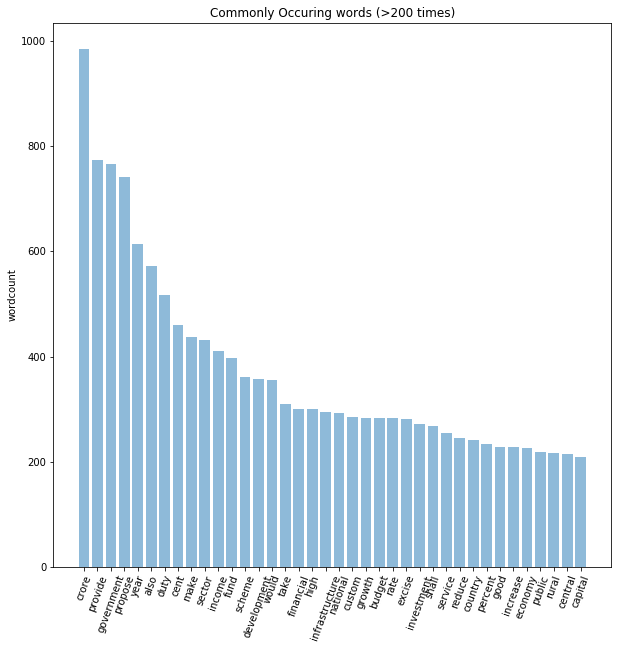

In [81]:
import matplotlib.pyplot as plt

import seaborn as sns


sorted_commonphrases['commonwords'] = sorted_commonphrases.index


plt.figure(figsize = (10,10))
plt.bar(sorted_commonphrases['commonwords'].iloc[0:38], sorted_commonphrases['CountBudget'].iloc[0:38], align='center', alpha=0.5)
plt.ylabel('wordcount')
plt.title('Commonly Occuring words (>200 times)')
plt.xticks(rotation=70)
plt.show()

# Word Clouds

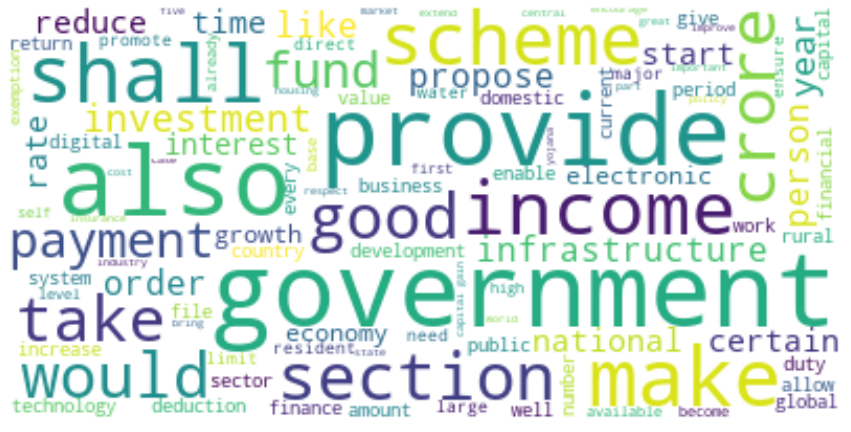

In [82]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordclouds = []
for i in range(speech_df.shape[0]) :
    wordcloud = WordCloud(stopwords=stop_words, background_color="white", max_font_size=50, \
                          max_words=100).generate(speech_df.iloc[i,7])
    wordclouds.append( wordcloud )
    # Lines 4 to 7
plt.figure(figsize = (15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

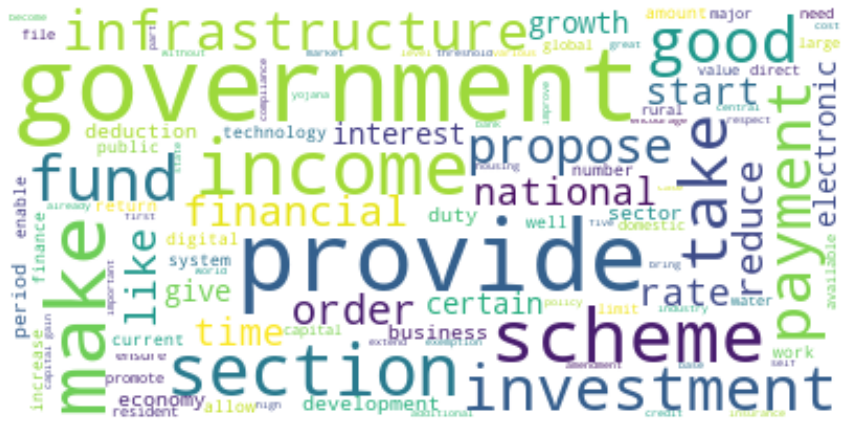

In [83]:
stop_words.update(["crore", "crores", "lakh", "lakhs", "rupees", "annexure", "per", 'cent', "%", "percent",\
                  "also", "would", "country", "madam speaker", "shall", "country", "years", "india", \
                  "country", "etc", "new", "every", "year", "one", "made", "rs", "person", "i", "ii",\
                  "iii", "iv", "set", "one", "shall", "made"])

wordclouds = []
for i in range(speech_df.shape[0]) :
    wordcloud = WordCloud(stopwords=stop_words, background_color="white", max_font_size=50, max_words=100).generate(speech_df.iloc[i,7])
    wordclouds.append( wordcloud )
    # Lines 4 to 7
plt.figure(figsize = (15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Updating Stop Words

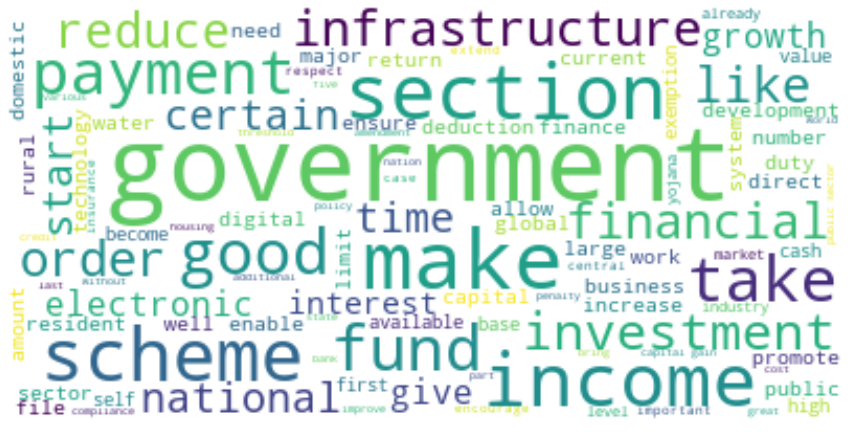

In [84]:
stop_words.update(["crore", "crores", "lakh", "lakhs", "rupees", "annexure", "per", 'cent', "percent",\
                  "also", "would", "country", "madam speaker", "shall", "country", "years", "india", \
                  "country", "etc", "new", "every", "year", "one", "made", "rs", "person", "i", "ii",\
                  "iii", "iv", "set", "one", "shall", "made", "budget", "economy", "propose", "proposed",\
                  "provide", "rate", "he", "she", "hers", "his", "theirs", "their", "our", "mine", "term", "economy"\
                    "national", "provision", "period"])

wordclouds = []
for i in range(speech_df.shape[0]) :
    wordcloud = WordCloud(stopwords=stop_words, background_color="white", max_font_size=50, max_words=100).generate(speech_df.iloc[i,7])
    wordclouds.append( wordcloud )
    # Lines 4 to 7
plt.figure(figsize = (15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [85]:
stopwords_updated = ["crore", "crores", "lakh", "lakhs", "rupees", "annexure", "per", 'cent', "percent",\
                     "also", "would", "country", "madam speaker", "shall", "country", "years", "india", \
                     "etc", "new", "every", "year", "one", "made", "rs", "person", "i", "ii",\
                     "iii", "iv", "set", "one", "shall", "made", "budget", "economy", "propose", "proposed",\
                     "provide", "rate", "he", "she", "hers", "his", "theirs", "their", "our", "mine", "term",\
                     "national", "provision", "period", "hence", "know", "preceding"]


In [86]:
stop_words |= {"crore", "crores", "lakh", "lakhs", "rupees", "annexure", "per", 'cent', "percent",\
               "also", "would", "country", "madam speaker", "shall", "country", "years", "india", \
               "etc", "new", "every", "year", "one", "made", "rs", "person", "i", "ii",\
               "iii", "iv", "set", "one", "shall", "made", "budget", "economy", "propose", "proposed",\
               "provide", "rate", "he", "she", "hers", "his", "theirs", "their", "our", "mine", "term",\
               "national", "provision", "period", "hence", "know", "preceding"}

print(len(stop_words))
print(stop_words)


223
{'their', 'whom', 'does', 'over', 'country', 'o', 'yours', 'while', 'here', "should've", 'her', 'once', 'few', 'one', 'each', 'i', 'we', "you're", 'preceding', 'he', 'there', "won't", 'were', "wasn't", 'that', 'couldn', 'propose', 'you', 'between', 've', 'which', 'made', 'don', 'hasn', "shouldn't", 'further', 'if', 'cent', 'again', 't', 'a', 'india', 'they', "don't", 'own', 'some', 'himself', 'should', 're', 'about', 'new', 'mustn', 'how', 'yourselves', 'wasn', 'would', 'be', 'was', 'after', 'provision', 'mightn', 'can', 'person', 'these', 'lakh', 'iii', 'haven', "didn't", '%', 'budget', 'with', 'no', 'why', 'more', "mightn't", 'below', 'period', 'itself', 'had', 'for', 's', 'herself', 'both', 'needn', "you'd", 'ain', "wouldn't", "haven't", 'weren', 'his', "it's", 'didn', 'up', 'mine', 'are', "mustn't", 'where', 'year', 'do', 'in', 'set', 'what', 'd', 'have', 'at', 'having', 'or', 'too', 'ii', 'the', 'them', 'now', 'll', 'themselves', 'other', 'from', 'madam speaker', 'has', 'down'

In [87]:
speech_df['speech_without_stopwords'] =speech_df['tokenized'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
Sentence_df['sent_without_stopwords'] =Sentence_df['tokenized'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))


test_df['speech_without_stopwords'] =test_df['tokenized'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
test_sent_df['sent_without_stopwords'] =test_sent_df['tokenized'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))

In [105]:
#updating tokens
speech_df['token_updated'] = speech_df['speech_without_stopwords'].apply(nltk.word_tokenize)
Sentence_df['token_updated'] = Sentence_df['sent_without_stopwords'].apply(nltk.word_tokenize)


test_df['token_updated'] = speech_df['speech_without_stopwords'].apply(nltk.word_tokenize)
test_sent_df['token_updated'] = Sentence_df['sent_without_stopwords'].apply(nltk.word_tokenize)

In [88]:
speech_df['lemmatized'] = speech_df['speech_without_stopwords'].apply(lambda x : " ".join(lemmatizer.lemmatize(token,get_part_of_speech(token)) for token in x.split(" ") ))
Sentence_df['lemmatized'] = Sentence_df['sent_without_stopwords'].apply(lambda x : " ".join(lemmatizer.lemmatize(token,get_part_of_speech(token)) for token in x.split(" ") ))


test_df['lemmatized'] = test_df['speech_without_stopwords'].apply(lambda x : " ".join(lemmatizer.lemmatize(token,get_part_of_speech(token)) for token in x.split(" ") ))
test_sent_df['lemmatized'] = test_sent_df['sent_without_stopwords'].apply(lambda x : " ".join(lemmatizer.lemmatize(token,get_part_of_speech(token)) for token in x.split(" ") ))

In [106]:
speech_df.head(2)

SpeechDate   FinanceMinister  \
0 2010-02-26  Pranab Mukherjee   
1 2011-02-28  Pranab Mukherjee   

                                          SpeechText  \
0   i rise to present the union budget for 2010-1...   
1   i rise to present the union budget for 2011-1...   

                                      Cleaned_speech  \
0  rise present union budget when presented inter...   
1  rise present union budget reaching remarkable ...   

                                     Complete_speech  \
0  rise present union budget when interim budget ...   
1  rise present union budget reaching remarkable ...   

                                           tokenized  \
0  [rise, present, union, budget, when, interim, ...   
1  [rise, present, union, budget, reaching, remar...   

                            speech_without_stopwords  \
0  rise present union interim regular august hous...   
1  rise present union reaching remarkable fiscal ...   

                                          lemmatized  \
0  rise present union interim regular august hous...   
1  rise present union reach remarkable fiscal wor...   

                                                 pos  \
0  [(rise, NN), (present, JJ), (union, NN), (budg...   
1  [(rise, NN), (present, JJ), (union, NN), (budg...   

                                       token_updated  
0  [rise, present, union, interim, regular, augus...  
1  [rise, present, union, reaching, remarkable, f...

# Number of Sentences across Speeches

Text(0, 0.5, 'Finance Minister')

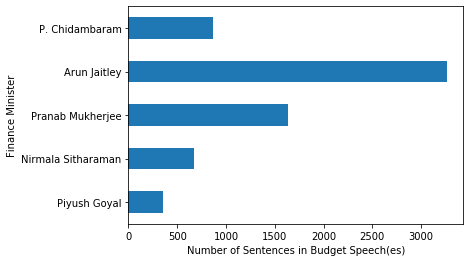

In [387]:
ax = Sentence_df["FinanceMinister"].value_counts(sort=False).plot(kind="barh")
ax.set_xlabel('Number of Sentences in Budget Speech(es)')
ax.set_ylabel('Finance Minister')

# Finding Similar words

In [388]:
import spacy
from scipy.spatial.distance import cosine

In [389]:
most_common_words = ['a', 'ability', 'able', 'about', 'above', 'accept', 'according', 'account', 'across', 'act', 'action', 'activity', 'actually', 'add', 'address', 'administration', 'admit', 'adult', 'affect', 'after', 'again', 'against', 'age', 'agency', 'agent', 'ago', 'agree', 'agreement', 'ahead', 'air', 'all', 'allow', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'American', 'among', 'amount', 'analysis', 'and', 'animal', 'another', 'answer', 'any', 'anyone', 'anything', 'appear', 'apply', 'approach', 'area', 'argue', 'arm', 'around', 'arrive', 'art', 'article', 'artist', 'as', 'ask', 'assume', 'at', 'attack', 'attention', 'attorney', 'audience', 'author', 'authority', 'available', 'avoid', 'away', 'baby', 'back', 'bad', 'bag', 'ball', 'bank', 'bar', 'base', 'be', 'beat', 'beautiful', 'because', 'become', 'bed', 'before', 'begin', 'behavior', 'behind', 'believe', 'benefit', 'best', 'better', 'between', 'beyond', 'big', 'bill', 'billion', 'bit', 'black', 'blood', 'blue', 'board', 'body', 'book', 'born', 'both', 'box', 'boy', 'break', 'bring', 'brother', 'budget', 'build', 'building', 'business', 'but', 'buy', 'by', 'call', 'camera', 'campaign', 'can', 'cancer', 'candidate', 'capital', 'car', 'card', 'care', 'career', 'carry', 'case', 'catch', 'cause', 'cell', 'center', 'central', 'century', 'certain', 'certainly', 'chair', 'challenge', 'chance', 'change', 'character', 'charge', 'check', 'child', 'choice', 'choose', 'church', 'citizen', 'city', 'civil', 'claim', 'class', 'clear', 'clearly', 'close', 'coach', 'cold', 'collection', 'college', 'color', 'come', 'commercial', 'common', 'community', 'company', 'compare', 'computer', 'concern', 'condition', 'conference', 'Congress', 'consider', 'consumer', 'contain', 'continue', 'control', 'cost', 'could', 'country', 'couple', 'course', 'court', 'cover', 'create', 'crime', 'cultural', 'culture', 'cup', 'current', 'customer', 'cut', 'dark', 'data', 'daughter', 'day', 'dead', 'deal', 'death', 'debate', 'decade', 'decide', 'decision', 'deep', 'defense', 'degree', 'Democrat', 'democratic', 'describe', 'design', 'despite', 'detail', 'determine', 'develop', 'development', 'die', 'difference', 'different', 'difficult', 'dinner', 'direction', 'director', 'discover', 'discuss', 'discussion', 'disease', 'do', 'doctor', 'dog', 'door', 'down', 'draw', 'dream', 'drive', 'drop', 'drug', 'during', 'each', 'early', 'east', 'easy', 'eat', 'economic', 'economy', 'edge', 'education', 'effect', 'effort', 'eight', 'either', 'election', 'else', 'employee', 'end', 'energy', 'enjoy', 'enough', 'enter', 'entire', 'environment', 'environmental', 'especially', 'establish', 'even', 'evening', 'event', 'ever', 'every', 'everybody', 'everyone', 'everything', 'evidence', 'exactly', 'example', 'executive', 'exist', 'expect', 'experience', 'expert', 'explain', 'eye', 'face', 'fact', 'factor', 'fail', 'fall', 'family', 'far', 'fast', 'father', 'fear', 'federal', 'feel', 'feeling', 'few', 'field', 'fight', 'figure', 'fill', 'film', 'final', 'finally', 'financial', 'find', 'fine', 'finger', 'finish', 'fire', 'firm', 'first', 'fish', 'five', 'floor', 'fly', 'focus', 'follow', 'food', 'foot', 'for', 'force', 'foreign', 'forget', 'form', 'former', 'forward', 'four', 'free', 'friend', 'from', 'front', 'full', 'fund', 'future', 'game', 'garden', 'gas', 'general', 'generation', 'get', 'girl', 'give', 'glass', 'go', 'goal', 'good', 'government', 'great', 'green', 'ground', 'group', 'grow', 'growth', 'guess', 'gun', 'guy', 'hair', 'half', 'hand', 'hang', 'happen', 'happy', 'hard', 'have', 'he', 'head', 'health', 'hear', 'heart', 'heat', 'heavy', 'help', 'her', 'here', 'herself', 'high', 'him', 'himself', 'his', 'history', 'hit', 'hold', 'home', 'hope', 'hospital', 'hot', 'hotel', 'hour', 'house', 'how', 'however', 'huge', 'human', 'hundred', 'husband', 'I', 'idea', 'identify', 'if', 'image', 'imagine', 'impact', 'important', 'improve', 'in', 'include', 'including', 'increase', 'indeed', 'indicate', 'individual', 'industry', 'information', 'inside', 'instead', 'institution', 'interest', 'interesting', 'international', 'interview', 'into', 'investment', 'involve', 'issue', 'it', 'item', 'its', 'itself', 'job', 'join', 'just', 'keep', 'key', 'kid', 'kill', 'kind', 'kitchen', 'know', 'knowledge', 'land', 'language', 'large', 'last', 'late', 'later', 'laugh', 'law', 'lawyer', 'lay', 'lead', 'leader', 'learn', 'least', 'leave', 'left', 'leg', 'legal', 'less', 'let', 'letter', 'level', 'lie', 'life', 'light', 'like', 'likely', 'line', 'list', 'listen', 'little', 'live', 'local', 'long', 'look', 'lose', 'loss', 'lot', 'love', 'low', 'machine', 'magazine', 'main', 'maintain', 'major', 'majority', 'make', 'man', 'manage', 'management', 'manager', 'many', 'market', 'marriage', 'material', 'matter', 'may', 'maybe', 'me', 'mean', 'measure', 'media', 'medical', 'meet', 'meeting', 'member', 'memory', 'mention', 'message', 'method', 'middle', 'might', 'military', 'million', 'mind', 'minute', 'miss', 'mission', 'model', 'modern', 'moment', 'money', 'month', 'more', 'morning', 'most', 'mother', 'mouth', 'move', 'movement', 'movie', 'Mr', 'Mrs', 'much', 'music', 'must', 'my', 'myself', 'name', 'nation', 'national', 'natural', 'nature', 'near', 'nearly', 'necessary', 'need', 'network', 'never', 'new', 'news', 'newspaper', 'next', 'nice', 'night', 'no', 'none', 'nor', 'north', 'not', 'note', 'nothing', 'notice', 'now', "n't", 'number', 'occur', 'of', 'off', 'offer', 'office', 'officer', 'official', 'often', 'oh', 'oil', 'ok', 'old', 'on', 'once', 'one', 'only', 'onto', 'open', 'operation', 'opportunity', 'option', 'or', 'order', 'organization', 'other', 'others', 'our', 'out', 'outside', 'over', 'own', 'owner', 'page', 'pain', 'painting', 'paper', 'parent', 'part', 'participant', 'particular', 'particularly', 'partner', 'party', 'pass', 'past', 'patient', 'pattern', 'pay', 'peace', 'people', 'per', 'perform', 'performance', 'perhaps', 'period', 'person', 'personal', 'phone', 'physical', 'pick', 'picture', 'piece', 'place', 'plan', 'plant', 'play', 'player', 'PM', 'point', 'police', 'policy', 'political', 'politics', 'poor', 'popular', 'population', 'position', 'positive', 'possible', 'power', 'practice', 'prepare', 'present', 'president', 'pressure', 'pretty', 'prevent', 'price', 'private', 'probably', 'problem', 'process', 'produce', 'product', 'production', 'professional', 'professor', 'program', 'project', 'property', 'protect', 'prove', 'provide', 'public', 'pull', 'purpose', 'push', 'put', 'quality', 'question', 'quickly', 'quite', 'race', 'radio', 'raise', 'range', 'rate', 'rather', 'reach', 'read', 'ready', 'real', 'reality', 'realize', 'really', 'reason', 'receive', 'recent', 'recently', 'recognize', 'record', 'red', 'reduce', 'reflect', 'region', 'relate', 'relationship', 'religious', 'remain', 'remember', 'remove', 'report', 'represent', 'Republican', 'require', 'research', 'resource', 'respond', 'response', 'responsibility', 'rest', 'result', 'return', 'reveal', 'rich', 'right', 'rise', 'risk', 'road', 'rock', 'role', 'room', 'rule', 'run', 'safe', 'same', 'save', 'say', 'scene', 'school', 'science', 'scientist', 'score', 'sea', 'season', 'seat', 'second', 'section', 'security', 'see', 'seek', 'seem', 'sell', 'send', 'senior', 'sense', 'series', 'serious', 'serve', 'service', 'set', 'seven', 'several', 'sex', 'sexual', 'shake', 'share', 'she', 'shoot', 'short', 'shot', 'should', 'shoulder', 'show', 'side', 'sign', 'significant', 'similar', 'simple', 'simply', 'since', 'sing', 'single', 'sister', 'sit', 'site', 'situation', 'six', 'size', 'skill', 'skin', 'small', 'smile', 'so', 'social', 'society', 'soldier', 'some', 'somebody', 'someone', 'something', 'sometimes', 'son', 'song', 'soon', 'sort', 'sound', 'source', 'south', 'southern', 'space', 'speak', 'special', 'specific', 'speech', 'spend', 'sport', 'spring', 'staff', 'stage', 'stand', 'standard', 'star', 'start', 'state', 'statement', 'station', 'stay', 'step', 'still', 'stock', 'stop', 'store', 'story', 'strategy', 'street', 'strong', 'structure', 'student', 'study', 'stuff', 'style', 'subject', 'success', 'successful', 'such', 'suddenly', 'suffer', 'suggest', 'summer', 'support', 'sure', 'surface', 'system', 'table', 'take', 'talk', 'task', 'tax', 'teach', 'teacher', 'team', 'technology', 'television', 'tell', 'ten', 'tend', 'term', 'test', 'than', 'thank', 'that', 'the', 'their', 'them', 'themselves', 'then', 'theory', 'there', 'these', 'they', 'thing', 'think', 'third', 'this', 'those', 'though', 'thought', 'thousand', 'threat', 'three', 'through', 'throughout', 'throw', 'thus', 'time', 'to', 'today', 'together', 'tonight', 'too', 'top', 'total', 'tough', 'toward', 'town', 'trade', 'traditional', 'training', 'travel', 'treat', 'treatment', 'tree', 'trial', 'trip', 'trouble', 'true', 'truth', 'try', 'turn', 'TV', 'two', 'type', 'under', 'understand', 'unit', 'until', 'up', 'upon', 'us', 'use', 'usually', 'value', 'various', 'very', 'victim', 'view', 'violence', 'visit', 'voice', 'vote', 'wait', 'walk', 'wall', 'want', 'war', 'watch', 'water', 'way', 'we', 'weapon', 'wear', 'week', 'weight', 'well', 'west', 'western', 'what', 'whatever', 'when', 'where', 'whether', 'which', 'while', 'white', 'who', 'whole', 'whom', 'whose', 'why', 'wide', 'wife', 'will', 'win', 'wind', 'window', 'wish', 'with', 'within', 'without', 'woman', 'wonder', 'word', 'work', 'worker', 'world', 'worry', 'would', 'write', 'writer', 'wrong', 'yard', 'yeah', 'year', 'yes', 'yet', 'you', 'young', 'your', 'yourself']

In [390]:
nlp = spacy.load('en_core_web_sm')

In [391]:
vector_list = []
for word in most_common_words:
    vector_list.append(nlp(word).vector)
    

In [392]:
print(most_common_words[347])

glass


In [393]:
print(vector_list[347])

[ 1.2761219  -3.1371756   0.07517216  0.17242485  0.7104127   1.3664272
  2.5790298   0.5788313  -0.63478845  5.78517     2.9084935  -0.74030554
  2.9726825  -2.7416627   1.1808879   0.9791101   0.45854604  2.0851102
 -1.0594604  -1.6768103   0.30298102 -0.57731843 -0.741951   -2.3411913
 -1.2970599  -1.3144593   1.5624142  -4.1968927   2.520585   -1.04568
  4.327862   -0.8301592   1.4698147   1.4587566   2.3050728  -2.2208114
  3.9901233   0.19553745 -3.1022239  -0.7605516   4.663883    1.1019006
 -1.4715192  -3.5460997   2.4567857   0.02696794 -0.3081796  -1.3746904
  0.33931345  1.9631052  -1.4463401  -0.60527956 -1.7968802  -2.6089642
 -0.08648849 -0.27595782  2.4695642   0.6991825   0.02529287 -1.2947916
  0.3753165  -1.1589429  -0.38008046 -0.35974193  1.5252352  -3.7393854
  1.6384187  -1.3306148  -1.9440101   0.6836364  -2.3972218   1.1889715
  2.2445889   3.5553188  -3.0006096  -0.6541874   1.2113874  -1.259045
 -2.6270063   2.5431793  -0.412294   -2.810513   -1.8738568  -0.34

In [394]:
def find_closest_words(word_list, vector_list, word_to_check):
    return sorted(word_list,
                  key=lambda x: cosine(vector_list[word_list.index(word_to_check)], vector_list[word_list.index(x)]))[:10]

In [395]:
close_to_food = find_closest_words(most_common_words, vector_list, "food")

In [396]:
print(close_to_food)

['food', 'government', 'blood', 'dinner', 'baby', 'management', 'generation', 'economy', 'market', 'television']


# Manually finding closest words in our model

Before we attempt topic modeling or key word selection, we alos tried to find similar words through the folowing approach. The results were not intuitive given our context and therefore not used further.


In [397]:
vector_list1 = []
for word in feature_names:
    vector_list1.append(nlp(word).vector)

In [398]:
print(feature_names[347])

automobile


In [399]:
print(vector_list1[347])

[-1.9227574  -1.5521641   0.5802443  -0.86537206  1.3507423   2.362805
  4.1455755   0.12811577 -0.16338721  3.6982021   3.7952836  -1.9138472
  1.7697897  -1.4733131   1.2042441  -0.10480613 -1.570627    1.3122432
 -2.2771826   0.32462776  0.15996265  1.1565645   3.077089   -2.3781853
 -1.661308   -2.4649334   2.6835365  -2.565451    3.1537747   0.9017451
  4.3259664  -1.8719456   3.1899025   0.02108085  1.3660806  -4.8092933
  1.6171002  -0.05079633 -1.8155231  -0.04630971  3.3215632  -0.7869642
  0.89109546 -4.6856036  -1.2985351   0.9546099   1.7232463   0.01177534
 -0.57433987  1.454764   -0.3009479  -3.8853576  -0.97870284 -2.840994
 -2.367974    1.9752957  -0.22572389 -0.6271144   0.8698803   1.0324535
  3.7231026  -0.60810214  1.573679   -1.5814159   0.1131532  -2.042083
  1.8570185  -0.3795831  -2.2084386   0.36290577 -1.700677   -0.13187265
  1.3975511  -0.5885674  -2.0809608   2.4208035   0.78334624 -1.1934687
 -1.6747451   0.7507539  -0.9041094  -2.1925607  -0.05599362 -1.5

In [400]:
def find_closest_words(word_list, vector_list, word_to_check):
    return sorted(word_list,
                  key=lambda x: cosine(vector_list[word_list.index(word_to_check)], vector_list[word_list.index(x)]))[:10]

In [401]:
close_to_people = find_closest_words(feature_names, vector_list1, "people")

In [402]:
print(close_to_people)

['people', 'men', 'politics', 'thanks', 'logistics', 'earnings', 'teeth', 'cattle', 'police', 'athletics']


In [403]:
close_to_budget = find_closest_words(feature_names, vector_list1, "budget")

In [404]:
print(close_to_budget)

['budget', 'impetus', 'paper', 'room', 'cottage', 'message', 'climate', 'malfeasance', 'baggage', 'tribute']


In [405]:
close_to_inflation = find_closest_words(feature_names, vector_list1, "inflation")

In [406]:
print(close_to_inflation)

['inflation', 'illumination', 'equalization', 'complacency', 'demonetization', 'authentication', 'communication', 'illustration', 'irrigation', 'diversion']


# Word2Vec Model

1)Word2vec is one of the model for word embedding
2) we used word2vec to see the similar kind of word embeddings across the speeches

In [407]:
import gensim

In [408]:
tokenized = []
for speech in speech_df['lemmatized']:
        tokenized.append(word_tokenize(speech))

In [409]:
tokenized

[['rise',
  'present',
  'union',
  'interim',
  'regular',
  'august',
  'house',
  'face',
  'grave',
  'growth',
  'business',
  'sentiment',
  'weak',
  'capacity',
  'sustain',
  'high',
  'growth',
  'serious',
  'threat',
  'widespread',
  'economic',
  'slowdown',
  'world',
  'clear',
  'policy',
  'many',
  'crisis',
  'eventually',
  'unfold',
  'impact',
  'growth',
  'momentum',
  'soon',
  'able',
  'turnaround',
  'short',
  'global',
  'outlook',
  'bleak',
  'consensus',
  'face',
  'brunt',
  'crisis',
  'across',
  'world',
  'home',
  'add',
  'uncertainty',
  'account',
  'normal',
  'south',
  'west',
  'monsoon',
  'crop',
  'production',
  'food',
  'possible',
  'growth',
  'rural',
  'demand',
  'today',
  'stand',
  'confidence',
  'weather',
  'crisis',
  'well',
  'well',
  'position',
  'ago',
  'today',
  'less',
  'nine',
  'leadership',
  'back',
  'power',
  'prime',
  'minister',
  'singh',
  'form',
  'government',
  'second',
  'three',
  'medium',


In [410]:
model1 = gensim.models.Word2Vec(tokenized, size = 96, window = 5, min_count = 1, workers = 2, sg=1)

In [411]:
vocabulary1 = list(model1.wv.vocab.items())
print(vocabulary1)

[('rise', <gensim.models.keyedvectors.Vocab object at 0x0000021A90509808>), ('present', <gensim.models.keyedvectors.Vocab object at 0x0000021A90509908>), ('union', <gensim.models.keyedvectors.Vocab object at 0x0000021A90509988>), ('interim', <gensim.models.keyedvectors.Vocab object at 0x0000021A905098C8>), ('regular', <gensim.models.keyedvectors.Vocab object at 0x0000021A90509948>), ('august', <gensim.models.keyedvectors.Vocab object at 0x0000021A905099C8>), ('house', <gensim.models.keyedvectors.Vocab object at 0x0000021A90509B08>), ('face', <gensim.models.keyedvectors.Vocab object at 0x0000021A90509A48>), ('grave', <gensim.models.keyedvectors.Vocab object at 0x0000021A90509A08>), ('growth', <gensim.models.keyedvectors.Vocab object at 0x0000021A90509A88>), ('business', <gensim.models.keyedvectors.Vocab object at 0x0000021A90509B88>), ('sentiment', <gensim.models.keyedvectors.Vocab object at 0x0000021A90509AC8>), ('weak', <gensim.models.keyedvectors.Vocab object at 0x0000021A90509C48>),

In [412]:
similar_to_budget = model1.most_similar("inflation", topn=20)
print(similar_to_budget)

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('policy', 0.9682290554046631), ('global', 0.9626012444496155), ('path', 0.9608296155929565), ('growth', 0.9601690769195557), ('economic', 0.9560117721557617), ('consolidation', 0.948944091796875), ('well', 0.944358766078949), ('today', 0.9428867101669312), ('committee', 0.9419418573379517), ('world', 0.9415355920791626), ('grow', 0.9407232999801636), ('crisis', 0.9405143857002258), ('next', 0.9375250339508057), ('bring', 0.9370458722114563), ('must', 0.9366490840911865), ('last', 0.9356384873390198), ('management', 0.9349061250686646), ('turn', 0.9323478937149048), ('level', 0.9308282136917114), ('situation', 0.9291129112243652)]


# Tf-Idf

In [413]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [414]:
vectorizer = TfidfVectorizer(norm = None)
tfidf_scores = vectorizer.fit_transform(speech_df['lemmatized'])

# get vocabulary of terms
feature_names = vectorizer.get_feature_names()

In [415]:
corpus_index = [f"Speech {i+1}" for i in range(len(speech_df['lemmatized']))]

In [416]:
df_tf_idf = pd.DataFrame(tfidf_scores.T.todense(), index=feature_names, columns=corpus_index)
print(df_tf_idf)

           Speech 1  Speech 2  Speech 3  Speech 4  Speech 5  Speech 6  \
abatement  0.000000  7.092760  5.319570  3.546380  0.000000  0.000000   
abeyance   0.000000  0.000000  2.871802  0.000000  0.000000  0.000000   
abide      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ability    0.000000  1.773190  0.000000  0.000000  0.000000  1.773190   
able       5.400214  5.400214  3.240128  5.400214  4.320171  2.160085   
...             ...       ...       ...       ...       ...       ...   
zeolite    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
zero       1.619039  1.619039  0.000000  8.095196  0.000000  0.000000   
zinc       0.000000  0.000000  0.000000  4.932674  0.000000  0.000000   
zirconia   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
zone       0.000000  2.178655  2.178655  0.000000  0.000000  0.000000   

            Speech 7   Speech 8  Speech 9  Speech 10  Speech 11  Speech 12  
abatement  12.412329  26.597848  0.000000   0.

In [417]:
vectorizer1 = TfidfVectorizer(norm = None)
tfidf_scores = vectorizer1.fit_transform(Sentence_df['lemmatized'])

# get vocabulary of terms
feature_names = vectorizer1.get_feature_names()

In [418]:
print(tfidf_scores)

  (0, 1914)	9.13285336492302
  (0, 1633)	6.424803163820811
  (0, 2050)	5.315141038966116
  (0, 334)	6.607124720614766
  (0, 3486)	7.117950344380756
  (0, 2265)	6.830268271928976
  (0, 4456)	6.881561566316526
  (0, 3213)	5.521935452278797
  (0, 3665)	6.064800429789404
  (1, 4648)	7.746559003803131
  (1, 3788)	8.216562633048866
  (1, 530)	5.081068417119717
  (1, 1927)	4.316612208854989
  (2, 4716)	5.220830359494875
  (2, 3903)	6.935628787586802
  (2, 1362)	5.02197950074971
  (2, 4685)	8.216562633048866
  (2, 4270)	8.727388256814857
  (2, 3797)	6.881561566316526
  (2, 2005)	4.2730409605613495
  (2, 4151)	6.458704715496492
  (2, 555)	5.407159937686369
  (2, 1927)	4.316612208854989
  (3, 4445)	8.727388256814857
  (3, 1542)	8.216562633048866
  :	:
  (6805, 931)	6.242481607026857
  (6805, 3312)	4.122218070826765
  (6805, 188)	5.172040195325443
  (6806, 3759)	4.989718638531489
  (6806, 4373)	6.188414385756581
  (6806, 1668)	7.628775968146747
  (6806, 1482)	6.935628787586802
  (6806, 87)	6.9356

In [419]:
for i in range(Sentence_df.shape[0]) :
    v = TfidfVectorizer()
    text = Sentence_df['lemmatized']
    text = [text[i]]
    #v.fit(text)
    x = v.fit_transform(text)
    print(x.toarray()[0])

[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333]
[0.5 0.5 0.5 0.5]
[0.31622777 0.31622777 0.31622777 0.31622777 0.31622777 0.31622777
 0.31622777 0.31622777 0.31622777 0.31622777]
[0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
[0.57735027 0.57735027 0.57735027]
[0.57735027 0.57735027 0.57735027]
[0.31622777 0.31622777 0.31622777 0.31622777 0.31622777 0.31622777
 0.31622777 0.31622777 0.31622777 0.31622777]
[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333]
[0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
[0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
[0.57735027 0.57735027 0.57735027]
[0.28867513 0.28867513 0.28867513 0.28867513 0.28867513 0.28867513
 0.28867513 0.28867513 0.28867513 0.28867513 0.28867513 0.28867513]
[0.31622777 0.31622777 0.31622777 0.31622777 0.31622777 0.31622777
 0.31622777 0.31622777 0.31622777 0.31622

ValueError: empty vocabulary; perhaps the documents only contain stop words

# Topic Modelling

# LDA Method

In [107]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

In [108]:
speech = speech_df['token_updated']
dictionary = gensim.corpora.Dictionary(speech)

In [109]:
speech[:10]

0    [rise, present, union, interim, regular, augus...
1    [rise, present, union, reaching, remarkable, f...
2    [rise, present, union, recovery, interrupted, ...
3    [rise, present, recall, last, tenure, finance,...
4    [introduction, rise, present, interim, current...
5    [rise, present, state, people, decisively, cha...
6    [rise, present, union, present, economic, envi...
7    [rise, present, global, serious, crisis, globa...
8    [auspicious, rise, present, spring, season, op...
9    [rise, present, madam, four, people, give, nat...
Name: token_updated, dtype: object

In [110]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 able
1 abroad
2 abundance
3 abuse
4 accelerated
5 access
6 accordingly
7 account
8 accountability
9 accounting
10 accredited


In [111]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [112]:
bow_corpus = [dictionary.doc2bow(doc) for doc in speech]
bow_corpus[10]

[(3, 1),
 (4, 1),
 (15, 1),
 (16, 1),
 (19, 3),
 (20, 1),
 (27, 1),
 (29, 1),
 (31, 1),
 (33, 4),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (43, 3),
 (44, 4),
 (47, 1),
 (60, 2),
 (63, 1),
 (66, 1),
 (70, 1),
 (71, 1),
 (75, 1),
 (78, 2),
 (83, 1),
 (85, 2),
 (90, 1),
 (91, 1),
 (96, 5),
 (101, 1),
 (102, 1),
 (105, 1),
 (106, 1),
 (107, 5),
 (122, 1),
 (127, 1),
 (133, 2),
 (135, 1),
 (136, 1),
 (141, 2),
 (145, 2),
 (149, 1),
 (155, 1),
 (156, 1),
 (158, 3),
 (161, 1),
 (167, 1),
 (171, 1),
 (187, 3),
 (194, 1),
 (196, 1),
 (198, 2),
 (200, 1),
 (201, 1),
 (204, 1),
 (206, 1),
 (208, 3),
 (216, 3),
 (218, 2),
 (223, 1),
 (224, 3),
 (225, 1),
 (227, 1),
 (228, 1),
 (229, 2),
 (230, 1),
 (231, 5),
 (235, 2),
 (236, 1),
 (245, 1),
 (246, 1),
 (250, 1),
 (252, 1),
 (257, 2),
 (262, 1),
 (263, 1),
 (270, 1),
 (273, 2),
 (276, 1),
 (279, 1),
 (280, 2),
 (282, 1),
 (283, 2),
 (290, 1),
 (291, 1),
 (295, 1),
 (298, 1),
 (311, 2),
 (320, 3),
 (324, 1),
 (325, 1),
 (329, 1),
 (334, 1),
 (335, 1

In [113]:
bow_doc_10 = bow_corpus[10]

for i in range(len(bow_doc_10)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_10[i][0], 
                                                     dictionary[bow_doc_10[i][0]], 
                                                     bow_doc_10[i][1]))

Word 3 ("admitted") appears 1 time.
Word 4 ("agree") appears 1 time.
Word 15 ("cinema") appears 1 time.
Word 16 ("citizen") appears 1 time.
Word 19 ("classes") appears 3 time.
Word 20 ("climate") appears 1 time.
Word 27 ("conscious") appears 1 time.
Word 29 ("consolidate") appears 1 time.
Word 31 ("convert") appears 1 time.
Word 33 ("coverage") appears 4 time.
Word 36 ("day") appears 1 time.
Word 37 ("defined") appears 1 time.
Word 38 ("deliver") appears 1 time.
Word 39 ("designed") appears 1 time.
Word 43 ("dollar") appears 3 time.
Word 44 ("doubled") appears 4 time.
Word 47 ("driver") appears 1 time.
Word 60 ("expanding") appears 2 time.
Word 63 ("extension") appears 1 time.
Word 66 ("faith") appears 1 time.
Word 70 ("flagship") appears 1 time.
Word 71 ("freight") appears 1 time.
Word 75 ("handling") appears 1 time.
Word 78 ("helping") appears 2 time.
Word 83 ("identify") appears 1 time.
Word 85 ("impetus") appears 2 time.
Word 90 ("intensive") appears 1 time.
Word 91 ("intent") appe

In [114]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [115]:
corpus_tfidf = tfidf[bow_corpus]

# Bag of Words with LDA Model

In [116]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [198]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.018*"motor" + 0.011*"diesel" + 0.010*"abatement" + 0.010*"petrol" + 0.009*"premium" + 0.009*"estimate" + 0.008*"footwear" + 0.007*"withdrawn" + 0.007*"provident" + 0.007*"producer"
Topic: 1 
Words: 0.011*"accountability" + 0.011*"withdrawn" + 0.008*"corruption" + 0.008*"abatement" + 0.008*"officer" + 0.008*"avoidance" + 0.008*"stepped" + 0.008*"miscellaneous" + 0.007*"diesel" + 0.007*"liable"
Topic: 2 
Words: 0.013*"diesel" + 0.013*"petrol" + 0.012*"motor" + 0.012*"coverage" + 0.012*"salaried" + 0.010*"mudra" + 0.009*"strategic" + 0.009*"known" + 0.008*"footwear" + 0.008*"corruption"
Topic: 3 
Words: 0.008*"diesel" + 0.007*"withdrawn" + 0.007*"motor" + 0.007*"officer" + 0.006*"petrol" + 0.005*"battery" + 0.005*"repair" + 0.005*"sports" + 0.005*"abatement" + 0.005*"maintenance"
Topic: 4 
Words: 0.013*"petrol" + 0.012*"officer" + 0.010*"diesel" + 0.008*"aviation" + 0.007*"motor" + 0.006*"dollar" + 0.006*"refund" + 0.006*"determination" + 0.006*"strategic" + 0.006*"rubb

# LDA using Tf-Idf

In [135]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [136]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.002*"motor" + 0.002*"estimate" + 0.002*"sports" + 0.002*"petrol" + 0.002*"intend" + 0.002*"abatement" + 0.002*"whole" + 0.002*"dollar" + 0.002*"officer" + 0.002*"diesel"
Topic: 1 Word: 0.005*"diesel" + 0.005*"rubber" + 0.005*"petrol" + 0.005*"officer" + 0.005*"legacy" + 0.005*"computation" + 0.005*"motor" + 0.004*"kind" + 0.004*"freight" + 0.004*"determination"
Topic: 2 Word: 0.008*"regular" + 0.007*"estimate" + 0.007*"responsibility" + 0.007*"whole" + 0.006*"trend" + 0.006*"cycle" + 0.006*"quarter" + 0.006*"statutory" + 0.005*"intend" + 0.004*"hold"
Topic: 3 Word: 0.002*"diesel" + 0.002*"intend" + 0.002*"sports" + 0.002*"petrol" + 0.002*"motor" + 0.002*"dollar" + 0.002*"regular" + 0.002*"quarter" + 0.002*"estimate" + 0.002*"abatement"
Topic: 4 Word: 0.006*"petrol" + 0.006*"diesel" + 0.005*"intend" + 0.005*"abatement" + 0.005*"charge" + 0.004*"reference" + 0.004*"premium" + 0.004*"facilitation" + 0.004*"certification" + 0.004*"specifically"
Topic: 5 Word: 0.007*"sustai

# Wordcloud of Top N words in each topic (LDA with tfidf)

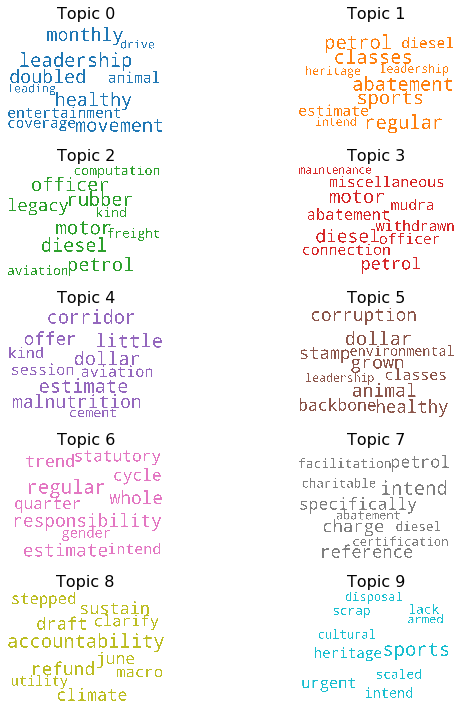

In [120]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_tfidf.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Wordcloud of Top N words in each topic (LDA with bag of words)

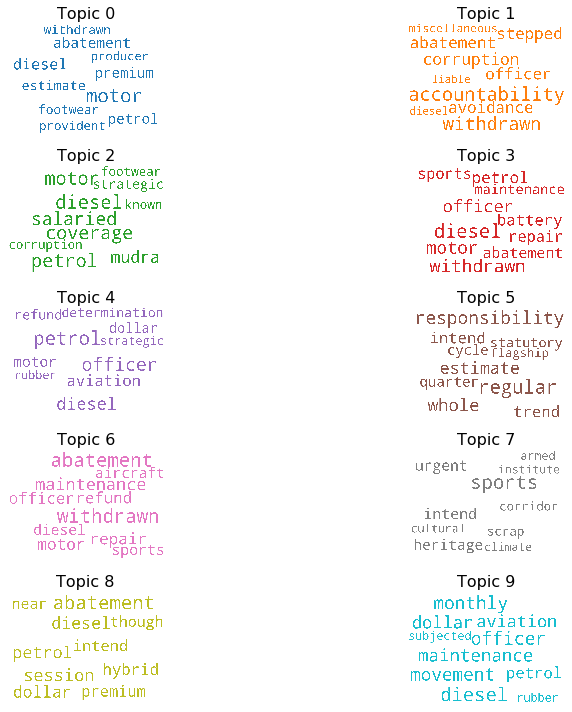

In [121]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(15,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Intertopic distance - LDA with tfidf

In [326]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model_tfidf, corpus=bow_corpus, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

C:\Users\syerramilli\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


# Intertopic distance - LDA with bag of words

In [123]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=bow_corpus, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

C:\Users\syerramilli\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


# FInding Distribution of Topics by Budget speech

### (using LDA model with tfidf)

In [330]:
speech = speech_df['token_updated']

def topics_speech(ldamodel=None, corpus=bow_corpus, texts=speech):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Topicwise Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [331]:
df_topic_sents_keywords = topics_speech(ldamodel=lda_model_tfidf, corpus=bow_corpus, texts=speech)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Budget_Speech', 'Dominant_Topic', 'Topicwise_Contribution', 'Topic_Keywords', 'Speech_tokens']
df_dominant_topic.head(10)

Budget_Speech  Dominant_Topic  Topicwise_Contribution  \
0              0             5.0                  0.9173   
1              1             8.0                  0.4806   
2              2             5.0                  0.8379   
3              3             9.0                  0.6882   
4              4             2.0                  0.9566   
5              5             6.0                  0.6648   
6              6             7.0                  0.3933   
7              7             7.0                  0.8743   
8              8             7.0                  0.9651   
9              9             8.0                  0.5298   

                                      Topic_Keywords  \
0  sustain, cement, dollar, climate, utility, jun...   
1  motor, vegetable, grown, petrol, diesel, anima...   
2  sustain, cement, dollar, climate, utility, jun...   
3  estimate, little, offer, shortly, classes, zer...   
4  regular, estimate, responsibility, whole, tren...   
5  sports, leadership, urgent, healthy, movement,...   
6  abatement, maintenance, withdrawn, officer, mi...   
7  abatement, maintenance, withdrawn, officer, mi...   
8  abatement, maintenance, withdrawn, officer, mi...   
9  motor, vegetable, grown, petrol, diesel, anima...   

                                       Speech_tokens  
0  [rise, present, union, interim, regular, augus...  
1  [rise, present, union, reaching, remarkable, f...  
2  [rise, present, union, recovery, interrupted, ...  
3  [rise, present, recall, last, tenure, finance,...  
4  [introduction, rise, present, interim, current...  
5  [rise, present, state, people, decisively, cha...  
6  [rise, present, union, present, economic, envi...  
7  [rise, present, global, serious, crisis, globa...  
8  [auspicious, rise, present, spring, season, op...  
9  [rise, present, madam, four, people, give, nat...

### (using LDA model with Bag of Words)

In [329]:
df_topic_sents_keywords = topics_speech(ldamodel=lda_model, corpus=bow_corpus, texts=speech)

# Format
df_dominant_topic_2 = df_topic_sents_keywords.reset_index()
df_dominant_topic_2.columns = ['Budget_Speech', 'Dominant_Topic', 'Topicwise_Contribution', 'Topic_Keywords', 'Speech_tokens']
df_dominant_topic_2.head(10)

Budget_Speech  Dominant_Topic  Topicwise_Contribution  \
0              0             9.0                  0.9963   
1              1             8.0                  0.9971   
2              2             8.0                  0.5791   
3              3             0.0                  0.9971   
4              4             5.0                  0.9937   
5              5             7.0                  0.9976   
6              6             8.0                  0.8546   
7              7             9.0                  0.4513   
8              8             1.0                  0.9977   
9              9             0.0                  0.6224   

                                      Topic_Keywords  \
0  diesel, officer, monthly, movement, maintenanc...   
1  abatement, session, petrol, diesel, dollar, hy...   
2  abatement, session, petrol, diesel, dollar, hy...   
3  motor, diesel, abatement, petrol, premium, est...   
4  regular, responsibility, whole, estimate, tren...   
5  sports, intend, urgent, heritage, scrap, corri...   
6  abatement, session, petrol, diesel, dollar, hy...   
7  diesel, officer, monthly, movement, maintenanc...   
8  accountability, withdrawn, corruption, abateme...   
9  motor, diesel, abatement, petrol, premium, est...   

                                       Speech_tokens  
0  [rise, present, union, interim, regular, augus...  
1  [rise, present, union, reaching, remarkable, f...  
2  [rise, present, union, recovery, interrupted, ...  
3  [rise, present, recall, last, tenure, finance,...  
4  [introduction, rise, present, interim, current...  
5  [rise, present, state, people, decisively, cha...  
6  [rise, present, union, present, economic, envi...  
7  [rise, present, global, serious, crisis, globa...  
8  [auspicious, rise, present, spring, season, op...  
9  [rise, present, madam, four, people, give, nat...

# KeyWord Selection Method 

In [217]:
from collections import OrderedDict


nlp = spacy.load('en_core_web_sm')
specific_pos = ['NOUN', 'VERB']

class Keyword():
    """Extract keywords"""
    
    def __init__(self):
        self.d = 0.85 
        self.min_diff = 1e-5
        self.steps = 5
        self.node_weight = None 

        
    def sentence_segment(self, doc, specific_pos):
        sentences = []
        for sent in doc.sents:
            selected_words = []
            for token in sent:
                # Store words that have Verb POS tag
                if token.pos_ in specific_pos and token.is_stop is False:
                    selected_words.append(token.text)                   
                sentences.append(selected_words)
        return sentences
        
    def get_vocab(self, sentences):
        """Get all tokens"""
        vocab = OrderedDict()
        i = 0
        for sentence in sentences:
            for word in sentence:
                if word not in vocab:
                    vocab[word] = i
                    i += 1
        return vocab
    
    def get_token_pairs(self, sentences):
        token_pairs = list()
        for sentence in sentences:
            for i, word in enumerate(sentence):
                for j in range(i+1):
                    if j >= len(sentence):
                        break
                    pair = (word, sentence[j])
                    if pair not in token_pairs:
                        token_pairs.append(pair)
        return token_pairs
        
    def symmetrize(self, sym):
        return sym + sym.T - np.diag(sym.diagonal())
    
    def get_matrix(self, vocab, token_pairs):
        # Build matrix
        vocab_size = len(vocab)
        matrix = np.zeros((vocab_size, vocab_size), dtype='float')
        for word1, word2 in token_pairs:
            i, j = vocab[word1], vocab[word2]
            matrix[i][j] = 1
            
        # Get Symmeric matrix
        matrix = self.symmetrize(matrix)
        
        # Normalize
        norm = np.sum(matrix, axis=0)
        matrix_norm = np.divide(matrix, norm, where=norm!=0) 
        
        return matrix_norm

    
    def get_keywords(self, number=3):
        """Print top number keywords"""
        
        node_weight = OrderedDict(sorted(self.node_weight.items(),key =lambda t: t[1], reverse=True))
        for i, (key, value) in enumerate(node_weight.items()):
            return(key) #  + ' - ' + str(value))
            if i > number:
                break
                        
        
    def analyze(self, text, specific_pos=['NOUN', 'VERB']):
        """Main function to analyze text"""
            
        
        doc = nlp(text)
        
        
        sentences = self.sentence_segment(doc, specific_pos) # list of list of words
        
        # vocabulary
        vocab = self.get_vocab(sentences)
        
        # Get token_pair
        token_pairs = self.get_token_pairs(sentences)
        
        # Get normalized matrix
        matrix = self.get_matrix(vocab, token_pairs)
        
        
        rank = np.array([1] * len(vocab))
        
        # Iteration
        previous_rank = 0
        for epoch in range(self.steps):
            rank = (1-self.d) + self.d * np.dot(matrix, rank)
            if abs(previous_rank - sum(rank))  < self.min_diff:
                break
            else:
                previous_rank = sum(rank)

        # Get weight for each node
        node_weight = dict()
        for word, index in vocab.items():
            node_weight[word] = rank[index]
        
        self.node_weight = node_weight


In [218]:
key_word = pd.DataFrame(columns=['Sentence', 'key_word'])

for i in range(Sentence_df.shape[0]) :
    sentence = Sentence_df.iloc[i,6]
    key_select = Keyword()
    key_select.analyze(sentence,specific_pos)
    word_list = key_select.get_keywords(3)
    key_word = key_word.append({'Sentence' : sentence, 'key_word': word_list}, ignore_index = True)

In [219]:
key_word.head(20)

Sentence     key_word
0   rise present union interim regular august hous...         rise
1                      growth business sentiment weak       growth
2   capacity sustain high growth serious threat wi...     capacity
3          clear policy many crisis eventually unfold       policy
4                              impact growth momentum       impact
5                                soon able turnaround   turnaround
6   short global outlook bleak consensus face brun...    consensus
7   home add uncertainty account normal south west...         home
8        production food possible growth rural demand   production
9          today stand confidence weather crisis well        today
10                                  well position ago     position
11  today less nine leadership back power prime mi...        today
12  three medium perspective outline last speech r...  perspective
13                        continue engage policy next     continue
14  first challenge quickly revert high growth pat...       growth
15       seek lord help make recovery broad base come         seek
16  growth important therefore second challenge ha...       growth
17  thrust development infrastructure rural achiev...       thrust
18  strengthen food security improve education hea...   strengthen
19                           require significant find      require

In [ ]:
key_word_budget= pd.DataFrame(columns=['speech', 'key_word'])

for i in range(speech_df.shape[0]):
    speech = speech_df.iloc[1,7]
    key_select = Keyword()
    key_select.analyze(speech,specific_pos)
    word_list = key_select.get_keywords(3)
    key_word_budget = key_word_budget.append({'speech' : speech, 'key_word': word_list}, ignore_index = True)

# Sentiment-Analysis

In [147]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from afinn import Afinn
afinn = Afinn(emoticons=True)

vader = SentimentIntensityAnalyzer()
afinn = Afinn(emoticons=True)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\syerramilli\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [157]:
text = Sentence_df.iloc[6,6]

print("Text:", text)
print("Vader Polarity Score:", vader.polarity_scores(text))
print("Textblob Sentiment Score:", TextBlob(text).sentiment)
print("Afinn Score:", afinn.score(text))

Text: short global outlook bleak consensus face brunt crisis across world
Vader Polarity Score: {'neg': 0.313, 'neu': 0.687, 'pos': 0.0, 'compound': -0.6249}
Textblob Sentiment Score: Sentiment(polarity=-0.3333333333333333, subjectivity=0.43333333333333335)
Afinn Score: -3.0


In [184]:
text = Sentence_df.iloc[73,6]

print("Text:", text)
print("Vader Polarity Score:", vader.polarity_scores(text))
print("Textblob Sentiment Score:", TextBlob(text).sentiment)
print("Afinn Score:", afinn.score(text))

Text: confident government position implement direct code good generate wide consensus design
Vader Polarity Score: {'neg': 0.0, 'neu': 0.596, 'pos': 0.404, 'compound': 0.7269}
Textblob Sentiment Score: Sentiment(polarity=0.29999999999999993, subjectivity=0.5583333333333333)
Afinn Score: 5.0


In [187]:
print("Sentiment Score for Gain:", TextBlob("gain").sentiment)
print("Sentiment Score for defict:", TextBlob("deficit").sentiment)

Sentiment Score for Gain: Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment Score for defict: Sentiment(polarity=0.0, subjectivity=0.0)


In [189]:
nlp = StanfordCoreNLP('http://localhost:9000')

for i in range (Sentence_df.shape[1]):
    sentence = Sentence_df["lemmatized"][i]

    res = nlp.annotate(sentence,
                   properties={
                       'annotators': 'sentiment',
                       'outputFormat': 'json',
                       'timeout': 10000,
                   })
    for s in res["sentences"]:
        print("%d: '%s': %s %s" % (
                s["index"],
            " ".join([t["word"] for t in s["tokens"]]),
            s["sentimentValue"], s["sentiment"]))

0: 'rise present union interim regular august house face grave': 1 Negative
0: 'growth business sentiment weak': 1 Negative
0: 'capacity sustain high growth serious threat widespread economic slowdown world': 2 Neutral
0: 'clear policy many crisis eventually unfold': 2 Neutral
0: 'impact growth momentum': 3 Positive
0: 'soon able turnaround': 2 Neutral
0: 'short global outlook bleak consensus face brunt crisis across world': 1 Negative
0: 'home add uncertainty account normal south west monsoon crop': 2 Neutral
0: 'production food possible growth rural demand': 2 Neutral


In [193]:
from pycorenlp import StanfordCoreNLP

nlp = StanfordCoreNLP('http://localhost:9000')

sentimentDjs = pd.DataFrame(columns=['Sentence', 'Affin', 'StanfordNLP'])

conflictingDjs = pd.DataFrame(columns=['Sentence', 'Affin', 'StanfordNLP']) 

for  j in range(10)  :
    for i in range(50) :
        text = str(Sentence_df.iloc[j*100+ i+100,3])
        res = nlp.annotate(text,
                       properties={'annotators': 'sentiment',
                                   'outputFormat': 'json',
                                   'timeout': 1000,
                       })
        affin_score = afinn.score(text)
            
        if ( type(res) is dict and len(res['sentences']) > 0 ) :
            sentiment =  int(res['sentences'][0]['sentimentValue']) -2
        
            sentimentDjs = sentimentDjs.append({'Sentence': text, 'Affin': affin_score, 'StanfordNLP': res['sentences'][0]['sentiment']},\
                                               ignore_index=True)
            if ( sentiment <= 0 and affin_score > 0 ) :
                conflictingDjs = conflictingDjs.append({'Sentence': text, 'Affin': affin_score, 'StanfordNLP': sentiment}, ignore_index=True)
            elif (sentiment != 0 and affin_score == 0 ) :
                conflictingDjs = conflictingDjs.append({'Sentence': text, 'Affin': affin_score, 'StanfordNLP': sentiment}, ignore_index=True)
            elif ( sentiment >= 0 and affin_score < 0 ) :
                conflictingDjs = conflictingDjs.append({'Sentence': text, 'Affin': affin_score, 'StanfordNLP':sentiment}, ignore_index=True)
            

In [194]:
print(sentimentDjs.shape)
print(conflictingDjs.shape)

(498, 3)
(292, 3)


In [195]:
print(conflictingDjs)

                                              Sentence  Affin StanfordNLP
0    another major initiative been complete liberal...    0.0          -1
1    government also make policy user friendly prio...    4.0          -1
2    this would enhance clarity predictability poli...    2.0          -1
3    with view strengthen mechanism financial stabi...    2.0          -1
4    without prejudice autonomy this council would ...    0.0          -1
..                                                 ...    ...         ...
287  environmental demand promotion laundry which c...   -1.0           0
288  some them have been active heritage works fore...    1.0           0
289  full exemption from import duty available capi...    0.0          -1
290  concessional basic customs duty cent cent pres...    0.0          -1
291  film industry that colour unexposed jumbo cine...    0.0          -1

[292 rows x 3 columns]


In [196]:
conflictingDjs.to_csv('conflicting_sentiments_2.csv', sep='\t', encoding='utf-8')
sentimentDjs.to_csv('budget_sentiments.csv', sep='\t', encoding='utf-8')

In [233]:
import logging
import json
from afinn import Afinn
afinn = Afinn(emoticons=True)


affin_scores = []
affin_scores2 = []

annual_affin_score = {}

for i in range ( Sentence_df.shape[0] ) :
    sentence1 = Sentence_df.iloc[i,6]
    afinn = Afinn(emoticons=True)
    affin_score = afinn.score(sentence1)
    affin_scores.append(affin_score)
    
    
for i in range ( test_sent_df.shape[0] ) :
    sentence2 = test_sent_df.iloc[i,6]
    afinn1 = Afinn(emoticons=True)
    affin_score2 = afinn1.score(sentence2)
    affin_scores2.append(affin_score2)
            
Sentence_df['affin_scores'] = affin_scores
test_sent_df['affin_scores'] = affin_scores2





In [234]:
test_sent_df['affin_scores']

0      1.0
1      4.0
2      1.0
3      1.0
4      2.0
      ... 
590    3.0
591    0.0
592    0.0
593    0.0
594    0.0
Name: affin_scores, Length: 595, dtype: float64

# Flair

In [ ]:
import flair

In [ ]:
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

for i in range(Sentence_df.shape[0]) :
    text = str(Sentence_df.iloc[i,3])
    predicted = flair_sentiment.predict(text)
    if ( len(predicted) > 0 ) :
        print(predicted[0].labels)

# Correlation between Economic Data and speech Data
We capture correlation betweeen a budget's tonality (sentiment) both with economic situation in the year preceeding the budget & after it. 

In [225]:
econ_data_before = pd.read_csv("./project_Econ_data.csv")
econ_data_after = pd.read_csv("./project_Econ_data_after.csv")

In [231]:
econ_data_before["SpeechDate"] = speech_df["SpeechDate"]
econ_data_before.head(5)

SpeechDate            FinMin  Pre_Inflation Rate   \
0 2010-02-26  Pranab Mukherjee               8.3493   
1 2011-02-28  Pranab Mukherjee              10.8824   
2 2012-03-16  Pranab Mukherjee              11.9894   
3 2013-02-28    P. Chidambaram               8.8584   
4 2014-02-17    P. Chidambaram               9.3124   

   Pre_Annual_Change_Inflation  Preceeding_GFD%GDP  Preceeding_GDP%  \
0                         1.98            4.750780         3.086699   
1                         2.53            5.469582         7.861882   
2                         1.11            4.500427         8.497587   
3                        -3.13            5.906257         5.241313   
4                         0.45            5.320624         5.456388   

   Pre_IIP_Mining  Pre_IIP_Manf  Pre_IIP_Elec  Pre_IIP_General  
0             2.6           2.5           2.7              2.5  
1             7.9           4.8           6.1              5.3  
2             5.2           9.0           5.5              8.2  
3            -2.0           3.0           8.2              2.9  
4            -2.3           1.3           4.0              1.1

In [232]:
econ_data_after["SpeechDate"] = speech_df["SpeechDate"]
econ_data_after.head(5)

SpeechDate            FinMin  Post_Inflation rate  \
0 2010-02-26  Pranab Mukherjee              11.9894   
1 2011-02-28  Pranab Mukherjee               8.8584   
2 2012-03-16  Pranab Mukherjee               9.3124   
3 2013-02-28    P. Chidambaram              10.9076   
4 2014-02-17    P. Chidambaram               6.3532   

   Post_Annual_Change_Inflation  Following_GDP%  Following_GFD%GDP  \
0                          1.11        8.497587           4.500427   
1                         -3.13        5.241313           5.906257   
2                          0.45        5.456388           5.320624   
3                          1.60        6.386108           5.130487   
4                         -4.55        7.410227           4.851262   

   Post_IIP_Mining  Post_IIP_Manf  Post_IIP_Elec  Post_IIP_General  
0              5.2            9.0            5.5               8.2  
1             -2.0            3.0            8.2               2.9  
2             -2.3            1.3            4.0               1.1  
3             -0.6           -0.8            6.1              -0.1  
4              1.5            2.3            8.4               2.8

### Using correlation to see if the budget speech responded to the prevailing economic situation 
This is ofcourse not a causation study, but if there is a strong enough correlation, we will have reason to explore causality

In [235]:
df_pre = pd.concat([speech_df, econ_data_before.iloc[:, 2:]], axis=1)

In [236]:
df_pre.head()

SpeechDate   FinanceMinister  \
0 2010-02-26  Pranab Mukherjee   
1 2011-02-28  Pranab Mukherjee   
2 2012-03-16  Pranab Mukherjee   
3 2013-02-28    P. Chidambaram   
4 2014-02-17    P. Chidambaram   

                                          SpeechText  \
0   i rise to present the union budget for 2010-1...   
1   i rise to present the union budget for 2011-1...   
2   i rise to present the union budget for 2012-1...   
3   i rise to present the budget for the year 201...   
4   introduction i rise to present the interim bu...   

                                      Cleaned_speech  \
0  rise present union budget when presented inter...   
1  rise present union budget reaching remarkable ...   
2  rise present union budget indian economy this ...   
3  rise present budget year recall last tenure fi...   
4  introduction rise present interim budget curre...   

                                     Complete_speech  \
0  rise present union budget when interim budget ...   
1  rise present union budget reaching remarkable ...   
2  rise present union budget economy this year re...   
3  rise present budget year recall last tenure fi...   
4  introduction rise present interim budget curre...   

                                           tokenized  \
0  [rise, present, union, budget, when, interim, ...   
1  [rise, present, union, budget, reaching, remar...   
2  [rise, present, union, budget, economy, this, ...   
3  [rise, present, budget, year, recall, last, te...   
4  [introduction, rise, present, interim, budget,...   

                            speech_without_stopwords  \
0  rise present union interim regular august hous...   
1  rise present union reaching remarkable fiscal ...   
2  rise present union recovery interrupted rose p...   
3  rise present recall last tenure finance minist...   
4  introduction rise present interim current econ...   

                                          lemmatized  \
0  rise present union interim regular august hous...   
1  rise present union reach remarkable fiscal wor...   
2  rise present union recovery interrupt rise pre...   
3  rise present recall last tenure finance minist...   
4  introduction rise present interim current econ...   

                                                 pos  \
0  [(rise, NN), (present, JJ), (union, NN), (budg...   
1  [(rise, NN), (present, JJ), (union, NN), (budg...   
2  [(rise, NN), (present, JJ), (union, NN), (budg...   
3  [(rise, NN), (present, NN), (budget, NN), (yea...   
4  [(introduction, NN), (rise, NN), (present, JJ)...   

                                       token_updated  Pre_Inflation Rate   \
0  [rise, present, union, interim, regular, augus...               8.3493   
1  [rise, present, union, reaching, remarkable, f...              10.8824   
2  [rise, present, union, recovery, interrupted, ...              11.9894   
3  [rise, present, recall, last, tenure, finance,...               8.8584   
4  [introduction, rise, present, interim, current...               9.3124   

   Pre_Annual_Change_Inflation  Preceeding_GFD%GDP  Preceeding_GDP%  \
0                         1.98            4.750780         3.086699   
1                         2.53            5.469582         7.861882   
2                         1.11            4.500427         8.497587   
3                        -3.13            5.906257         5.241313   
4                         0.45            5.320624         5.456388   

   Pre_IIP_Mining  Pre_IIP_Manf  Pre_IIP_Elec  Pre_IIP_General  
0             2.6           2.5           2.7              2.5  
1             7.9           4.8           6.1              5.3  
2             5.2           9.0           5.5              8.2  
3            -2.0           3.0           8.2              2.9  
4            -2.3           1.3           4.0              1.1

In [239]:
from afinn import Afinn
afinn = Afinn(emoticons=True)
affin_scores = []

for i in range ( speech_df.shape[0] ) :
    speechDate = speech_df.iloc[i,0]
    affin_scores.append(np.mean(Sentence_df[Sentence_df['SpeechDate'] == speechDate].affin_scores))


df_pre['affin_score'] = affin_scores

In [240]:
affin_scores

[1.029126213592233,
 0.7982905982905983,
 0.7611111111111111,
 0.8288590604026845,
 0.8654545454545455,
 0.9186390532544378,
 1.114516129032258,
 0.9439124487004104,
 1.0493630573248407,
 1.226384364820847,
 1.1339031339031338,
 1.208271787296898]

In [241]:
df_pre.head(2)

SpeechDate   FinanceMinister  \
0 2010-02-26  Pranab Mukherjee   
1 2011-02-28  Pranab Mukherjee   

                                          SpeechText  \
0   i rise to present the union budget for 2010-1...   
1   i rise to present the union budget for 2011-1...   

                                      Cleaned_speech  \
0  rise present union budget when presented inter...   
1  rise present union budget reaching remarkable ...   

                                     Complete_speech  \
0  rise present union budget when interim budget ...   
1  rise present union budget reaching remarkable ...   

                                           tokenized  \
0  [rise, present, union, budget, when, interim, ...   
1  [rise, present, union, budget, reaching, remar...   

                            speech_without_stopwords  \
0  rise present union interim regular august hous...   
1  rise present union reaching remarkable fiscal ...   

                                          lemmatized  \
0  rise present union interim regular august hous...   
1  rise present union reach remarkable fiscal wor...   

                                                 pos  \
0  [(rise, NN), (present, JJ), (union, NN), (budg...   
1  [(rise, NN), (present, JJ), (union, NN), (budg...   

                                       token_updated  Pre_Inflation Rate   \
0  [rise, present, union, interim, regular, augus...               8.3493   
1  [rise, present, union, reaching, remarkable, f...              10.8824   

   Pre_Annual_Change_Inflation  Preceeding_GFD%GDP  Preceeding_GDP%  \
0                         1.98            4.750780         3.086699   
1                         2.53            5.469582         7.861882   

   Pre_IIP_Mining  Pre_IIP_Manf  Pre_IIP_Elec  Pre_IIP_General  affin_score  
0             2.6           2.5           2.7              2.5     1.029126  
1             7.9           4.8           6.1              5.3     0.798291

In [242]:
df_pre.drop(["FinanceMinister", "SpeechText","tokenized","speech_without_stopwords"], axis=1, inplace=True)

In [243]:
df_pre.head(-5)

SpeechDate                                     Cleaned_speech  \
0 2010-02-26  rise present union budget when presented inter...   
1 2011-02-28  rise present union budget reaching remarkable ...   
2 2012-03-16  rise present union budget indian economy this ...   
3 2013-02-28  rise present budget year recall last tenure fi...   
4 2014-02-17  introduction rise present interim budget curre...   
5 2014-07-10  rise present budget year state economy people ...   
6 2015-02-28  rise present budget union year present this bu...   

                                     Complete_speech  \
0  rise present union budget when interim budget ...   
1  rise present union budget reaching remarkable ...   
2  rise present union budget economy this year re...   
3  rise present budget year recall last tenure fi...   
4  introduction rise present interim budget curre...   
5  rise present budget year state economy people ...   
6  rise present budget union year present this bu...   

                                          lemmatized  \
0  rise present union interim regular august hous...   
1  rise present union reach remarkable fiscal wor...   
2  rise present union recovery interrupt rise pre...   
3  rise present recall last tenure finance minist...   
4  introduction rise present interim current econ...   
5  rise present state people decisively change ve...   
6  rise present union present economic environmen...   

                                                 pos  \
0  [(rise, NN), (present, JJ), (union, NN), (budg...   
1  [(rise, NN), (present, JJ), (union, NN), (budg...   
2  [(rise, NN), (present, JJ), (union, NN), (budg...   
3  [(rise, NN), (present, NN), (budget, NN), (yea...   
4  [(introduction, NN), (rise, NN), (present, JJ)...   
5  [(rise, NN), (present, NN), (budget, NN), (yea...   
6  [(rise, NN), (present, JJ), (budget, NN), (uni...   

                                       token_updated  Pre_Inflation Rate   \
0  [rise, present, union, interim, regular, augus...               8.3493   
1  [rise, present, union, reaching, remarkable, f...              10.8824   
2  [rise, present, union, recovery, interrupted, ...              11.9894   
3  [rise, present, recall, last, tenure, finance,...               8.8584   
4  [introduction, rise, present, interim, current...               9.3124   
5  [rise, present, state, people, decisively, cha...               9.3124   
6  [rise, present, union, present, economic, envi...              10.9076   

   Pre_Annual_Change_Inflation  Preceeding_GFD%GDP  Preceeding_GDP%  \
0                         1.98            4.750780         3.086699   
1                         2.53            5.469582         7.861882   
2                         1.11            4.500427         8.497587   
3                        -3.13            5.906257         5.241313   
4                         0.45            5.320624         5.456388   
5                         0.45            5.320624         5.456388   
6                         1.60            5.130487         6.386108   

   Pre_IIP_Mining  Pre_IIP_Manf  Pre_IIP_Elec  Pre_IIP_General  affin_score  
0             2.6           2.5           2.7              2.5     1.029126  
1             7.9           4.8           6.1              5.3     0.798291  
2             5.2           9.0           5.5              8.2     0.761111  
3            -2.0           3.0           8.2              2.9     0.828859  
4            -2.3           1.3           4.0              1.1     0.865455  
5            -2.3           1.3           4.0              1.1     0.918639  
6            -0.6          -0.8           6.1             -0.1     1.114516

In [244]:
df_pre.corr()

Pre_Inflation Rate   Pre_Annual_Change_Inflation  \
Pre_Inflation Rate                      1.000000                     0.656726   
Pre_Annual_Change_Inflation             0.656726                     1.000000   
Preceeding_GFD%GDP                      0.558821                     0.115738   
Preceeding_GDP%                        -0.245275                    -0.212680   
Pre_IIP_Mining                          0.059812                     0.315463   
Pre_IIP_Manf                           -0.599726                    -0.338926   
Pre_IIP_Elec                           -0.668396                    -0.670198   
Pre_IIP_General                        -0.585085                    -0.330091   
affin_score                            -0.753660                    -0.246290   

                             Preceeding_GFD%GDP  Preceeding_GDP%  \
Pre_Inflation Rate                     0.558821        -0.245275   
Pre_Annual_Change_Inflation            0.115738        -0.212680   
Preceeding_GFD%GDP                     1.000000        -0.455398   
Preceeding_GDP%                       -0.455398         1.000000   
Pre_IIP_Mining                        -0.372166         0.508695   
Pre_IIP_Manf                          -0.437768         0.318254   
Pre_IIP_Elec                          -0.227956         0.400601   
Pre_IIP_General                       -0.444373         0.355382   
affin_score                           -0.617498         0.146763   

                             Pre_IIP_Mining  Pre_IIP_Manf  Pre_IIP_Elec  \
Pre_Inflation Rate                 0.059812     -0.599726     -0.668396   
Pre_Annual_Change_Inflation        0.315463     -0.338926     -0.670198   
Preceeding_GFD%GDP                -0.372166     -0.437768     -0.227956   
Preceeding_GDP%                    0.508695      0.318254      0.400601   
Pre_IIP_Mining                     1.000000      0.258730      0.061373   
Pre_IIP_Manf                       0.258730      1.000000      0.835919   
Pre_IIP_Elec                       0.061373      0.835919      1.000000   
Pre_IIP_General                    0.316851      0.997743      0.837679   
affin_score                       -0.116611      0.287991      0.353558   

                             Pre_IIP_General  affin_score  
Pre_Inflation Rate                 -0.585085    -0.753660  
Pre_Annual_Change_Inflation        -0.330091    -0.246290  
Preceeding_GFD%GDP                 -0.444373    -0.617498  
Preceeding_GDP%                     0.355382     0.146763  
Pre_IIP_Mining                      0.316851    -0.116611  
Pre_IIP_Manf                        0.997743     0.287991  
Pre_IIP_Elec                        0.837679     0.353558  
Pre_IIP_General                     1.000000     0.269297  
affin_score                         0.269297     1.000000

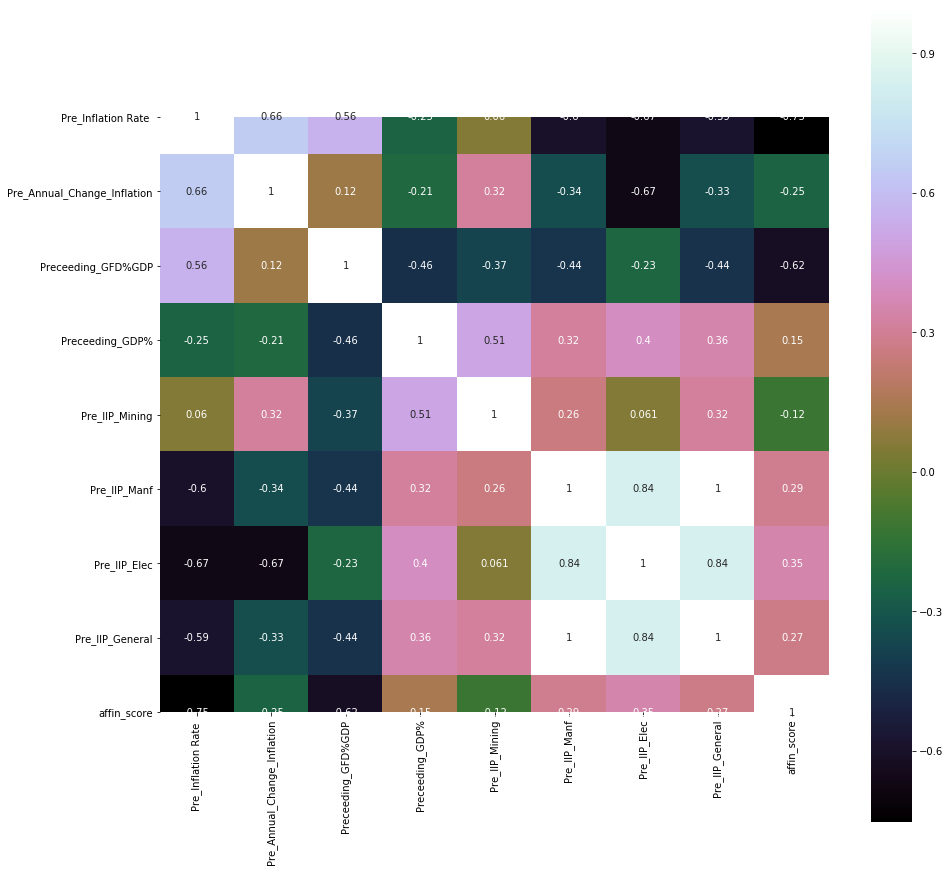

In [245]:
fig = plt.figure(figsize = (15,15))
corr_mat=df_pre.corr()
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

#### Observations: 
1. we see a strong negative correlation between sentiments (Afinn scores) and inflation (year preceding the budget release) -> **-075**
   and between sentiments (afinn scores) and Gross fiscal deficit (as a percentage of GDP or national income) -> **-0.61**
   
2. This means the budget sentiments were more negative when inflation & fiscal deficit levels were higher - which makes logical sense.

### Using correlation to see if the budget speech was able to influence economic situation in teh following year 
This is ofcourse not a causation study, but if there is a strong enough correlation, we will have reason to explore causality

In [284]:
df_post = pd.concat([speech_df, econ_data_after.iloc[:, 2:]], axis=1)

In [285]:
from afinn import Afinn
afinn = Afinn(emoticons=True)
affin_scores = []

for i in range ( speech_df.shape[0] ) :
    speechDate = speech_df.iloc[i,0]
    affin_scores.append(np.mean(Sentence_df[Sentence_df['SpeechDate'] == speechDate].affin_scores))


df_post['affin_score'] = affin_scores

In [286]:
df_post.corr()

Post_Inflation rate  \
Post_Inflation rate                      1.000000   
Post_Annual_Change_Inflation             0.083052   
Following_GDP%                           0.203580   
Following_GFD%GDP                        0.429544   
Post_IIP_Mining                         -0.201865   
Post_IIP_Manf                           -0.128897   
Post_IIP_Elec                            0.052939   
Post_IIP_General                        -0.115368   
affin_score                             -0.618829   

                              Post_Annual_Change_Inflation  Following_GDP%  \
Post_Inflation rate                               0.083052        0.203580   
Post_Annual_Change_Inflation                      1.000000       -0.295753   
Following_GDP%                                   -0.295753        1.000000   
Following_GFD%GDP                                -0.213990       -0.584339   
Post_IIP_Mining                                   0.182626        0.603902   
Post_IIP_Manf                                    -0.243605        0.316491   
Post_IIP_Elec                                    -0.695591        0.406965   
Post_IIP_General                                 -0.263673        0.361003   
affin_score                                       0.477285       -0.042558   

                              Following_GFD%GDP  Post_IIP_Mining  \
Post_Inflation rate                    0.429544        -0.201865   
Post_Annual_Change_Inflation          -0.213990         0.182626   
Following_GDP%                        -0.584339         0.603902   
Following_GFD%GDP                      1.000000        -0.854144   
Post_IIP_Mining                       -0.854144         1.000000   
Post_IIP_Manf                         -0.293537         0.298088   
Post_IIP_Elec                          0.042134        -0.047047   
Post_IIP_General                      -0.314884         0.334479   
affin_score                           -0.634090         0.678838   

                              Post_IIP_Manf  Post_IIP_Elec  Post_IIP_General  \
Post_Inflation rate               -0.128897       0.052939         -0.115368   
Post_Annual_Change_Inflation      -0.243605      -0.695591         -0.263673   
Following_GDP%                     0.316491       0.406965          0.361003   
Following_GFD%GDP                 -0.293537       0.042134         -0.314884   
Post_IIP_Mining                    0.298088      -0.047047          0.334479   
Post_IIP_Manf                      1.000000       0.737546          0.998175   
Post_IIP_Elec                      0.737546       1.000000          0.751949   
Post_IIP_General                   0.998175       0.751949          1.000000   
affin_score                        0.100975      -0.352830          0.105457   

                              affin_score  
Post_Inflation rate             -0.618829  
Post_Annual_Change_Inflation     0.477285  
Following_GDP%                  -0.042558  
Following_GFD%GDP               -0.634090  
Post_IIP_Mining                  0.678838  
Post_IIP_Manf                    0.100975  
Post_IIP_Elec                   -0.352830  
Post_IIP_General                 0.105457  
affin_score                      1.000000

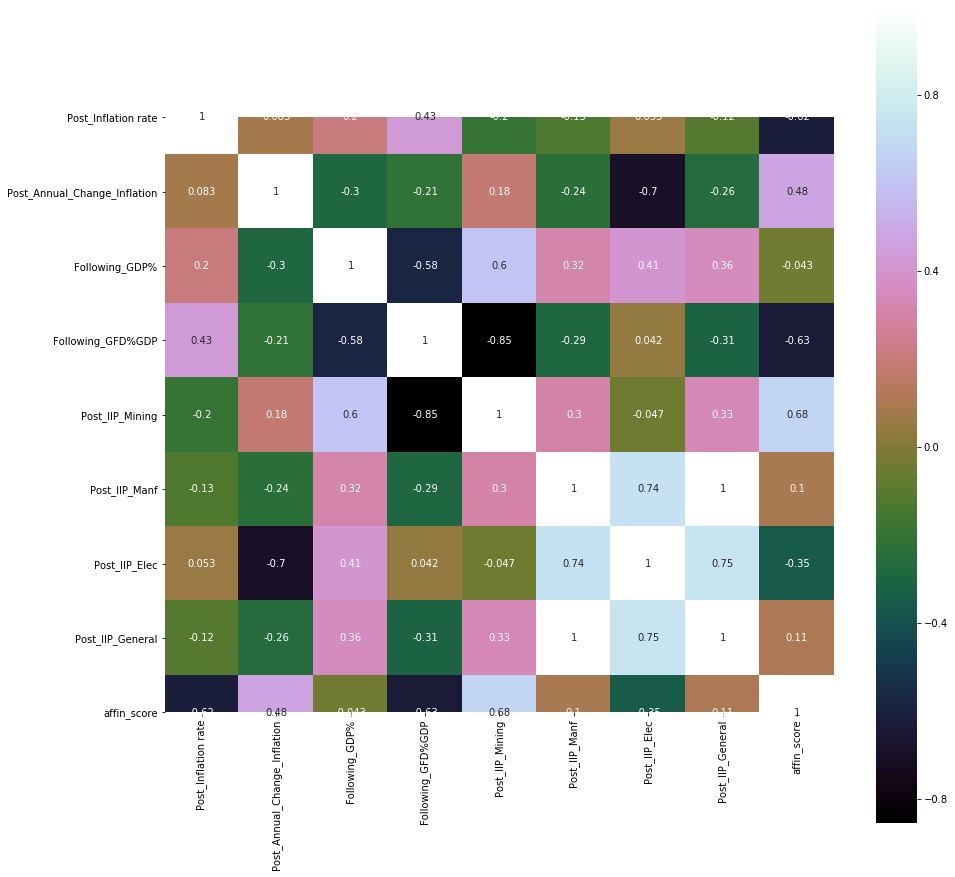

In [287]:
fig = plt.figure(figsize = (15,15))
corr_mat=df_post.corr()
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

#### Observations: 
1. we see a strong negative correlation between sentiments (Afinn scores) and inflation (year preceding the budget release) -> **-075**
   and between sentiments (afinn scores) and Gross fiscal deficit (as a percentage of GDP or national income) -> **-0.63**
   
2. This is the same as the what we had observed earlier and there can be a few possible reasons:
    - Correlation cannot check for direction of influence and over a small dataset (full budget speech) with only 11 observations, the effect of lag   (taking preceding and folloiwng values of economic variables) is not caputured.
    - Since sentiments are based on affin's base dictionary and scores pre-alloted, it becomes difficult to capture tonality of a subject specific text such as budgets and we may be missing out on some latent effects here.
    
3. Additionally, we also notice a strong positive correlation between budget sentiments and a IIP(mining) -> **0.68**

In the next sections we will try to tease out topic specifc effects on correlation with economic data.
    

# Afinn

In [459]:
afinn_wl_url = ('https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-111.txt')

In [460]:
afinn_wl_df = pd.read_csv(afinn_wl_url, header=None, sep='\t', names=['term', 'value'])
seed=808
afinn_wl_df.sample(100, random_state=seed)

term  value
1852         regret     -2
1285    indifferent     -2
681     disappoints     -2
770          doubts     -1
1644  outmaneuvered     -2
...             ...    ...
337         calming      2
2353      validated      1
592      dehumanize     -2
2168         suffer     -2
2387       vitality      3

[100 rows x 2 columns]

In [461]:
from afinn import Afinn
afinn = Afinn(emoticons=True)
afinn_score = []
for sentence in Sentence_df['lemmatized']:
    #afinn_score.Sentence.append(sentence)
    afinn_score.append(afinn.score(sentence))


In [462]:
afinn_score

[-1.0,
 0.0,
 0.0,
 -2.0,
 2.0,
 0.0,
 -3.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 7.0,
 2.0,
 7.0,
 1.0,
 4.0,
 1.0,
 -1.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 3.0,
 -2.0,
 3.0,
 2.0,
 2.0,
 5.0,
 2.0,
 0.0,
 2.0,
 3.0,
 2.0,
 4.0,
 2.0,
 3.0,
 3.0,
 0.0,
 -1.0,
 2.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 9.0,
 1.0,
 2.0,
 3.0,
 5.0,
 0.0,
 0.0,
 0.0,
 -4.0,
 -2.0,
 0.0,
 4.0,
 0.0,
 5.0,
 0.0,
 1.0,
 1.0,
 9.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 2.0,
 0.0,
 3.0,
 1.0,
 -1.0,
 1.0,
 0.0,
 2.0,
 0.0,
 1.0,
 3.0,
 0.0,
 2.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 4.0,
 2.0,
 -3.0,
 2.0,
 0.0,
 0.0,
 -3.0,
 1.0,
 3.0,
 3.0,
 0.0,
 2.0,
 0.0,
 3.0,
 0.0,
 5.0,
 4.0,
 0.0,
 2.0,
 2.0,
 1.0,
 2.0,
 3.0,
 7.0,
 4.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 3.0,
 2.0,
 -2.0,
 -2.0,
 1.0,
 2.0,
 3.0,
 0.0,
 -4.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 4.0,
 0.0,
 0.0,
 0.0,
 2.0,
 1.0,
 2.0,
 4.0,
 0.0,
 2.0,
 0.0,
 1.0,
 

# Finding Correlation between Economic Variables and Sentences with references to specific subjects


The object is to see if a a particular topic has a greater influence on the final correlations between sentiments and economic varibales - essentially when we see high correlation between inflation and sentiments, are there any specific terms in the sentences that are dominating the sentiment values 

### We choose five key topics (based on secondary research and Topic modeling results earlier) to tease out topic specific effects on the correlation values
We will use the economic data from the following year to see if they are influenced by sentiments on any particular topics


#### 1. separating sentences with references to "inflation"

In [251]:
sentc_inflation = Sentence_df[Sentence_df['lemmatized'].str.contains("inflation")]

In [288]:
econ_data_after.head()

SpeechDate            FinMin  Post_Inflation rate  \
0 2010-02-26  Pranab Mukherjee              11.9894   
1 2011-02-28  Pranab Mukherjee               8.8584   
2 2012-03-16  Pranab Mukherjee               9.3124   
3 2013-02-28    P. Chidambaram              10.9076   
4 2014-02-17    P. Chidambaram               6.3532   

   Post_Annual_Change_Inflation  Following_GDP%  Following_GFD%GDP  \
0                          1.11        8.497587           4.500427   
1                         -3.13        5.241313           5.906257   
2                          0.45        5.456388           5.320624   
3                          1.60        6.386108           5.130487   
4                         -4.55        7.410227           4.851262   

   Post_IIP_Mining  Post_IIP_Manf  Post_IIP_Elec  Post_IIP_General  
0              5.2            9.0            5.5               8.2  
1             -2.0            3.0            8.2               2.9  
2             -2.3            1.3            4.0               1.1  
3             -0.6           -0.8            6.1              -0.1  
4              1.5            2.3            8.4               2.8

In [289]:
econ_data_after.shape

(12, 10)

In [290]:
sentc_inflation.head(2)

SpeechDate   FinanceMinister  \
51 2010-02-26  Pranab Mukherjee   
52 2010-02-26  Pranab Mukherjee   

                                            Sentences  \
51  major concern during second half been emergenc...   
52  there momentum food prices since flare global ...   

                                         Cleaned_sent  \
51  major concern during second half been emergenc...   
52  there momentum food since flare global commodi...   

                                            tokenized  \
51  [major, concern, during, second, half, been, e...   
52  [there, momentum, food, since, flare, global, ...   

                               sent_without_stopwords  \
51  major concern second half emergence double dig...   
52  momentum food since flare global commodity fin...   

                                           lemmatized  \
51  major concern second half emergence double dig...   
52  momentum food since flare global commodity fin...   

                                                  pos  \
51  [(major, JJ), (concern, NN), (second, JJ), (ha...   
52  [(momentum, NN), (food, NN), (since, IN), (fla...   

                                        token_updated  affin_scores  
51  [major, concern, second, half, emergence, doub...           0.0  
52  [momentum, food, since, flare, global, commodi...          -1.0

In [291]:
sntc_econ_df = sentc_inflation.merge(econ_data_after,on='SpeechDate')

In [292]:
sntc_econ_df.head()

SpeechDate   FinanceMinister  \
0 2010-02-26  Pranab Mukherjee   
1 2010-02-26  Pranab Mukherjee   
2 2010-02-26  Pranab Mukherjee   
3 2010-02-26  Pranab Mukherjee   
4 2010-02-26  Pranab Mukherjee   

                                           Sentences  \
0  major concern during second half been emergenc...   
1  there momentum food prices since flare global ...   
2              this motion inflationary expectations   
3  inflation data january seems have confirmed th...   
4  government acutely conscious this situation mo...   

                                        Cleaned_sent  \
0  major concern during second half been emergenc...   
1  there momentum food since flare global commodi...   
2                           this motion inflationary   
3           inflation data have confirmed this trend   
4  government acutely conscious this situation mo...   

                                           tokenized  \
0  [major, concern, during, second, half, been, e...   
1  [there, momentum, food, since, flare, global, ...   
2                       [this, motion, inflationary]   
3    [inflation, data, have, confirmed, this, trend]   
4  [government, acutely, conscious, this, situati...   

                              sent_without_stopwords  \
0  major concern second half emergence double dig...   
1  momentum food since flare global commodity fin...   
2                                motion inflationary   
3                     inflation data confirmed trend   
4  government acutely conscious situation motion ...   

                                          lemmatized  \
0  major concern second half emergence double dig...   
1  momentum food since flare global commodity fin...   
2                                motion inflationary   
3                       inflation data confirm trend   
4  government acutely conscious situation motion ...   

                                                 pos  \
0  [(major, JJ), (concern, NN), (second, JJ), (ha...   
1  [(momentum, NN), (food, NN), (since, IN), (fla...   
2                 [(motion, NN), (inflationary, NN)]   
3  [(inflation, NN), (data, NNS), (confirm, VBP),...   
4  [(government, NN), (acutely, RB), (conscious, ...   

                                       token_updated  affin_scores  \
0  [major, concern, second, half, emergence, doub...           0.0   
1  [momentum, food, since, flare, global, commodi...          -1.0   
2                             [motion, inflationary]           0.0   
3                [inflation, data, confirmed, trend]           0.0   
4  [government, acutely, conscious, situation, mo...           1.0   

             FinMin  Post_Inflation rate  Post_Annual_Change_Inflation  \
0  Pranab Mukherjee              11.9894                          1.11   
1  Pranab Mukherjee              11.9894                          1.11   
2  Pranab Mukherjee              11.9894                          1.11   
3  Pranab Mukherjee              11.9894                          1.11   
4  Pranab Mukherjee              11.9894                          1.11   

   Following_GDP%  Following_GFD%GDP  Post_IIP_Mining  Post_IIP_Manf  \
0        8.497587           4.500427              5.2            9.0   
1        8.497587           4.500427              5.2            9.0   
2        8.497587           4.500427              5.2            9.0   
3        8.497587           4.500427              5.2            9.0   
4        8.497587           4.500427              5.2            9.0   

   Post_IIP_Elec  Post_IIP_General  
0            5.5               8.2  
1            5.5               8.2  
2            5.5               8.2  
3            5.5               8.2  
4            5.5               8.2

In [293]:
sntc_econ_df.corr()

affin_scores  Post_Inflation rate  \
affin_scores                      1.000000            -0.133583   
Post_Inflation rate              -0.133583             1.000000   
Post_Annual_Change_Inflation     -0.189028             0.224040   
Following_GDP%                    0.188146             0.096738   
Following_GFD%GDP                -0.116296             0.438359   
Post_IIP_Mining                   0.084889            -0.314057   
Post_IIP_Manf                     0.018624            -0.164172   
Post_IIP_Elec                     0.034738             0.084951   
Post_IIP_General                  0.026174            -0.156760   

                              Post_Annual_Change_Inflation  Following_GDP%  \
affin_scores                                     -0.189028        0.188146   
Post_Inflation rate                               0.224040        0.096738   
Post_Annual_Change_Inflation                      1.000000       -0.227421   
Following_GDP%                                   -0.227421        1.000000   
Following_GFD%GDP                                -0.180540       -0.650236   
Post_IIP_Mining                                   0.053861        0.685090   
Post_IIP_Manf                                    -0.290431        0.349198   
Post_IIP_Elec                                    -0.700917        0.384505   
Post_IIP_General                                 -0.317813        0.401365   

                              Following_GFD%GDP  Post_IIP_Mining  \
affin_scores                          -0.116296         0.084889   
Post_Inflation rate                    0.438359        -0.314057   
Post_Annual_Change_Inflation          -0.180540         0.053861   
Following_GDP%                        -0.650236         0.685090   
Following_GFD%GDP                      1.000000        -0.865360   
Post_IIP_Mining                       -0.865360         1.000000   
Post_IIP_Manf                         -0.281634         0.333718   
Post_IIP_Elec                          0.110348        -0.049082   
Post_IIP_General                      -0.306836         0.375796   

                              Post_IIP_Manf  Post_IIP_Elec  Post_IIP_General  
affin_scores                       0.018624       0.034738          0.026174  
Post_Inflation rate               -0.164172       0.084951         -0.156760  
Post_Annual_Change_Inflation      -0.290431      -0.700917         -0.317813  
Following_GDP%                     0.349198       0.384505          0.401365  
Following_GFD%GDP                 -0.281634       0.110348         -0.306836  
Post_IIP_Mining                    0.333718      -0.049082          0.375796  
Post_IIP_Manf                      1.000000       0.668661          0.997564  
Post_IIP_Elec                      0.668661       1.000000          0.687906  
Post_IIP_General                   0.997564       0.687906          1.000000

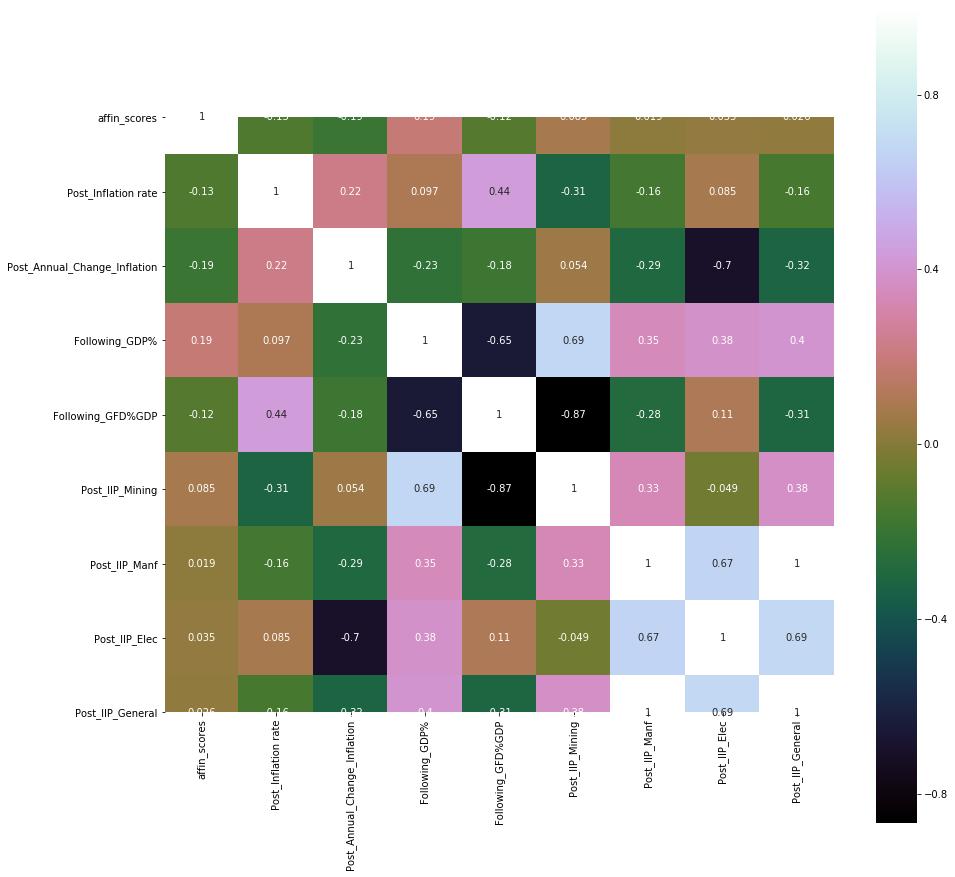

In [294]:
fig = plt.figure(figsize = (15,15))
corr_mat=sntc_econ_df.corr()
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

#### 2.  Separating sentences with references to "fuel"

In [295]:
sentc_fuel = Sentence_df[Sentence_df['lemmatized'].str.contains("diesel|petrol")]

In [296]:
sentc_fuel.head(2)

SpeechDate   FinanceMinister  \
90 2010-02-26  Pranab Mukherjee   
92 2010-02-26  Pranab Mukherjee   

                                            Sentences  \
90  petroleum diesel pricing policy last budget co...   
92  decision these recommendations will taken coll...   

                                         Cleaned_sent  \
90  petroleum diesel policy last budget constituti...   
92  decision these will taken colleague minister p...   

                                            tokenized  \
90  [petroleum, diesel, policy, last, budget, cons...   
92  [decision, these, will, taken, colleague, mini...   

                               sent_without_stopwords  \
90  petroleum diesel policy last constitution expe...   
92  decision taken colleague minister petroleum na...   

                                           lemmatized  \
90  petroleum diesel policy last constitution expe...   
92  decision take colleague minister petroleum nat...   

                                                  pos  \
90  [(petroleum, NN), (diesel, NN), (policy, NN), ...   
92  [(decision, NN), (take, VB), (colleague, NN), ...   

                                        token_updated  affin_scores  
90  [petroleum, diesel, policy, last, constitution...           2.0  
92  [decision, taken, colleague, minister, petrole...           1.0

In [297]:
sntc_fuel_econ_df = sentc_fuel.merge(econ_data_after,on='SpeechDate')

In [298]:
sntc_fuel_econ_df.head()

SpeechDate   FinanceMinister  \
0 2010-02-26  Pranab Mukherjee   
1 2010-02-26  Pranab Mukherjee   
2 2010-02-26  Pranab Mukherjee   
3 2010-02-26  Pranab Mukherjee   
4 2010-02-26  Pranab Mukherjee   

                                           Sentences  \
0  petroleum diesel pricing policy last budget co...   
1  decision these recommendations will taken coll...   
2  therefore propose partially roll back rate red...   
3  wake spiralling petroleum prices government pr...   
4  view pressing need move back fiscal consolidat...   

                                        Cleaned_sent  \
0  petroleum diesel policy last budget constituti...   
1  decision these will taken colleague minister p...   
2  therefore propose partially roll back rate red...   
3  wake petroleum government provided full exempt...   
4  view pressing need move back fiscal consolidat...   

                                           tokenized  \
0  [petroleum, diesel, policy, last, budget, cons...   
1  [decision, these, will, taken, colleague, mini...   
2  [therefore, propose, partially, roll, back, ra...   
3  [wake, petroleum, government, provided, full, ...   
4  [view, pressing, need, move, back, fiscal, con...   

                              sent_without_stopwords  \
0  petroleum diesel policy last constitution expe...   
1  decision taken colleague minister petroleum na...   
2  therefore partially roll back reduction centra...   
3  wake petroleum government provided full exempt...   
4  view pressing need move back fiscal consolidat...   

                                          lemmatized  \
0  petroleum diesel policy last constitution expe...   
1  decision take colleague minister petroleum nat...   
2  therefore partially roll back reduction centra...   
3  wake petroleum government provide full exempti...   
4  view press need move back fiscal consolidation...   

                                                 pos  \
0  [(petroleum, NN), (diesel, NN), (policy, NN), ...   
1  [(decision, NN), (take, VB), (colleague, NN), ...   
2  [(therefore, RB), (propose, JJ), (partially, R...   
3  [(wake, NN), (petroleum, NN), (government, NN)...   
4  [(view, NN), (press, NN), (need, VBP), (move, ...   

                                       token_updated  affin_scores  \
0  [petroleum, diesel, policy, last, constitution...           2.0   
1  [decision, taken, colleague, minister, petrole...           1.0   
2  [therefore, partially, roll, back, reduction, ...           0.0   
3  [wake, petroleum, government, provided, full, ...          -1.0   
4  [view, pressing, need, move, back, fiscal, con...           1.0   

             FinMin  Post_Inflation rate  Post_Annual_Change_Inflation  \
0  Pranab Mukherjee              11.9894                          1.11   
1  Pranab Mukherjee              11.9894                          1.11   
2  Pranab Mukherjee              11.9894                          1.11   
3  Pranab Mukherjee              11.9894                          1.11   
4  Pranab Mukherjee              11.9894                          1.11   

   Following_GDP%  Following_GFD%GDP  Post_IIP_Mining  Post_IIP_Manf  \
0        8.497587           4.500427              5.2            9.0   
1        8.497587           4.500427              5.2            9.0   
2        8.497587           4.500427              5.2            9.0   
3        8.497587           4.500427              5.2            9.0   
4        8.497587           4.500427              5.2            9.0   

   Post_IIP_Elec  Post_IIP_General  
0            5.5               8.2  
1            5.5               8.2  
2            5.5               8.2  
3            5.5               8.2  
4            5.5               8.2

In [299]:
sntc_fuel_econ_df.corr()

affin_scores  Post_Inflation rate  \
affin_scores                      1.000000            -0.200810   
Post_Inflation rate              -0.200810             1.000000   
Post_Annual_Change_Inflation      0.214680             0.048868   
Following_GDP%                   -0.179999             0.482874   
Following_GFD%GDP                -0.132968             0.118961   
Post_IIP_Mining                   0.078727             0.235881   
Post_IIP_Manf                    -0.124336             0.236019   
Post_IIP_Elec                    -0.158225             0.138113   
Post_IIP_General                 -0.122869             0.257988   

                              Post_Annual_Change_Inflation  Following_GDP%  \
affin_scores                                      0.214680       -0.179999   
Post_Inflation rate                               0.048868        0.482874   
Post_Annual_Change_Inflation                      1.000000       -0.434621   
Following_GDP%                                   -0.434621        1.000000   
Following_GFD%GDP                                -0.015525       -0.579893   
Post_IIP_Mining                                   0.177276        0.553928   
Post_IIP_Manf                                    -0.215009        0.371671   
Post_IIP_Elec                                    -0.656361        0.567541   
Post_IIP_General                                 -0.227302        0.419949   

                              Following_GFD%GDP  Post_IIP_Mining  \
affin_scores                          -0.132968         0.078727   
Post_Inflation rate                    0.118961         0.235881   
Post_Annual_Change_Inflation          -0.015525         0.177276   
Following_GDP%                        -0.579893         0.553928   
Following_GFD%GDP                      1.000000        -0.813642   
Post_IIP_Mining                       -0.813642         1.000000   
Post_IIP_Manf                         -0.344335         0.361322   
Post_IIP_Elec                         -0.283937         0.154842   
Post_IIP_General                      -0.381746         0.408702   

                              Post_IIP_Manf  Post_IIP_Elec  Post_IIP_General  
affin_scores                      -0.124336      -0.158225         -0.122869  
Post_Inflation rate                0.236019       0.138113          0.257988  
Post_Annual_Change_Inflation      -0.215009      -0.656361         -0.227302  
Following_GDP%                     0.371671       0.567541          0.419949  
Following_GFD%GDP                 -0.344335      -0.283937         -0.381746  
Post_IIP_Mining                    0.361322       0.154842          0.408702  
Post_IIP_Manf                      1.000000       0.796659          0.997794  
Post_IIP_Elec                      0.796659       1.000000          0.809726  
Post_IIP_General                   0.997794       0.809726          1.000000

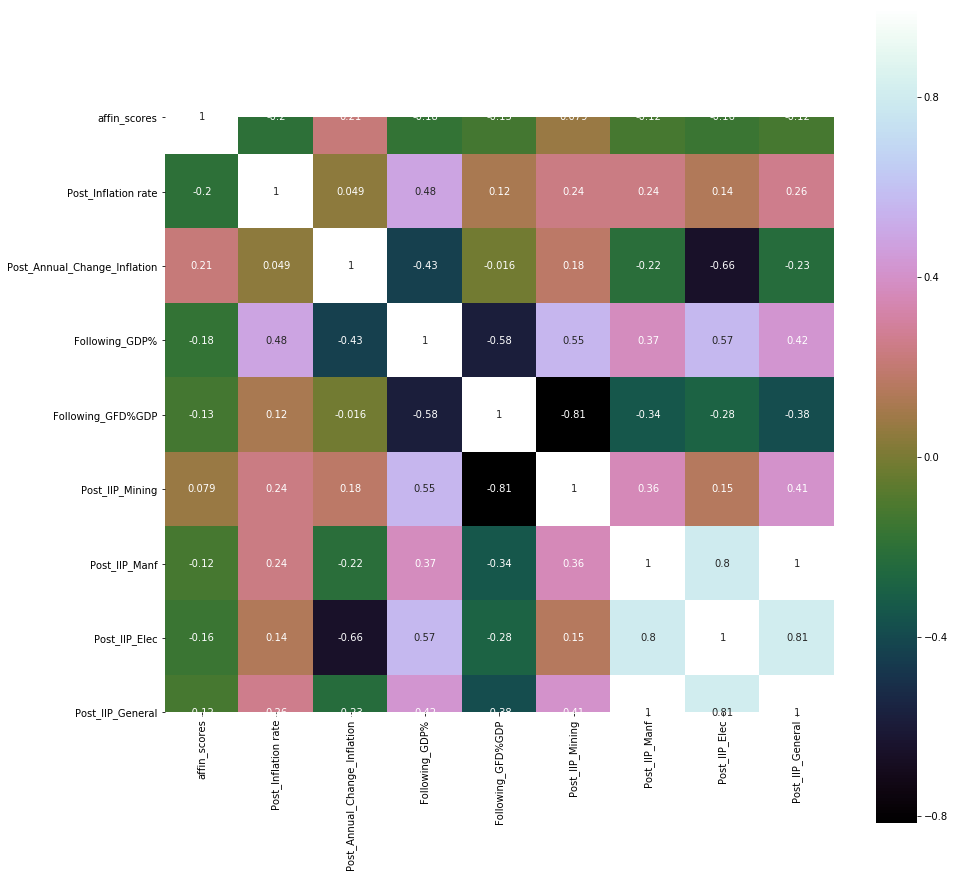

In [300]:
fig = plt.figure(figsize = (15,15))
corr_mat=sntc_fuel_econ_df.corr()
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

#### 3. separating sentences with food/agriculture references

In [301]:
sentc_agri = Sentence_df[Sentence_df['lemmatized'].str.contains("food|agriculture|vegetable|farmer")]

In [302]:
sentc_agri.head(2)

SpeechDate   FinanceMinister  \
8  2010-02-26  Pranab Mukherjee   
18 2010-02-26  Pranab Mukherjee   

                                            Sentences  \
8   there were concerns about production prices fo...   
18  have strengthen food security improve educatio...   

                                         Cleaned_sent  \
8   there were about production food possible grow...   
18  have strengthen food security improve educatio...   

                                            tokenized  \
8   [there, were, about, production, food, possibl...   
18  [have, strengthen, food, security, improve, ed...   

                               sent_without_stopwords  \
8        production food possible growth rural demand   
18  strengthen food security improve education hea...   

                                           lemmatized  \
8        production food possible growth rural demand   
18  strengthen food security improve education hea...   

                                                  pos  \
8   [(production, NN), (food, NN), (possible, JJ),...   
18  [(strengthen, NN), (food, NN), (security, NN),...   

                                        token_updated  affin_scores  
8   [production, food, possible, growth, rural, de...           1.0  
18  [strengthen, food, security, improve, educatio...           4.0

In [303]:
sntc_agri_econ_df = sentc_agri.merge(econ_data_after,on='SpeechDate')

In [304]:
sntc_agri_econ_df.corr()

affin_scores  Post_Inflation rate  \
affin_scores                      1.000000            -0.124767   
Post_Inflation rate              -0.124767             1.000000   
Post_Annual_Change_Inflation      0.154995            -0.022496   
Following_GDP%                   -0.042977             0.135570   
Following_GFD%GDP                -0.086883             0.436178   
Post_IIP_Mining                   0.080344            -0.245977   
Post_IIP_Manf                     0.012236             0.111618   
Post_IIP_Elec                    -0.086345             0.171209   
Post_IIP_General                  0.010979             0.109574   

                              Post_Annual_Change_Inflation  Following_GDP%  \
affin_scores                                      0.154995       -0.042977   
Post_Inflation rate                              -0.022496        0.135570   
Post_Annual_Change_Inflation                      1.000000       -0.208539   
Following_GDP%                                   -0.208539        1.000000   
Following_GFD%GDP                                -0.361977       -0.637247   
Post_IIP_Mining                                   0.275995        0.666749   
Post_IIP_Manf                                    -0.076948        0.340304   
Post_IIP_Elec                                    -0.725603        0.317175   
Post_IIP_General                                 -0.102309        0.400018   

                              Following_GFD%GDP  Post_IIP_Mining  \
affin_scores                          -0.086883         0.080344   
Post_Inflation rate                    0.436178        -0.245977   
Post_Annual_Change_Inflation          -0.361977         0.275995   
Following_GDP%                        -0.637247         0.666749   
Following_GFD%GDP                      1.000000        -0.871879   
Post_IIP_Mining                       -0.871879         1.000000   
Post_IIP_Manf                         -0.208453         0.353788   
Post_IIP_Elec                          0.223643        -0.093276   
Post_IIP_General                      -0.246470         0.409611   

                              Post_IIP_Manf  Post_IIP_Elec  Post_IIP_General  
affin_scores                       0.012236      -0.086345          0.010979  
Post_Inflation rate                0.111618       0.171209          0.109574  
Post_Annual_Change_Inflation      -0.076948      -0.725603         -0.102309  
Following_GDP%                     0.340304       0.317175          0.400018  
Following_GFD%GDP                 -0.208453       0.223643         -0.246470  
Post_IIP_Mining                    0.353788      -0.093276          0.409611  
Post_IIP_Manf                      1.000000       0.578029          0.996162  
Post_IIP_Elec                      0.578029       1.000000          0.600549  
Post_IIP_General                   0.996162       0.600549          1.000000

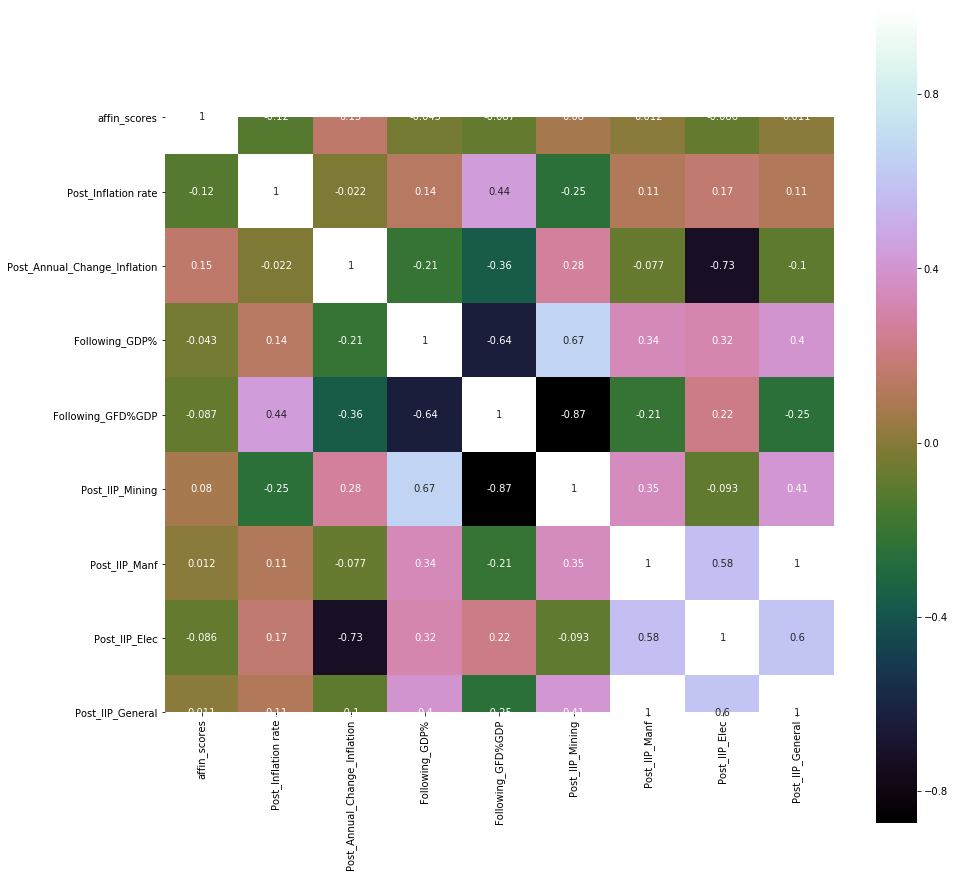

In [305]:
fig = plt.figure(figsize = (15,15))
corr_mat=sntc_agri_econ_df.corr()
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

#### 4. separating sentences with references to exchange rate/ exports

In [306]:
sentc_exim = Sentence_df[Sentence_df['lemmatized'].str.contains("dollar|exchange rate|import|export")]

In [308]:
sentc_exim.head(2)

SpeechDate   FinanceMinister  \
16 2010-02-26  Pranab Mukherjee   
45 2010-02-26  Pranab Mukherjee   

                                            Sentences  \
16  growth only important what enables therefore s...   
45  more importantly result renewed momentum manuf...   

                                         Cleaned_sent  \
16  growth only important what therefore second ch...   
45  more importantly result momentum sector rise t...   

                                            tokenized  \
16  [growth, only, important, what, therefore, sec...   
45  [more, importantly, result, momentum, sector, ...   

                               sent_without_stopwords  \
16  growth important therefore second challenge ha...   
45  importantly result momentum sector rise sector...   

                                           lemmatized  \
16  growth important therefore second challenge ha...   
45  importantly result momentum sector rise sector...   

                                                  pos  \
16  [(growth, NN), (important, JJ), (therefore, IN...   
45  [(importantly, RB), (result, VBZ), (momentum, ...   

                                        token_updated  affin_scores  
16  [growth, important, therefore, second, challen...           7.0  
45  [importantly, result, momentum, sector, rise, ...           3.0

In [309]:
sntc_exim_econ_df = sentc_exim.merge(econ_data_after,on='SpeechDate')

In [310]:
sntc_exim_econ_df.corr()

affin_scores  Post_Inflation rate  \
affin_scores                      1.000000            -0.186420   
Post_Inflation rate              -0.186420             1.000000   
Post_Annual_Change_Inflation      0.026780             0.067721   
Following_GDP%                    0.013915             0.217496   
Following_GFD%GDP                -0.121250             0.367835   
Post_IIP_Mining                   0.077850            -0.079972   
Post_IIP_Manf                     0.074800            -0.021038   
Post_IIP_Elec                     0.055183             0.073547   
Post_IIP_General                  0.075917            -0.003487   

                              Post_Annual_Change_Inflation  Following_GDP%  \
affin_scores                                      0.026780        0.013915   
Post_Inflation rate                               0.067721        0.217496   
Post_Annual_Change_Inflation                      1.000000       -0.143145   
Following_GDP%                                   -0.143145        1.000000   
Following_GFD%GDP                                -0.317290       -0.659939   
Post_IIP_Mining                                   0.300298        0.687012   
Post_IIP_Manf                                    -0.214434        0.333778   
Post_IIP_Elec                                    -0.723916        0.309119   
Post_IIP_General                                 -0.228344        0.378124   

                              Following_GFD%GDP  Post_IIP_Mining  \
affin_scores                          -0.121250         0.077850   
Post_Inflation rate                    0.367835        -0.079972   
Post_Annual_Change_Inflation          -0.317290         0.300298   
Following_GDP%                        -0.659939         0.687012   
Following_GFD%GDP                      1.000000        -0.851792   
Post_IIP_Mining                       -0.851792         1.000000   
Post_IIP_Manf                         -0.253164         0.305180   
Post_IIP_Elec                          0.121606        -0.095509   
Post_IIP_General                      -0.275104         0.343013   

                              Post_IIP_Manf  Post_IIP_Elec  Post_IIP_General  
affin_scores                       0.074800       0.055183          0.075917  
Post_Inflation rate               -0.021038       0.073547         -0.003487  
Post_Annual_Change_Inflation      -0.214434      -0.723916         -0.228344  
Following_GDP%                     0.333778       0.309119          0.378124  
Following_GFD%GDP                 -0.253164       0.121606         -0.275104  
Post_IIP_Mining                    0.305180      -0.095509          0.343013  
Post_IIP_Manf                      1.000000       0.735920          0.998170  
Post_IIP_Elec                      0.735920       1.000000          0.745107  
Post_IIP_General                   0.998170       0.745107          1.000000

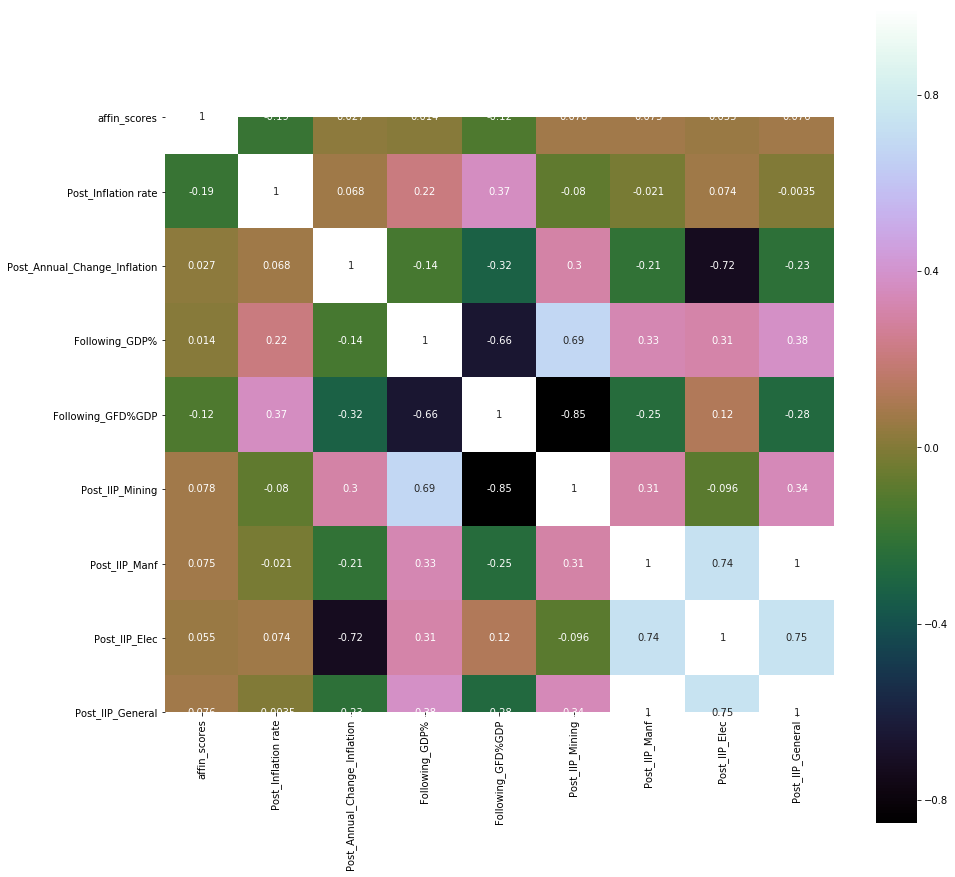

In [311]:
fig = plt.figure(figsize = (15,15))
corr_mat=sntc_exim_econ_df.corr()
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

#### 5. separating sentences with references to manufacturing/industry

In [312]:
sentc_manf = Sentence_df[Sentence_df['lemmatized'].str.contains("manufactur|industry|industrial|motor|automobile")]

In [313]:
sentc_manf.head(2)

SpeechDate   FinanceMinister  \
85  2010-02-26  Pranab Mukherjee   
160 2010-02-26  Pranab Mukherjee   

                                             Sentences  \
85   fertiliser subsidy announced intent government...   
160  complement dedicated freight corridor delhi mu...   

                                          Cleaned_sent  \
85   subsidy intent government sector budget speech...   
160  complement freight corridor industrial corrido...   

                                             tokenized  \
85   [subsidy, intent, government, sector, budget, ...   
160  [complement, freight, corridor, industrial, co...   

                                sent_without_stopwords  \
85   subsidy intent government sector speech nutrie...   
160  complement freight corridor industrial corrido...   

                                            lemmatized  \
85   subsidy intent government sector speech nutrie...   
160  complement freight corridor industrial corrido...   

                                                   pos  \
85   [(subsidy, NN), (intent, JJ), (government, NN)...   
160  [(complement, NN), (freight, NN), (corridor, N...   

                                         token_updated  affin_scores  
85   [subsidy, intent, government, sector, speech, ...           3.0  
160  [complement, freight, corridor, industrial, co...           0.0

In [314]:
sntc_manf_econ_df = sentc_manf.merge(econ_data_after,on='SpeechDate')

In [315]:
sntc_manf_econ_df.corr()

affin_scores  Post_Inflation rate  \
affin_scores                      1.000000            -0.175665   
Post_Inflation rate              -0.175665             1.000000   
Post_Annual_Change_Inflation      0.050070             0.110503   
Following_GDP%                   -0.004761            -0.004255   
Following_GFD%GDP                -0.141887             0.510296   
Post_IIP_Mining                   0.118967            -0.345978   
Post_IIP_Manf                     0.165773            -0.048351   
Post_IIP_Elec                     0.073041             0.139432   
Post_IIP_General                  0.164843            -0.044902   

                              Post_Annual_Change_Inflation  Following_GDP%  \
affin_scores                                      0.050070       -0.004761   
Post_Inflation rate                               0.110503       -0.004255   
Post_Annual_Change_Inflation                      1.000000       -0.274950   
Following_GDP%                                   -0.274950        1.000000   
Following_GFD%GDP                                -0.147987       -0.687006   
Post_IIP_Mining                                   0.087075        0.652770   
Post_IIP_Manf                                    -0.239078        0.190950   
Post_IIP_Elec                                    -0.703552        0.311744   
Post_IIP_General                                 -0.268117        0.244239   

                              Following_GFD%GDP  Post_IIP_Mining  \
affin_scores                          -0.141887         0.118967   
Post_Inflation rate                    0.510296        -0.345978   
Post_Annual_Change_Inflation          -0.147987         0.087075   
Following_GDP%                        -0.687006         0.652770   
Following_GFD%GDP                      1.000000        -0.851913   
Post_IIP_Mining                       -0.851913         1.000000   
Post_IIP_Manf                         -0.143990         0.241962   
Post_IIP_Elec                          0.129077        -0.056409   
Post_IIP_General                      -0.174076         0.288178   

                              Post_IIP_Manf  Post_IIP_Elec  Post_IIP_General  
affin_scores                       0.165773       0.073041          0.164843  
Post_Inflation rate               -0.048351       0.139432         -0.044902  
Post_Annual_Change_Inflation      -0.239078      -0.703552         -0.268117  
Following_GDP%                     0.190950       0.311744          0.244239  
Following_GFD%GDP                 -0.143990       0.129077         -0.174076  
Post_IIP_Mining                    0.241962      -0.056409          0.288178  
Post_IIP_Manf                      1.000000       0.698879          0.997417  
Post_IIP_Elec                      0.698879       1.000000          0.719447  
Post_IIP_General                   0.997417       0.719447          1.000000

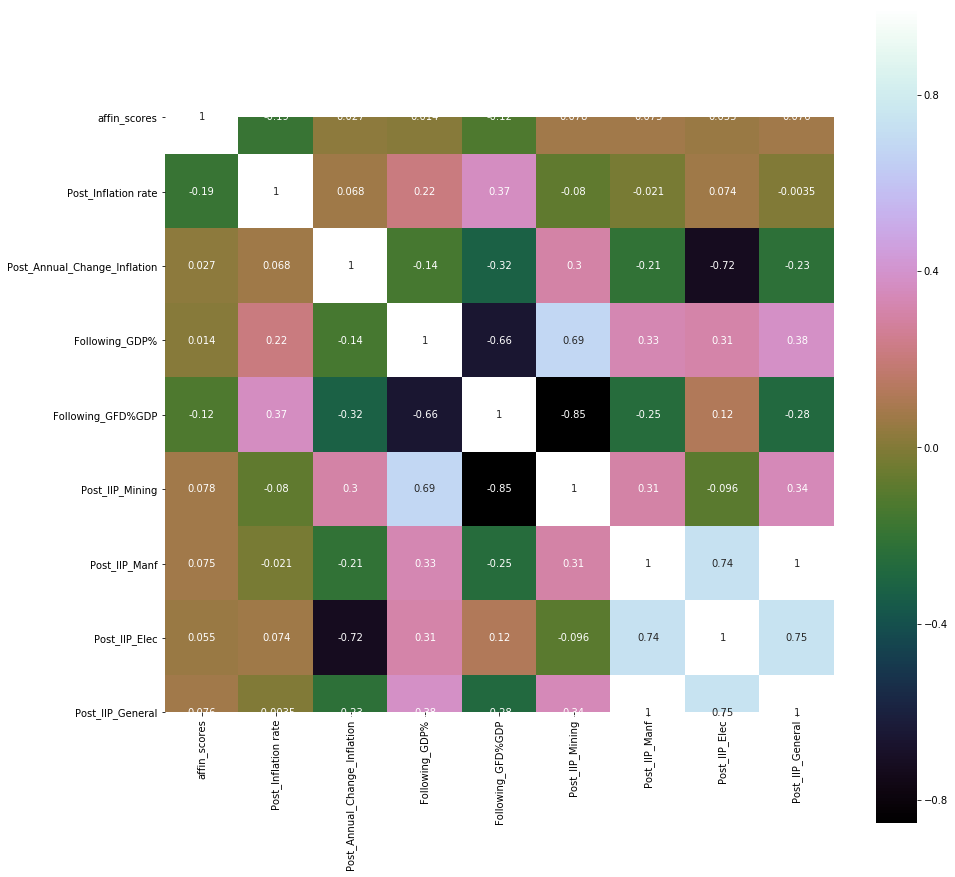

In [316]:
fig = plt.figure(figsize = (15,15))
corr_mat=sntc_exim_econ_df.corr()
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

# Text Classification
Taking Sentiment Scores as Target Variables
Key Objective is to be able to predict the tonality of a new budget speech given learnings on subject specific imporvements in sentiments analysis models

We will train a total of 10 models including Logistic Regression, Decision Trees, Ensemble models, SVM and Neural Networks, and test accuracy on the new budget speech for 2020.

### Creating Labels to Train the Speech Model

In [498]:
Sentence_df['affin_scores']

0      -1.0
1       0.0
2       0.0
3      -2.0
4       2.0
       ... 
6803    0.0
6804    0.0
6805    0.0
6806    1.0
6807    0.0
Name: affin_scores, Length: 6808, dtype: float64

In [499]:
train_df = Sentence_df

In [500]:
train_df.head()

SpeechDate   FinanceMinister  \
0 2010-02-26  Pranab Mukherjee   
1 2010-02-26  Pranab Mukherjee   
2 2010-02-26  Pranab Mukherjee   
3 2010-02-26  Pranab Mukherjee   
4 2010-02-26  Pranab Mukherjee   

                                           Sentences  \
0  rise present union budget when presented inter...   
1  growth started decelerating business sentiment...   
2  economy capacity sustain high growth under ser...   
3  clear also policy makers many other countries ...   
4   what would impact growth momentum indian economy   

                                        Cleaned_sent  \
0  rise present union budget when interim budget ...   
1                     growth business sentiment weak   
2  economy capacity sustain high growth under ser...   
3  clear also policy many other this crisis would...   
4          what would impact growth momentum economy   

                                           tokenized  \
0  [rise, present, union, budget, when, interim, ...   
1                [growth, business, sentiment, weak]   
2  [economy, capacity, sustain, high, growth, und...   
3  [clear, also, policy, many, other, this, crisi...   
4   [what, would, impact, growth, momentum, economy]   

                              sent_without_stopwords  \
0  rise present union interim regular august hous...   
1                     growth business sentiment weak   
2  capacity sustain high growth serious threat wi...   
3         clear policy many crisis eventually unfold   
4                             impact growth momentum   

                                          lemmatized  \
0  rise present union interim regular august hous...   
1                     growth business sentiment weak   
2  capacity sustain high growth serious threat wi...   
3         clear policy many crisis eventually unfold   
4                             impact growth momentum   

                                                 pos  affin_scores  
0  [(rise, NN), (present, JJ), (union, NN), (budg...          -1.0  
1  [(growth, NN), (business, NN), (sentiment, NN)...           0.0  
2  [(economy, NN), (capacity, NN), (sustain, VBP)...           0.0  
3  [(clear, JJ), (also, RB), (policy, NN), (many,...          -2.0  
4  [(would, MD), (impact, VB), (growth, NN), (mom...           2.0

In [501]:
train_df=train_df.drop(['SpeechDate', 'FinanceMinister', 'Sentences','Cleaned_sent', 'tokenized', 'sent_without_stopwords', 'pos'], axis = 1)

# Converting Positive, Negative, Neutral Words to respective Labels

In [502]:
sentiment_category = [1 if score > 0 
                          else 2 if score < 0 
                              else 0 
                                  for score in train_df['affin_scores']]

In [503]:
sentiment_category

[2,
 0,
 0,
 2,
 1,
 0,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,


In [504]:
train_df['Sentiment_category'] = pd.DataFrame(sentiment_category)
#train_df['Sentiment_category'] = sentiment_category


In [505]:
train_df

lemmatized  affin_scores  \
0     rise present union interim regular august hous...          -1.0   
1                        growth business sentiment weak           0.0   
2     capacity sustain high growth serious threat wi...           0.0   
3            clear policy many crisis eventually unfold          -2.0   
4                                impact growth momentum           2.0   
...                                                 ...           ...   
6803          fumigation warehouse agricultural produce           0.0   
6804                               minor forest produce           0.0   
6805  provide resident welfare contribution amount m...           0.0   
6806  home central government state government entit...           1.0   
6807  rehabilitation therapy rehabilitation rehabili...           0.0   

      Sentiment_category  
0                      2  
1                      0  
2                      0  
3                      2  
4                      1  
...                  ...  
6803                   0  
6804                   0  
6805                   0  
6806                   1  
6807                   0  

[6808 rows x 3 columns]

# Creating Labels to Test the Speech Models

In [506]:
test_df1 = test_sent_df

In [507]:
test_df1=test_df1.drop(['SpeechDate', 'FinanceMinister', 'Sentences','Cleaned_sent', 'tokenized', 'sent_without_stopwords', 'pos'], axis = 1)

In [508]:
sentiment_category = [1 if score > 0 
                          else 2 if score < 0 
                              else 0 
                                  for score in test_df1['affin_scores']]

In [509]:
test_df1['Sentiment_category'] = pd.DataFrame(sentiment_category)

In [510]:
test_df1

lemmatized  affin_scores  \
0    rise present introduction prime minister recei...           1.0   
1    leadership commit serve people humility dedica...           4.0   
2    people unequivocally give political stability ...           1.0   
3                                  boost enhance power           1.0   
4    high growth achieve youth gainfully meaningful...           2.0   
..                                                 ...           ...   
591  retrospective give effect council retrospectiv...           3.0   
592        concessional central union territory pulley           0.0   
593  refund credit compensation ce tobacco invert d...           0.0   
594  accordingly refund account invert duty structu...           0.0   
595                    explanatory memorandum relevant           0.0   

     Sentiment_category  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
..                  ...  
591                   1  
592                   0  
593                   0  
594                   0  
595                   0  

[596 rows x 3 columns]

# Text Classification

# Naive Bayes - CountVectorizer

In [511]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [512]:
cv = CountVectorizer()

In [513]:
train_counts= cv.fit_transform(train_df['lemmatized'])
test_counts= cv.transform(test_df1['lemmatized'])


In [514]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_counts, train_df['Sentiment_category'], test_size=0.2, random_state=45)

In [515]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
NB_accuracy=accuracy_score(y_test, predicted)
print("MultinomialNB Validation Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Validation Accuracy: 0.7540381791483113


In [516]:
predicted2= clf.predict(test_counts)

In [517]:
Naive_accuracy=accuracy_score(test_df1.Sentiment_category, predicted2)
print("MultinomialNB Test Accuracy:",metrics.accuracy_score(test_df1.Sentiment_category, predicted2))

MultinomialNB Test Accuracy: 0.7651006711409396


In [518]:
print(metrics.classification_report(test_df1.Sentiment_category, predicted2))

              precision    recall  f1-score   support

           0       0.82      0.70      0.75       277
           1       0.74      0.92      0.82       273
           2       0.52      0.24      0.33        46

    accuracy                           0.77       596
   macro avg       0.69      0.62      0.63       596
weighted avg       0.76      0.77      0.75       596



# Single Layered Neural Network

In [519]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
train_tf= tf.fit_transform(train_df['lemmatized'])
test_tf= tf.transform(test_df1['lemmatized'])

In [520]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_tf, train_df['Sentiment_category'], test_size=0.2, random_state=45)

In [521]:
import tensorflow
from keras.models import Sequential
from keras import layers
from keras.layers import Activation, Dense

In [522]:
input_dim = X_train.shape[1]

In [523]:
model = Sequential()
model.add(Dense(input_dim=input_dim, activation="relu", kernel_initializer="uniform", units=15))
model.add(Dense(activation = 'sigmoid', kernel_initializer = "uniform", units = 1))

In [524]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [525]:
model.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
5446/5446 [==============================] - ETA: 1:33 - loss: 0.6930 - accuracy: 0.60 - ETA: 3s - loss: 0.6908 - accuracy: 0.4433 - ETA: 2s - loss: 0.6878 - accuracy: 0.45 - ETA: 1s - loss: 0.6837 - accuracy: 0.44 - ETA: 1s - loss: 0.6798 - accuracy: 0.43 - ETA: 1s - loss: 0.6772 - accuracy: 0.43 - ETA: 0s - loss: 0.6737 - accuracy: 0.43 - ETA: 0s - loss: 0.6716 - accuracy: 0.43 - ETA: 0s - loss: 0.6662 - accuracy: 0.43 - ETA: 0s - loss: 0.6624 - accuracy: 0.43 - ETA: 0s - loss: 0.6590 - accuracy: 0.43 - ETA: 0s - loss: 0.6565 - accuracy: 0.43 - ETA: 0s - loss: 0.6519 - accuracy: 0.43 - ETA: 0s - loss: 0.6480 - accuracy: 0.43 - ETA: 0s - loss: 0.6449 - accuracy: 0.43 - ETA: 0s - loss: 0.6416 - accuracy: 0.43 - 1s 184us/step - loss: 0.6378 - accuracy: 0.4343
Epoch 2/100
5446/5446 [==============================] - ETA: 1s - loss: 0.2345 - accuracy: 0.40 - ETA: 0s - loss: 0.4968 - accuracy: 0.46 - ETA: 0s - loss: 0.5281 - accuracy: 0.45 - ETA: 0s - loss: 0.5283 - accuracy: 0

In [526]:
ynew = model.predict_classes(X_test)

In [527]:
ynew

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [528]:
NN_Val_accuracy=accuracy_score(y_test, ynew)
print("Neural Network Validation set Accuracy:",metrics.accuracy_score(y_test, ynew))

Neural Network Validation set Accuracy: 0.5925110132158591


In [529]:
ynew1 = model.predict_classes(test_tf)

In [530]:
NN_accuracy=accuracy_score(test_df1.Sentiment_category, ynew1)
print("Neural Network Test Accuracy:",metrics.accuracy_score(test_df1.Sentiment_category, ynew1))

Neural Network Test Accuracy: 0.6124161073825504


In [531]:
print(metrics.classification_report(test_df1.Sentiment_category, ynew1))

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.75      0.48      0.58       277
           1       0.55      0.85      0.67       273
           2       0.00      0.00      0.00        46

    accuracy                           0.61       596
   macro avg       0.43      0.44      0.42       596
weighted avg       0.60      0.61      0.58       596



# Rocchio Classification

In [532]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [533]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tf=TfidfVectorizer()
#text_tf= tf.fit_transform(train_df['lemmatized'])

In [534]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_tf, train_df['Sentiment_category'], test_size=0.2, random_state=45)

In [535]:
clf = NearestCentroid().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Rocchio Classification Validation Accuracy:",metrics.accuracy_score(y_test, predicted))

Rocchio Classification Validation Accuracy: 0.7437591776798825


In [536]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       600
           1       0.85      0.68      0.76       618
           2       0.64      0.49      0.55       144

    accuracy                           0.74      1362
   macro avg       0.73      0.68      0.69      1362
weighted avg       0.76      0.74      0.74      1362



In [537]:
predicted2= clf.predict(test_tf)
Rocchio_accuracy=accuracy_score(test_df1.Sentiment_category, predicted2)
print("Rocchio Classification Test Accuracy:",metrics.accuracy_score(test_df1.Sentiment_category, predicted2))

Rocchio Classification Test Accuracy: 0.7449664429530202


In [538]:
print(metrics.classification_report(test_df1.Sentiment_category, predicted2))

              precision    recall  f1-score   support

           0       0.70      0.84      0.77       277
           1       0.84      0.71      0.77       273
           2       0.53      0.37      0.44        46

    accuracy                           0.74       596
   macro avg       0.69      0.64      0.66       596
weighted avg       0.75      0.74      0.74       596



# Logistic Regression

In [539]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()

In [540]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   train_counts, train_df['Sentiment_category'], test_size=0.2, random_state=45)

In [541]:
clf = LogisticRegression().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Logistic Regression Validation Accuracy",metrics.accuracy_score(y_test, predicted))

Logistic Regression Validation Accuracy 0.8619676945668135


In [542]:
predicted2= clf.predict(test_counts)

In [543]:
LR_accuracy=accuracy_score(test_df1.Sentiment_category, predicted2)
print("Logistic Regression Test Accuracy:",metrics.accuracy_score(test_df1.Sentiment_category, predicted2))

Logistic Regression Test Accuracy: 0.8573825503355704


In [544]:
print(metrics.classification_report(test_df1.Sentiment_category, predicted2))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       277
           1       0.94      0.86      0.89       273
           2       0.59      0.37      0.45        46

    accuracy                           0.86       596
   macro avg       0.78      0.72      0.74       596
weighted avg       0.86      0.86      0.85       596



# Support Vector Machines

In [545]:
from sklearn.svm import LinearSVC

In [546]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   train_counts, train_df['Sentiment_category'], test_size=0.2, random_state=45)

In [547]:
clf = LinearSVC().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("SVM Validation Accuracy",metrics.accuracy_score(y_test, predicted))

SVM Validation Accuracy 0.895741556534508


In [548]:
predicted2= clf.predict(test_counts)

In [549]:
SVM_accuracy=accuracy_score(test_df1.Sentiment_category, predicted2)
print("SVM Test Accuracy:",metrics.accuracy_score(test_df1.Sentiment_category, predicted2))

SVM Test Accuracy: 0.8842281879194631


In [550]:
print(metrics.classification_report(test_df1.Sentiment_category, predicted2))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       277
           1       0.93      0.90      0.92       273
           2       0.70      0.57      0.63        46

    accuracy                           0.88       596
   macro avg       0.83      0.80      0.81       596
weighted avg       0.88      0.88      0.88       596



# Gradient Boosting Classifier with CountVectorizer

In [551]:
from sklearn.ensemble import GradientBoostingClassifier

In [552]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   train_counts, train_df['Sentiment_category'], test_size=0.2, random_state=45)

In [553]:
clf = GradientBoostingClassifier().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Gradient Boosting Classifier Validation Accuracy",metrics.accuracy_score(y_test, predicted))

Gradient Boosting Classifier Validation Accuracy 0.7878120411160059


In [554]:
predicted2= clf.predict(test_counts)

In [555]:
GB_accuracy=accuracy_score(test_df1.Sentiment_category, predicted2)
print("Gradient Boosting Classifier Test Accuracy:",metrics.accuracy_score(test_df1.Sentiment_category, predicted2))

Gradient Boosting Classifier Test Accuracy: 0.7869127516778524


In [556]:
print(metrics.classification_report(test_df1.Sentiment_category, predicted2))

              precision    recall  f1-score   support

           0       0.71      0.96      0.82       277
           1       0.95      0.67      0.79       273
           2       0.63      0.41      0.50        46

    accuracy                           0.79       596
   macro avg       0.77      0.68      0.70       596
weighted avg       0.82      0.79      0.78       596



# KNeighbors Classifier with CountVectorizer

In [557]:
from sklearn.neighbors import KNeighborsClassifier

In [558]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   train_counts, train_df['Sentiment_category'], test_size=0.2, random_state=45)

In [559]:
clf = KNeighborsClassifier().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("KNeighbors Classifier Validation Score",metrics.accuracy_score(y_test, predicted))

KNeighbors Classifier Validation Score 0.4977973568281938


In [560]:
predicted2= clf.predict(test_counts)

In [561]:
KN_accuracy=accuracy_score(test_df1.Sentiment_category, predicted2)
print("KNeighbors Classifier Test Accuracy:",metrics.accuracy_score(test_df1.Sentiment_category, predicted2))

KNeighbors Classifier Test Accuracy: 0.5184563758389261


In [562]:
print(metrics.classification_report(test_df1.Sentiment_category, predicted2))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       277
           1       0.94      0.11      0.20       273
           2       1.00      0.04      0.08        46

    accuracy                           0.52       596
   macro avg       0.81      0.38      0.31       596
weighted avg       0.74      0.52      0.41       596



# Decision Tree Classifier

In [563]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [564]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   train_counts, train_df['Sentiment_category'], test_size=0.2, random_state=45)

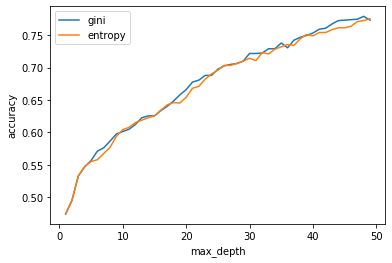

In [565]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,50):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(accuracy_score(y_test, pred))
 ####
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(accuracy_score(y_test, pred))
 ####
    max_depth.append(i)
    d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [566]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Decision Tree Classifier Validation Score",metrics.accuracy_score(y_test, predicted))

Decision Tree Classifier Validation Score 0.9023494860499266


In [567]:
predicted2= clf.predict(test_counts)

In [568]:
Tree_accuracy=accuracy_score(test_df1.Sentiment_category, predicted2)
print("Decision Tree Test Accuracy:",metrics.accuracy_score(test_df1.Sentiment_category, predicted2))

Decision Tree Test Accuracy: 0.9211409395973155


In [569]:
print(metrics.classification_report(test_df1.Sentiment_category, predicted2))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       277
           1       0.93      0.94      0.94       273
           2       0.79      0.65      0.71        46

    accuracy                           0.92       596
   macro avg       0.88      0.85      0.86       596
weighted avg       0.92      0.92      0.92       596



# Random Forest Classifier

In [570]:
from sklearn.ensemble import RandomForestClassifier

In [571]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   train_counts, train_df['Sentiment_category'], test_size=0.2, random_state=45)

In [572]:
clf = RandomForestClassifier().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Random Forest Validation Accuracy",metrics.accuracy_score(y_test, predicted))

Random Forest Validation Accuracy 0.8913362701908958


In [573]:
predicted2= clf.predict(test_counts)

In [574]:
RF_accuracy=accuracy_score(test_df1.Sentiment_category, predicted2)
print("Random Forest Test Accuracy:",metrics.accuracy_score(test_df1.Sentiment_category, predicted2))

Random Forest Test Accuracy: 0.8976510067114094


In [575]:
print(metrics.classification_report(test_df1.Sentiment_category, predicted2))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       277
           1       0.93      0.90      0.91       273
           2       0.87      0.57      0.68        46

    accuracy                           0.90       596
   macro avg       0.89      0.81      0.84       596
weighted avg       0.90      0.90      0.89       596



# Bagging Classifier

In [576]:
from sklearn.ensemble import BaggingClassifier

In [577]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   train_counts, train_df['Sentiment_category'], test_size=0.2, random_state=45)

In [578]:
clf = BaggingClassifier().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Bagging Classifier Validation Score",metrics.accuracy_score(y_test, predicted))

Bagging Classifier Validation Score 0.9030837004405287


In [579]:
predicted2= clf.predict(test_counts)

In [580]:
Bagging_accuracy=accuracy_score(test_df1.Sentiment_category, predicted2)
print("Bagging Classifier Test Score:",metrics.accuracy_score(test_df1.Sentiment_category, predicted2))

Bagging Classifier Test Score: 0.9161073825503355


In [581]:
print(metrics.classification_report(test_df1.Sentiment_category, predicted2))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       277
           1       0.94      0.93      0.93       273
           2       0.80      0.61      0.69        46

    accuracy                           0.92       596
   macro avg       0.88      0.83      0.85       596
weighted avg       0.91      0.92      0.91       596



In [582]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   train_tf, train_df['Sentiment_category'], test_size=0.2, random_state=45)

# Voting Classifier with Decision Tree Classifier

In [583]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [584]:
bagged_model=BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)

In [585]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   train_counts, train_df['Sentiment_category'], test_size=0.2, random_state=45)

In [586]:
bagged_model.fit(X_train, y_train)
predicted= bagged_model.predict(X_test)
print("Bagging with Decision Tree Validation Score",metrics.accuracy_score(y_test, predicted))

Bagging with Decision Tree Validation Score 0.5565345080763583


In [587]:
predicted2= bagged_model.predict(test_counts)

In [588]:
Bagged_tree_accuracy = accuracy_score(test_df1.Sentiment_category, predicted2)
print("Bagging with Decision Tree Test Accuracy:",metrics.accuracy_score(test_df1.Sentiment_category, predicted2))

Bagging with Decision Tree Test Accuracy: 0.5788590604026845


In [589]:
print(metrics.classification_report(test_df1.Sentiment_category, predicted2))

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.53      0.99      0.69       277
           1       0.93      0.26      0.40       273
           2       0.00      0.00      0.00        46

    accuracy                           0.58       596
   macro avg       0.49      0.42      0.36       596
weighted avg       0.67      0.58      0.50       596



# AdaBoost Classifier

In [590]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import r2_score, mean_squared_error

In [591]:
ada_model2 = AdaBoostClassifier(DecisionTreeClassifier())

In [592]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   train_counts, train_df['Sentiment_category'], test_size=0.2, random_state=45)

In [593]:
ada_model2.fit(X_train, y_train)
predicted= ada_model2.predict(X_test)
print("Ada Boost Classifier Validation Score",metrics.accuracy_score(y_test, predicted))

Ada Boost Classifier Validation Score 0.9126284875183553


In [594]:
predicted2= bagged_model.predict(test_counts)

In [595]:
AdaBoost_accuracy = accuracy_score(test_df1.Sentiment_category, predicted2)
print("Logistic Regression Test Accuracy:",metrics.accuracy_score(test_df1.Sentiment_category, predicted2))

Logistic Regression Test Accuracy: 0.5788590604026845


In [596]:
print(metrics.classification_report(test_df1.Sentiment_category, predicted2))

C:\Users\MANIKANTA\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.53      0.99      0.69       277
           1       0.93      0.26      0.40       273
           2       0.00      0.00      0.00        46

    accuracy                           0.58       596
   macro avg       0.49      0.42      0.36       596
weighted avg       0.67      0.58      0.50       596



# Performance of Classification Models

In [598]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes','Gradient Boosting','AdaBoost Classifier','Bagging classifier', 
               'Voting classifier using decision tree ',
              'Decision Tree', 'Neural_Networks'],
    'Score': [SVM_accuracy,LR_accuracy,RF_accuracy,NB_accuracy,GB_accuracy,AdaBoost_accuracy,Bagging_accuracy,Bagged_tree_accuracy,Tree_accuracy,NN_accuracy]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(11)

Model
Score                                           
0.921141                           Decision Tree
0.916107                      Bagging classifier
0.897651                           Random Forest
0.884228                 Support Vector Machines
0.857383                     Logistic Regression
0.786913                       Gradient Boosting
0.754038                             Naive Bayes
0.612416                         Neural_Networks
0.578859                     AdaBoost Classifier
0.578859  Voting classifier using decision tree